In [38]:
# dont use for sample of more than 30000
dist_matrix = np.array([[0.0]*sample]*sample)

In [39]:
for i in range(0, sample):
    for j in range(i+1, sample):
        dist_matrix[i, j] = dist_matrix[j, i] = abs(ll[0, i] - ll[0, j]) + abs(ll[1, i] - ll[1, j])

In [9]:
#creates a psuedo-heatmap by assigning each pt a value based the ratio of guilty / non-guilty pts in proximity.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster
import numpy as np
import seaborn as sns

#params
sample = 60000
eps = 0.0065

colors = np.array(['darkturquoise', 'coral', 'skyblue', 'gold', 'lightgreen', 'green', 'mediumaquamarine',  'pink', 'deepskyblue',  'lightsteelblue', 'blue', 'navy', 'rebeccapurple', 'mediumorchid', 'hotpink', 'red','crimson', 'dimgrey'])
data = pd.read_csv('t3.csv', index_col=0)
data.reset_index(drop=True, inplace=True)
datas = data[0:sample]
datas

,g_case_no,y_lat,x_lng,f_addr,gf_addr,c_case_type,c_violation,c_violation_date,j_finding,year,month,guilty,neighborhood
0,11000001,43.091474,-87.984090,"5700 W CAPITOL DR MILWAUKEE, WI","5700 W Capitol Dr, Milwaukee, WI 53216, USA",Municipal citation,"Ordinance 110-35-1, Retail Theft",2011-01-03 14:40:00.000000,Guilty,2011,1,1,Capitol Heights
1,11000002,43.068454,-87.918139,"2736 N 6TH ST MILWAUKEE, WI","2736 N 6th St, Milwaukee, WI 53212, USA",Municipal citation,"Ordinance 105-138-2, Resisting / Obstructing P...",2011-01-03 16:00:00.000000,Guilty,2011,1,1,Harambee
2,11000009,43.122443,-88.014475,"8223 W THURSTON AVE MILWAUKEE, WI","8223 W Thurston Ave, Milwaukee, WI 53218, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-05-07 00:00:00.000000,Guilty,2010,5,1,Silver Spring
3,11000014,43.056875,-87.941243,"2020 N 23 ST MILWAUKEE, WI","2020 N 23rd St, Milwaukee, WI 53205, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-06-08 00:00:00.000000,Guilty,2010,6,1,Midtown
4,11000024,43.054717,-87.936219,"1840 N 19 ST MILWAUKEE, WI","1840 N 19th St, Milwaukee, WI 53205, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-03-30 00:00:00.000000,Guilty,2010,3,1,Lindsay Heights
5,11000067,43.042648,-87.921272,"749 W STATE ST MILWAUKEE, WI","749 W State St, Milwaukee, WI 53233, USA",Municipal citation,"Ordinance 106-38-2, Possession of Marijuana",2010-11-27 21:50:00.000000,Guilty,2010,11,1,Westown
6,11000079,43.058142,-87.947781,"2113 N 27TH ST MILWAUKEE, WI","2113 N 27th St, Milwaukee, WI 53208, USA",Municipal citation,"Ordinance 50-25-5, Resist or Obstruct Issuance...",2010-11-29 01:15:00.000000,Guilty,2010,11,1,Midtown
7,11000084,43.010455,-87.960779,"3708 W BURNHAM ST MILWAUKEE, WI","3708 W Burnham St, Milwaukee, WI 53215, USA",Municipal citation,"Ordinance 95-14-2-a, Home Improvement Contract...",2010-10-18 12:00:00.000000,Guilty,2010,10,1,Burnham Park
8,11000086,43.038363,-87.914639,"275 W WISCONSIN AVE MILWAUKEE, WI","275 W Wisconsin Ave, Milwaukee, WI 53203, USA",Municipal citation,"Ordinance 110-32-1-a, Fraud on Hotel or Restau...",2010-11-27 23:45:00.000000,Guilty,2010,11,1,Westown
9,11000087,43.039199,-87.915426,"310 W WISCONSIN AVE MILWAUKEE, WI","500, 310 W Wisconsin Ave, Milwaukee, WI 53203,...",Municipal citation,"Ordinance 106-1-1, Disorderly Conduct",2010-12-01 09:19:00.000000,Guilty,2010,12,1,Westown


In [15]:
data['c_violation'].value_counts()

In [10]:
ll = np.array(datas[['x_lng', 'y_lat']].values.T.tolist())

In [11]:
idx = np.array([0.0]*sample)

In [12]:
for x in range (0, sample) :
    ng = 0
    tot = 0
    for y in range (0, sample) :
        if abs(ll[0, x] - ll[0, y]) + abs(ll[1, x] - ll[1, y]) < eps :
            tot = tot + 1
            ng = ng + 1 if datas.loc[y, 'guilty'] == 0 else ng
    idx[x] = ng/tot
    print(str(x)+' is done, idx is '+str(idx[x]))

0 is done, idx is 0.0397219463754
1 is done, idx is 0.0424836601307
2 is done, idx is 0.0305084745763
3 is done, idx is 0.0455927051672
4 is done, idx is 0.059925093633
5 is done, idx is 0.0303797468354
6 is done, idx is 0.033734939759
7 is done, idx is 0.151162790698
8 is done, idx is 0.0496062992126
9 is done, idx is 0.0523985239852
10 is done, idx is 0.0418679549114
11 is done, idx is 0.157427937916
12 is done, idx is 0.157427937916
13 is done, idx is 0.157427937916
14 is done, idx is 0.0322580645161
15 is done, idx is 0.0361111111111
16 is done, idx is 0.037484885127
17 is done, idx is 0.0352303523035
18 is done, idx is 0.125
19 is done, idx is 0.172529313233
20 is done, idx is 0.055822906641
21 is done, idx is 0.114285714286
22 is done, idx is 0.0540540540541
23 is done, idx is 0.0535987748851
24 is done, idx is 0.10394265233
25 is done, idx is 0.0625
26 is done, idx is 0.0393013100437
27 is done, idx is 0.0393013100437
28 is done, idx is 0.166666666667
29 is done, idx is 0.057513

237 is done, idx is 0.0454545454545
238 is done, idx is 0.043137254902
239 is done, idx is 0.0486656200942
240 is done, idx is 0.0759259259259
241 is done, idx is 0.0461538461538
242 is done, idx is 0.0457809694794
243 is done, idx is 0.0396825396825
244 is done, idx is 0.0520043336945
245 is done, idx is 0.112651646447
246 is done, idx is 0.0470409711684
247 is done, idx is 0.0534351145038
248 is done, idx is 0.0534351145038
249 is done, idx is 0.0534351145038
250 is done, idx is 0.0451306413302
251 is done, idx is 0.0931034482759
252 is done, idx is 0.0520043336945
253 is done, idx is 0.0694050991501
254 is done, idx is 0.0694050991501
255 is done, idx is 0.060475161987
256 is done, idx is 0.0363391655451
257 is done, idx is 0.0840840840841
258 is done, idx is 0.0840840840841
259 is done, idx is 0.0698602794411
260 is done, idx is 0.0325581395349
261 is done, idx is 0.0642398286938
262 is done, idx is 0.0539083557951
263 is done, idx is 0.0319488817891
264 is done, idx is 0.05
265 is

468 is done, idx is 0.0244821092279
469 is done, idx is 0.0244821092279
470 is done, idx is 0.0431309904153
471 is done, idx is 0.092050209205
472 is done, idx is 0.0461215932914
473 is done, idx is 0.0221105527638
474 is done, idx is 0.0221105527638
475 is done, idx is 0.0483412322275
476 is done, idx is 0.0396301188904
477 is done, idx is 0.0643274853801
478 is done, idx is 0.0342465753425
479 is done, idx is 0.0390625
480 is done, idx is 0.0342465753425
481 is done, idx is 0.0342465753425
482 is done, idx is 0.0342465753425
483 is done, idx is 0.0234604105572
484 is done, idx is 0.0232712765957
485 is done, idx is 0.0309477756286
486 is done, idx is 0.0335689045936
487 is done, idx is 0.0460584588131
488 is done, idx is 0.0350404312668
489 is done, idx is 0.0396475770925
490 is done, idx is 0.0396475770925
491 is done, idx is 0.0244680851064
492 is done, idx is 0.0244680851064
493 is done, idx is 0.030881017257
494 is done, idx is 0.0537459283388
495 is done, idx is 0.0537459283388


700 is done, idx is 0.0390455531453
701 is done, idx is 0.056338028169
702 is done, idx is 0.1015625
703 is done, idx is 0.0426229508197
704 is done, idx is 0.0426229508197
705 is done, idx is 0.0604914933837
706 is done, idx is 0.0396825396825
707 is done, idx is 0.0697674418605
708 is done, idx is 0.0404127257094
709 is done, idx is 0.0730337078652
710 is done, idx is 0.0348027842227
711 is done, idx is 0.0353982300885
712 is done, idx is 0.041095890411
713 is done, idx is 0.0262295081967
714 is done, idx is 0.0441306266549
715 is done, idx is 0.0689655172414
716 is done, idx is 0.0357598978289
717 is done, idx is 0.0357598978289
718 is done, idx is 0.0357142857143
719 is done, idx is 0.0697674418605
720 is done, idx is 0.0531914893617
721 is done, idx is 0.0390243902439
722 is done, idx is 0.0377358490566
723 is done, idx is 0.025
724 is done, idx is 0.0587392550143
725 is done, idx is 0.0555555555556
726 is done, idx is 0.0747967479675
727 is done, idx is 0.206896551724
728 is done

931 is done, idx is 0.0556117290192
932 is done, idx is 0.0556117290192
933 is done, idx is 0.0785340314136
934 is done, idx is 0.0140845070423
935 is done, idx is 0.0526315789474
936 is done, idx is 0.0662100456621
937 is done, idx is 0.0597680642284
938 is done, idx is 0.041782729805
939 is done, idx is 0.0526315789474
940 is done, idx is 0.0574018126888
941 is done, idx is 0.025641025641
942 is done, idx is 0.100694444444
943 is done, idx is 0.0613026819923
944 is done, idx is 0.0645161290323
945 is done, idx is 0.0422535211268
946 is done, idx is 0.0565371024735
947 is done, idx is 0.0398959236774
948 is done, idx is 0.0539568345324
949 is done, idx is 0.071953010279
950 is done, idx is 0.071953010279
951 is done, idx is 0.0495238095238
952 is done, idx is 0.0634920634921
953 is done, idx is 0.0466926070039
954 is done, idx is 0.0637898686679
955 is done, idx is 0.0569620253165
956 is done, idx is 0.0489795918367
957 is done, idx is 0.0318602261048
958 is done, idx is 0.05764075067

1158 is done, idx is 0.0305927342256
1159 is done, idx is 0.0305927342256
1160 is done, idx is 0.0381679389313
1161 is done, idx is 0.0525587828492
1162 is done, idx is 0.0718038528897
1163 is done, idx is 0.0810657596372
1164 is done, idx is 0.0188679245283
1165 is done, idx is 0.121110176619
1166 is done, idx is 0.132302405498
1167 is done, idx is 0.0454895913647
1168 is done, idx is 0.0649895178197
1169 is done, idx is 0.0649895178197
1170 is done, idx is 0.0387323943662
1171 is done, idx is 0.0344444444444
1172 is done, idx is 0.0387323943662
1173 is done, idx is 0.0540037243948
1174 is done, idx is 0.0851063829787
1175 is done, idx is 0.0468319559229
1176 is done, idx is 0.0995850622407
1177 is done, idx is 0.0995850622407
1178 is done, idx is 0.0355329949239
1179 is done, idx is 0.103846153846
1180 is done, idx is 0.0250347705146
1181 is done, idx is 0.0353089533417
1182 is done, idx is 0.027397260274
1183 is done, idx is 0.0353089533417
1184 is done, idx is 0.0673400673401
1185 

1386 is done, idx is 0.0563909774436
1387 is done, idx is 0.102756892231
1388 is done, idx is 0.0671140939597
1389 is done, idx is 0.033106134372
1390 is done, idx is 0.0311027332705
1391 is done, idx is 0.0248565965583
1392 is done, idx is 0.0671140939597
1393 is done, idx is 0.153846153846
1394 is done, idx is 0.0671140939597
1395 is done, idx is 0.0671140939597
1396 is done, idx is 0.0916030534351
1397 is done, idx is 0.0669014084507
1398 is done, idx is 0.0701754385965
1399 is done, idx is 0.0558659217877
1400 is done, idx is 0.0551053484603
1401 is done, idx is 0.0755813953488
1402 is done, idx is 0.0847058823529
1403 is done, idx is 0.0426666666667
1404 is done, idx is 0.0597680642284
1405 is done, idx is 0.0237154150198
1406 is done, idx is 0.1
1407 is done, idx is 0.142857142857
1408 is done, idx is 0.0454545454545
1409 is done, idx is 0.029296875
1410 is done, idx is 0.0556117290192
1411 is done, idx is 0.0525587828492
1412 is done, idx is 0.0952380952381
1413 is done, idx is 

1610 is done, idx is 0.0351053159478
1611 is done, idx is 0.0670498084291
1612 is done, idx is 0.0350877192982
1613 is done, idx is 0.099173553719
1614 is done, idx is 0.0820143884892
1615 is done, idx is 0.0558375634518
1616 is done, idx is 0.0576208178439
1617 is done, idx is 0.0520833333333
1618 is done, idx is 0.0738255033557
1619 is done, idx is 0.0426587301587
1620 is done, idx is 0.0364520048603
1621 is done, idx is 0.133079847909
1622 is done, idx is 0.0496062992126
1623 is done, idx is 0.0496062992126
1624 is done, idx is 0.128731343284
1625 is done, idx is 0.168
1626 is done, idx is 0.0251017639077
1627 is done, idx is 0.0595009596929
1628 is done, idx is 0.121951219512
1629 is done, idx is 0.0250223413762
1630 is done, idx is 0.0250223413762
1631 is done, idx is 0.0250223413762
1632 is done, idx is 0.0532994923858
1633 is done, idx is 0.0316804407713
1634 is done, idx is 0.041504539559
1635 is done, idx is 0.0445205479452
1636 is done, idx is 0.0359869138495
1637 is done, id

1834 is done, idx is 0.0412979351032
1835 is done, idx is 0.0267175572519
1836 is done, idx is 0.0451030927835
1837 is done, idx is 0.0339285714286
1838 is done, idx is 0.0395721925134
1839 is done, idx is 0.0560975609756
1840 is done, idx is 0.0560975609756
1841 is done, idx is 0.0488372093023
1842 is done, idx is 0.0534188034188
1843 is done, idx is 0.0738786279683
1844 is done, idx is 0.0603174603175
1845 is done, idx is 0.0298769771529
1846 is done, idx is 0.0583333333333
1847 is done, idx is 0.0676416819013
1848 is done, idx is 0.0810810810811
1849 is done, idx is 0.0381355932203
1850 is done, idx is 0.06
1851 is done, idx is 0.06
1852 is done, idx is 0.0489731437599
1853 is done, idx is 0.0430839002268
1854 is done, idx is 0.0705394190871
1855 is done, idx is 0.0434782608696
1856 is done, idx is 0.0434782608696
1857 is done, idx is 0.0311827956989
1858 is done, idx is 0.0858585858586
1859 is done, idx is 0.0344827586207
1860 is done, idx is 0.0344827586207
1861 is done, idx is 0.

2061 is done, idx is 0.105691056911
2062 is done, idx is 0.0813008130081
2063 is done, idx is 0.0496062992126
2064 is done, idx is 0.0474576271186
2065 is done, idx is 0.0994475138122
2066 is done, idx is 0.0587248322148
2067 is done, idx is 0.0268361581921
2068 is done, idx is 0.0360824742268
2069 is done, idx is 0.0319573901465
2070 is done, idx is 0.0198886237072
2071 is done, idx is 0.0457719162141
2072 is done, idx is 0.0539358600583
2073 is done, idx is 0.0576407506702
2074 is done, idx is 0.0188679245283
2075 is done, idx is 0.0755395683453
2076 is done, idx is 0.0382262996942
2077 is done, idx is 0.0511182108626
2078 is done, idx is 0.0368906455863
2079 is done, idx is 0.03125
2080 is done, idx is 0.0248565965583
2081 is done, idx is 0.0248565965583
2082 is done, idx is 0.0553410553411
2083 is done, idx is 0.0553410553411
2084 is done, idx is 0.0575296108291
2085 is done, idx is 0.0379146919431
2086 is done, idx is 0.0615384615385
2087 is done, idx is 0.0614203454894
2088 is do

2290 is done, idx is 0.0426229508197
2291 is done, idx is 0.0265486725664
2292 is done, idx is 0.0648148148148
2293 is done, idx is 0.0648148148148
2294 is done, idx is 0.0403120936281
2295 is done, idx is 0.0403120936281
2296 is done, idx is 0.0346260387812
2297 is done, idx is 0.0411392405063
2298 is done, idx is 0.0355871886121
2299 is done, idx is 0.0374639769452
2300 is done, idx is 0.0374639769452
2301 is done, idx is 0.0777988614801
2302 is done, idx is 0.064465408805
2303 is done, idx is 0.064465408805
2304 is done, idx is 0.0697674418605
2305 is done, idx is 0.0539273153576
2306 is done, idx is 0.0539273153576
2307 is done, idx is 0.0726643598616
2308 is done, idx is 0.0514096185738
2309 is done, idx is 0.0542635658915
2310 is done, idx is 0.0536082474227
2311 is done, idx is 0.0589390962672
2312 is done, idx is 0.0490196078431
2313 is done, idx is 0.0542635658915
2314 is done, idx is 0.0430622009569
2315 is done, idx is 0.0430622009569
2316 is done, idx is 0.127659574468
2317

2518 is done, idx is 0.0563583815029
2519 is done, idx is 0.0534979423868
2520 is done, idx is 0.0916030534351
2521 is done, idx is 0.0666666666667
2522 is done, idx is 0.037037037037
2523 is done, idx is 0.0671140939597
2524 is done, idx is 0.0657276995305
2525 is done, idx is 0.100823045267
2526 is done, idx is 0.0396825396825
2527 is done, idx is 0.0628571428571
2528 is done, idx is 0.028971028971
2529 is done, idx is 0.0590909090909
2530 is done, idx is 0.0412844036697
2531 is done, idx is 0.0941883767535
2532 is done, idx is 0.0572916666667
2533 is done, idx is 0.0466516177577
2534 is done, idx is 0.0475
2535 is done, idx is 0.104918032787
2536 is done, idx is 0.0526315789474
2537 is done, idx is 0.120879120879
2538 is done, idx is 0.0747028862479
2539 is done, idx is 0.104938271605
2540 is done, idx is 0.117647058824
2541 is done, idx is 0.0420609884332
2542 is done, idx is 0.0566037735849
2543 is done, idx is 0.0286738351254
2544 is done, idx is 0.0621761658031
2545 is done, idx

2745 is done, idx is 0.0536912751678
2746 is done, idx is 0.0615384615385
2747 is done, idx is 0.0688775510204
2748 is done, idx is 0.0594594594595
2749 is done, idx is 0.0594594594595
2750 is done, idx is 0.0473933649289
2751 is done, idx is 0.0473933649289
2752 is done, idx is 0.0833333333333
2753 is done, idx is 0.041166380789
2754 is done, idx is 0.041166380789
2755 is done, idx is 0.041166380789
2756 is done, idx is 0.0496062992126
2757 is done, idx is 0.0496062992126
2758 is done, idx is 0.0342465753425
2759 is done, idx is 0.048275862069
2760 is done, idx is 0.0462555066079
2761 is done, idx is 0.0462555066079
2762 is done, idx is 0.0566037735849
2763 is done, idx is 0.0890868596882
2764 is done, idx is 0.0774962742176
2765 is done, idx is 0.0373001776199
2766 is done, idx is 0.0351053159478
2767 is done, idx is 0.0537897310513
2768 is done, idx is 0.0433436532508
2769 is done, idx is 0.0645161290323
2770 is done, idx is 0.0642458100559
2771 is done, idx is 0.099173553719
2772 i

2971 is done, idx is 0.0336391437309
2972 is done, idx is 0.333333333333
2973 is done, idx is 0.038961038961
2974 is done, idx is 0.038961038961
2975 is done, idx is 0.0399061032864
2976 is done, idx is 0.0407925407925
2977 is done, idx is 0.169811320755
2978 is done, idx is 0.0496453900709
2979 is done, idx is 0.0890052356021
2980 is done, idx is 0.0518134715026
2981 is done, idx is 0.0451388888889
2982 is done, idx is 0.0451388888889
2983 is done, idx is 0.0522522522523
2984 is done, idx is 0.0822580645161
2985 is done, idx is 0.0481099656357
2986 is done, idx is 0.0347826086957
2987 is done, idx is 0.0547008547009
2988 is done, idx is 0.0681818181818
2989 is done, idx is 0.0794701986755
2990 is done, idx is 0.0352622061483
2991 is done, idx is 0.0588235294118
2992 is done, idx is 0.1
2993 is done, idx is 0.0441176470588
2994 is done, idx is 0.0351053159478
2995 is done, idx is 0.102409638554
2996 is done, idx is 0.08
2997 is done, idx is 0.102409638554
2998 is done, idx is 0.0481099

3197 is done, idx is 0.0506186726659
3198 is done, idx is 0.060650887574
3199 is done, idx is 0.0373737373737
3200 is done, idx is 0.0576407506702
3201 is done, idx is 0.057210965435
3202 is done, idx is 0.045524691358
3203 is done, idx is 0.108527131783
3204 is done, idx is 0.0491923641703
3205 is done, idx is 0.043956043956
3206 is done, idx is 0.0276625172891
3207 is done, idx is 0.0539374325782
3208 is done, idx is 0.0749128919861
3209 is done, idx is 0.0457831325301
3210 is done, idx is 0.0371428571429
3211 is done, idx is 0.0457831325301
3212 is done, idx is 0.057210965435
3213 is done, idx is 0.057210965435
3214 is done, idx is 0.0612745098039
3215 is done, idx is 0.0556117290192
3216 is done, idx is 0.0553679945982
3217 is done, idx is 0.12962962963
3218 is done, idx is 0.15625
3219 is done, idx is 0.0544217687075
3220 is done, idx is 0.0535947712418
3221 is done, idx is 0.142857142857
3222 is done, idx is 0.0544217687075
3223 is done, idx is 0.0525587828492
3224 is done, idx i

3423 is done, idx is 0.100694444444
3424 is done, idx is 0.0401119402985
3425 is done, idx is 0.0817307692308
3426 is done, idx is 0.0352480417755
3427 is done, idx is 0.0352480417755
3428 is done, idx is 0.0393258426966
3429 is done, idx is 0.0433275563258
3430 is done, idx is 0.0433275563258
3431 is done, idx is 0.0553633217993
3432 is done, idx is 0.0391459074733
3433 is done, idx is 0.0770676691729
3434 is done, idx is 0.0770676691729
3435 is done, idx is 0.0804597701149
3436 is done, idx is 0.0429936305732
3437 is done, idx is 0.0778301886792
3438 is done, idx is 0.0778301886792
3439 is done, idx is 0.0778301886792
3440 is done, idx is 0.0778301886792
3441 is done, idx is 0.0315699658703
3442 is done, idx is 0.0315699658703
3443 is done, idx is 0.104918032787
3444 is done, idx is 0.0773694390716
3445 is done, idx is 0.0773694390716
3446 is done, idx is 0.0625
3447 is done, idx is 0.0625
3448 is done, idx is 0.0343915343915
3449 is done, idx is 0.0332480818414
3450 is done, idx is 

3649 is done, idx is 0.0709677419355
3650 is done, idx is 0.0714285714286
3651 is done, idx is 0.0428015564202
3652 is done, idx is 0.0344827586207
3653 is done, idx is 0.0697674418605
3654 is done, idx is 0.0693641618497
3655 is done, idx is 0.036496350365
3656 is done, idx is 0.0452961672474
3657 is done, idx is 0.0357142857143
3658 is done, idx is 0.0443349753695
3659 is done, idx is 0.0443349753695
3660 is done, idx is 0.100694444444
3661 is done, idx is 0.0615384615385
3662 is done, idx is 0.0679012345679
3663 is done, idx is 0.0555555555556
3664 is done, idx is 0.0562913907285
3665 is done, idx is 0.0416666666667
3666 is done, idx is 0.0555555555556
3667 is done, idx is 0.0409356725146
3668 is done, idx is 0.0409356725146
3669 is done, idx is 0.0561497326203
3670 is done, idx is 0.0561497326203
3671 is done, idx is 0.0357142857143
3672 is done, idx is 0.153846153846
3673 is done, idx is 0.0424107142857
3674 is done, idx is 0.0534069981584
3675 is done, idx is 0.0518806744488
3676

3873 is done, idx is 0.0365535248042
3874 is done, idx is 0.0244821092279
3875 is done, idx is 0.0639431616341
3876 is done, idx is 0.0509803921569
3877 is done, idx is 0.0432525951557
3878 is done, idx is 0.0608465608466
3879 is done, idx is 0.0584615384615
3880 is done, idx is 0.0337078651685
3881 is done, idx is 0.0643274853801
3882 is done, idx is 0.0311284046693
3883 is done, idx is 0.180505415162
3884 is done, idx is 0.180505415162
3885 is done, idx is 0.0504807692308
3886 is done, idx is 0.145454545455
3887 is done, idx is 0.0553935860058
3888 is done, idx is 0.0553935860058
3889 is done, idx is 0.0365984930032
3890 is done, idx is 0.0288372093023
3891 is done, idx is 0.0299806576402
3892 is done, idx is 0.0214626391097
3893 is done, idx is 0.0353089533417
3894 is done, idx is 0.0874316939891
3895 is done, idx is 0.0808080808081
3896 is done, idx is 0.0823170731707
3897 is done, idx is 0.0627062706271
3898 is done, idx is 0.0627062706271
3899 is done, idx is 0.0614203454894
3900

4101 is done, idx is 0.0303797468354
4102 is done, idx is 0.129294755877
4103 is done, idx is 0.0375939849624
4104 is done, idx is 0.0220458553792
4105 is done, idx is 0.0165876777251
4106 is done, idx is 0.0555555555556
4107 is done, idx is 0.0406732117812
4108 is done, idx is 0.0246338215712
4109 is done, idx is 0.0341151385928
4110 is done, idx is 0.0233711048159
4111 is done, idx is 0.0291120815138
4112 is done, idx is 0.0432098765432
4113 is done, idx is 0.0244821092279
4114 is done, idx is 0.0387931034483
4115 is done, idx is 0.0378310214376
4116 is done, idx is 0.021190716448
4117 is done, idx is 0.0506756756757
4118 is done, idx is 0.0210608424337
4119 is done, idx is 0.0406852248394
4120 is done, idx is 0.0307692307692
4121 is done, idx is 0.0462962962963
4122 is done, idx is 0.0299572039943
4123 is done, idx is 0.0534069981584
4124 is done, idx is 0.0402010050251
4125 is done, idx is 0.0357941834452
4126 is done, idx is 0.0237529691211
4127 is done, idx is 0.0564102564103
412

4325 is done, idx is 0.0298769771529
4326 is done, idx is 0.0409556313993
4327 is done, idx is 0.0536480686695
4328 is done, idx is 0.0376569037657
4329 is done, idx is 0.0463215258856
4330 is done, idx is 0.0581113801453
4331 is done, idx is 0.0623655913978
4332 is done, idx is 0.0298769771529
4333 is done, idx is 0.167630057803
4334 is done, idx is 0.0556117290192
4335 is done, idx is 0.0847457627119
4336 is done, idx is 0.105973025048
4337 is done, idx is 0.105973025048
4338 is done, idx is 0.021602160216
4339 is done, idx is 0.135922330097
4340 is done, idx is 0.0319573901465
4341 is done, idx is 0.0319573901465
4342 is done, idx is 0.0655737704918
4343 is done, idx is 0.0816115702479
4344 is done, idx is 0.105788423154
4345 is done, idx is 0.105788423154
4346 is done, idx is 0.105788423154
4347 is done, idx is 0.0747663551402
4348 is done, idx is 0.0550660792952
4349 is done, idx is 0.108649035025
4350 is done, idx is 0.0394345238095
4351 is done, idx is 0.147147147147
4352 is don

4550 is done, idx is 0.0336538461538
4551 is done, idx is 0.0710382513661
4552 is done, idx is 0.0544217687075
4553 is done, idx is 0.0556117290192
4554 is done, idx is 0.157894736842
4555 is done, idx is 0.0574162679426
4556 is done, idx is 0.0712328767123
4557 is done, idx is 0.205882352941
4558 is done, idx is 0.0558659217877
4559 is done, idx is 0.0892857142857
4560 is done, idx is 0.12987012987
4561 is done, idx is 0.0565217391304
4562 is done, idx is 0.128571428571
4563 is done, idx is 0.0544217687075
4564 is done, idx is 0.0916030534351
4565 is done, idx is 0.0570613409415
4566 is done, idx is 0.0337209302326
4567 is done, idx is 0.0686274509804
4568 is done, idx is 0.0592592592593
4569 is done, idx is 0.0255220417633
4570 is done, idx is 0.0454545454545
4571 is done, idx is 0.0336021505376
4572 is done, idx is 0.0274261603376
4573 is done, idx is 0.0198300283286
4574 is done, idx is 0.0591397849462
4575 is done, idx is 0.0515873015873
4576 is done, idx is 0.0601265822785
4577 i

4775 is done, idx is 0.0361445783133
4776 is done, idx is 0.0645756457565
4777 is done, idx is 0.0553679945982
4778 is done, idx is 0.0712328767123
4779 is done, idx is 0.115942028986
4780 is done, idx is 0.0666666666667
4781 is done, idx is 0.0556117290192
4782 is done, idx is 0.0556117290192
4783 is done, idx is 0.0712328767123
4784 is done, idx is 0.0556117290192
4785 is done, idx is 0.0556117290192
4786 is done, idx is 0.0712328767123
4787 is done, idx is 0.0563583815029
4788 is done, idx is 0.206896551724
4789 is done, idx is 0.0530973451327
4790 is done, idx is 0.3
4791 is done, idx is 0.0616883116883
4792 is done, idx is 0.0845070422535
4793 is done, idx is 0.0556117290192
4794 is done, idx is 0.0399628252788
4795 is done, idx is 0.0731707317073
4796 is done, idx is 0.0405286343612
4797 is done, idx is 0.0478468899522
4798 is done, idx is 0.0806794055202
4799 is done, idx is 0.0530973451327
4800 is done, idx is 0.030518819939
4801 is done, idx is 0.0538674033149
4802 is done, id

5000 is done, idx is 0.049504950495
5001 is done, idx is 0.049504950495
5002 is done, idx is 0.0727272727273
5003 is done, idx is 0.0727272727273
5004 is done, idx is 0.0687679083095
5005 is done, idx is 0.0323475046211
5006 is done, idx is 0.0323475046211
5007 is done, idx is 0.0552147239264
5008 is done, idx is 0.0576131687243
5009 is done, idx is 0.0371621621622
5010 is done, idx is 0.0576131687243
5011 is done, idx is 0.0993788819876
5012 is done, idx is 0.0401284109149
5013 is done, idx is 0.0362976406534
5014 is done, idx is 0.0993788819876
5015 is done, idx is 0.0362976406534
5016 is done, idx is 0.0362976406534
5017 is done, idx is 0.0362976406534
5018 is done, idx is 0.0383858267717
5019 is done, idx is 0.0275229357798
5020 is done, idx is 0.0275229357798
5021 is done, idx is 0.0936329588015
5022 is done, idx is 0.151515151515
5023 is done, idx is 0.0213178294574
5024 is done, idx is 0.0421607378129
5025 is done, idx is 0.0747126436782
5026 is done, idx is 0.0294117647059
5027

5225 is done, idx is 0.0319573901465
5226 is done, idx is 0.0394160583942
5227 is done, idx is 0.0457719162141
5228 is done, idx is 0.123574144487
5229 is done, idx is 0.0294494238156
5230 is done, idx is 0.0294494238156
5231 is done, idx is 0.0162601626016
5232 is done, idx is 0.0162601626016
5233 is done, idx is 0.110864745011
5234 is done, idx is 0.0367577756833
5235 is done, idx is 0.120471777591
5236 is done, idx is 0.120471777591
5237 is done, idx is 0.120471777591
5238 is done, idx is 0.0763888888889
5239 is done, idx is 0.156603773585
5240 is done, idx is 0.0301263362488
5241 is done, idx is 0.0721649484536
5242 is done, idx is 0.0227272727273
5243 is done, idx is 0.0350877192982
5244 is done, idx is 0.1
5245 is done, idx is 0.104536489152
5246 is done, idx is 0.0302734375
5247 is done, idx is 0.0302734375
5248 is done, idx is 0.0422680412371
5249 is done, idx is 0.0247160988644
5250 is done, idx is 0.0441640378549
5251 is done, idx is 0.0342935528121
5252 is done, idx is 0.034

5453 is done, idx is 0.0526315789474
5454 is done, idx is 0.0526315789474
5455 is done, idx is 0.0435203094778
5456 is done, idx is 0.0435203094778
5457 is done, idx is 0.0606060606061
5458 is done, idx is 0.0370879120879
5459 is done, idx is 0.0916030534351
5460 is done, idx is 0.0
5461 is done, idx is 0.064308681672
5462 is done, idx is 0.0813953488372
5463 is done, idx is 0.064308681672
5464 is done, idx is 0.0659898477157
5465 is done, idx is 0.0712328767123
5466 is done, idx is 0.111111111111
5467 is done, idx is 0.1
5468 is done, idx is 0.0556117290192
5469 is done, idx is 0.0553679945982
5470 is done, idx is 0.0544217687075
5471 is done, idx is 0.116666666667
5472 is done, idx is 0.0813953488372
5473 is done, idx is 0.0428571428571
5474 is done, idx is 0.0525587828492
5475 is done, idx is 0.0434782608696
5476 is done, idx is 0.0396825396825
5477 is done, idx is 0.0978260869565
5478 is done, idx is 0.0386904761905
5479 is done, idx is 0.0629370629371
5480 is done, idx is 0.068897

5680 is done, idx is 0.0358126721763
5681 is done, idx is 0.0909090909091
5682 is done, idx is 0.1
5683 is done, idx is 0.0544217687075
5684 is done, idx is 0.0748560460653
5685 is done, idx is 0.0299906279288
5686 is done, idx is 0.0916030534351
5687 is done, idx is 0.0457142857143
5688 is done, idx is 0.0372928176796
5689 is done, idx is 0.0460772104608
5690 is done, idx is 0.0311027332705
5691 is done, idx is 0.0534069981584
5692 is done, idx is 0.0919540229885
5693 is done, idx is 0.0909090909091
5694 is done, idx is 0.0345911949686
5695 is done, idx is 0.0415335463259
5696 is done, idx is 0.113879003559
5697 is done, idx is 0.0461933276305
5698 is done, idx is 0.0285714285714
5699 is done, idx is 0.0494437577256
5700 is done, idx is 0.104918032787
5701 is done, idx is 0.0727272727273
5702 is done, idx is 0.0381355932203
5703 is done, idx is 0.0381355932203
5704 is done, idx is 0.0381355932203
5705 is done, idx is 0.0381355932203
5706 is done, idx is 0.04
5707 is done, idx is 0.041

5907 is done, idx is 0.0641025641026
5908 is done, idx is 0.0649350649351
5909 is done, idx is 0.0213903743316
5910 is done, idx is 0.0645161290323
5911 is done, idx is 0.03300330033
5912 is done, idx is 0.0976430976431
5913 is done, idx is 0.0833333333333
5914 is done, idx is 0.09
5915 is done, idx is 0.09
5916 is done, idx is 0.0441696113074
5917 is done, idx is 0.0370879120879
5918 is done, idx is 0.0603621730382
5919 is done, idx is 0.128571428571
5920 is done, idx is 0.0697674418605
5921 is done, idx is 0.0380952380952
5922 is done, idx is 0.0697674418605
5923 is done, idx is 0.0596590909091
5924 is done, idx is 0.0625
5925 is done, idx is 0.0697674418605
5926 is done, idx is 0.0420054200542
5927 is done, idx is 0.0875
5928 is done, idx is 0.0603621730382
5929 is done, idx is 0.0549019607843
5930 is done, idx is 0.0504731861199
5931 is done, idx is 0.0448222565688
5932 is done, idx is 0.0467532467532
5933 is done, idx is 0.0204528853178
5934 is done, idx is 0.0614250614251
5935 is

6134 is done, idx is 0.0434285714286
6135 is done, idx is 0.0434285714286
6136 is done, idx is 0.0390879478827
6137 is done, idx is 0.0616113744076
6138 is done, idx is 0.0643274853801
6139 is done, idx is 0.0338164251208
6140 is done, idx is 0.0357798165138
6141 is done, idx is 0.0357798165138
6142 is done, idx is 0.0331950207469
6143 is done, idx is 0.0331950207469
6144 is done, idx is 0.0416666666667
6145 is done, idx is 0.035838150289
6146 is done, idx is 0.0349946977731
6147 is done, idx is 0.0349946977731
6148 is done, idx is 0.0266211604096
6149 is done, idx is 0.032667876588
6150 is done, idx is 0.0214285714286
6151 is done, idx is 0.0214285714286
6152 is done, idx is 0.146666666667
6153 is done, idx is 0.0506566604128
6154 is done, idx is 0.0506566604128
6155 is done, idx is 0.0506566604128
6156 is done, idx is 0.0315789473684
6157 is done, idx is 0.0558659217877
6158 is done, idx is 0.0904522613065
6159 is done, idx is 0.0904522613065
6160 is done, idx is 0.0567765567766
6161

6361 is done, idx is 0.0425531914894
6362 is done, idx is 0.0298769771529
6363 is done, idx is 0.054435483871
6364 is done, idx is 0.0608108108108
6365 is done, idx is 0.0476772616137
6366 is done, idx is 0.0331950207469
6367 is done, idx is 0.0298769771529
6368 is done, idx is 0.0633608815427
6369 is done, idx is 0.0248648648649
6370 is done, idx is 0.0248648648649
6371 is done, idx is 0.0303605313093
6372 is done, idx is 0.105691056911
6373 is done, idx is 0.10199556541
6374 is done, idx is 0.0606267029973
6375 is done, idx is 0.0709459459459
6376 is done, idx is 0.0296570898981
6377 is done, idx is 0.0350438047559
6378 is done, idx is 0.129151291513
6379 is done, idx is 0.0977701543739
6380 is done, idx is 0.020202020202
6381 is done, idx is 0.045
6382 is done, idx is 0.0596026490066
6383 is done, idx is 0.0528846153846
6384 is done, idx is 0.0358422939068
6385 is done, idx is 0.0358422939068
6386 is done, idx is 0.0215827338129
6387 is done, idx is 0.0610079575597
6388 is done, idx

6588 is done, idx is 0.0555555555556
6589 is done, idx is 0.0716510903427
6590 is done, idx is 0.0298769771529
6591 is done, idx is 0.0301369863014
6592 is done, idx is 0.045871559633
6593 is done, idx is 0.0525114155251
6594 is done, idx is 0.0518638573744
6595 is done, idx is 0.0298769771529
6596 is done, idx is 0.0590551181102
6597 is done, idx is 0.0298769771529
6598 is done, idx is 0.0298769771529
6599 is done, idx is 0.0593220338983
6600 is done, idx is 0.0593220338983
6601 is done, idx is 0.0471698113208
6602 is done, idx is 0.0520325203252
6603 is done, idx is 0.0520325203252
6604 is done, idx is 0.061320754717
6605 is done, idx is 0.0525210084034
6606 is done, idx is 0.061320754717
6607 is done, idx is 0.036717062635
6608 is done, idx is 0.0298769771529
6609 is done, idx is 0.02849002849
6610 is done, idx is 0.0306306306306
6611 is done, idx is 0.035409035409
6612 is done, idx is 0.0443686006826
6613 is done, idx is 0.0518638573744
6614 is done, idx is 0.0279783393502
6615 is 

6815 is done, idx is 0.036036036036
6816 is done, idx is 0.0332326283988
6817 is done, idx is 0.0471464019851
6818 is done, idx is 0.0359612724758
6819 is done, idx is 0.0552677029361
6820 is done, idx is 0.0583190394511
6821 is done, idx is 0.0391304347826
6822 is done, idx is 0.0391304347826
6823 is done, idx is 0.15625
6824 is done, idx is 0.0534979423868
6825 is done, idx is 0.0882352941176
6826 is done, idx is 0.0544217687075
6827 is done, idx is 0.0682593856655
6828 is done, idx is 0.0691489361702
6829 is done, idx is 0.180505415162
6830 is done, idx is 0.140625
6831 is done, idx is 0.140625
6832 is done, idx is 0.0560165975104
6833 is done, idx is 0.0674157303371
6834 is done, idx is 0.0571428571429
6835 is done, idx is 0.03
6836 is done, idx is 0.0405982905983
6837 is done, idx is 0.0914760914761
6838 is done, idx is 0.082304526749
6839 is done, idx is 0.0532915360502
6840 is done, idx is 0.0397219463754
6841 is done, idx is 0.0456692913386
6842 is done, idx is 0.0914760914761


7043 is done, idx is 0.132007233273
7044 is done, idx is 0.111111111111
7045 is done, idx is 0.0389429763561
7046 is done, idx is 0.0787401574803
7047 is done, idx is 0.0512820512821
7048 is done, idx is 0.0386398763524
7049 is done, idx is 0.03125
7050 is done, idx is 0.0334448160535
7051 is done, idx is 0.0373831775701
7052 is done, idx is 0.062630480167
7053 is done, idx is 0.0433436532508
7054 is done, idx is 0.0588235294118
7055 is done, idx is 0.0632183908046
7056 is done, idx is 0.0507152145644
7057 is done, idx is 0.0434782608696
7058 is done, idx is 0.105691056911
7059 is done, idx is 0.0569306930693
7060 is done, idx is 0.0569306930693
7061 is done, idx is 0.0507692307692
7062 is done, idx is 0.159851301115
7063 is done, idx is 0.0358102059087
7064 is done, idx is 0.0372492836676
7065 is done, idx is 0.0944
7066 is done, idx is 0.0917431192661
7067 is done, idx is 0.0625
7068 is done, idx is 0.0480349344978
7069 is done, idx is 0.0841059602649
7070 is done, idx is 0.045454545

7269 is done, idx is 0.0311027332705
7270 is done, idx is 0.0347957639939
7271 is done, idx is 0.0645756457565
7272 is done, idx is 0.0369913686806
7273 is done, idx is 0.10101010101
7274 is done, idx is 0.0608695652174
7275 is done, idx is 0.0486111111111
7276 is done, idx is 0.0206463195691
7277 is done, idx is 0.0214115781126
7278 is done, idx is 0.0578034682081
7279 is done, idx is 0.0339976553341
7280 is done, idx is 0.0339976553341
7281 is done, idx is 0.0291164658635
7282 is done, idx is 0.0585774058577
7283 is done, idx is 0.0744680851064
7284 is done, idx is 0.0289855072464
7285 is done, idx is 0.0869565217391
7286 is done, idx is 0.0944881889764
7287 is done, idx is 0.0944881889764
7288 is done, idx is 0.0585774058577
7289 is done, idx is 0.0423183072677
7290 is done, idx is 0.0487804878049
7291 is done, idx is 0.0206463195691
7292 is done, idx is 0.0208062418726
7293 is done, idx is 0.0208062418726
7294 is done, idx is 0.0631578947368
7295 is done, idx is 0.0590405904059
729

7495 is done, idx is 0.0187353629977
7496 is done, idx is 0.0187353629977
7497 is done, idx is 0.063829787234
7498 is done, idx is 0.063829787234
7499 is done, idx is 0.0335689045936
7500 is done, idx is 0.047817047817
7501 is done, idx is 0.0996441281139
7502 is done, idx is 0.0822368421053
7503 is done, idx is 0.214285714286
7504 is done, idx is 0.0776892430279
7505 is done, idx is 0.0571428571429
7506 is done, idx is 0.0894941634241
7507 is done, idx is 0.0996441281139
7508 is done, idx is 0.0376344086022
7509 is done, idx is 0.048
7510 is done, idx is 0.0810810810811
7511 is done, idx is 0.0585585585586
7512 is done, idx is 0.0298769771529
7513 is done, idx is 0.0298769771529
7514 is done, idx is 0.0298769771529
7515 is done, idx is 0.0635593220339
7516 is done, idx is 0.0622222222222
7517 is done, idx is 0.0635593220339
7518 is done, idx is 0.0635593220339
7519 is done, idx is 0.0298769771529
7520 is done, idx is 0.0459940652819
7521 is done, idx is 0.08
7522 is done, idx is 0.029

7722 is done, idx is 0.0671378091873
7723 is done, idx is 0.049043062201
7724 is done, idx is 0.0264367816092
7725 is done, idx is 0.0650887573964
7726 is done, idx is 0.0305676855895
7727 is done, idx is 0.0928571428571
7728 is done, idx is 0.0748792270531
7729 is done, idx is 0.0815850815851
7730 is done, idx is 0.0807291666667
7731 is done, idx is 0.0387931034483
7732 is done, idx is 0.0807291666667
7733 is done, idx is 0.058
7734 is done, idx is 0.037037037037
7735 is done, idx is 0.0536398467433
7736 is done, idx is 0.0288461538462
7737 is done, idx is 0.097609561753
7738 is done, idx is 0.0529100529101
7739 is done, idx is 0.101796407186
7740 is done, idx is 0.0581196581197
7741 is done, idx is 0.131768953069
7742 is done, idx is 0.104294478528
7743 is done, idx is 0.0519083969466
7744 is done, idx is 0.0905172413793
7745 is done, idx is 0.0551948051948
7746 is done, idx is 0.0639853747715
7747 is done, idx is 0.113402061856
7748 is done, idx is 0.0574712643678
7749 is done, idx 

7949 is done, idx is 0.0506566604128
7950 is done, idx is 0.0303643724696
7951 is done, idx is 0.0697674418605
7952 is done, idx is 0.0697674418605
7953 is done, idx is 0.0405405405405
7954 is done, idx is 0.0622837370242
7955 is done, idx is 0.0622837370242
7956 is done, idx is 0.0622837370242
7957 is done, idx is 0.0381231671554
7958 is done, idx is 0.0491803278689
7959 is done, idx is 0.0662100456621
7960 is done, idx is 0.0803571428571
7961 is done, idx is 0.0418994413408
7962 is done, idx is 0.037037037037
7963 is done, idx is 0.0371900826446
7964 is done, idx is 0.0371900826446
7965 is done, idx is 0.0559284116331
7966 is done, idx is 0.0559284116331
7967 is done, idx is 0.0412371134021
7968 is done, idx is 0.0614203454894
7969 is done, idx is 0.0662100456621
7970 is done, idx is 0.0662100456621
7971 is done, idx is 0.0262295081967
7972 is done, idx is 0.0588235294118
7973 is done, idx is 0.0634146341463
7974 is done, idx is 0.0516129032258
7975 is done, idx is 0.0679611650485
79

8175 is done, idx is 0.101796407186
8176 is done, idx is 0.0481099656357
8177 is done, idx is 0.0481099656357
8178 is done, idx is 0.111111111111
8179 is done, idx is 0.0797413793103
8180 is done, idx is 0.0846560846561
8181 is done, idx is 0.0473815461347
8182 is done, idx is 0.0358422939068
8183 is done, idx is 0.0506329113924
8184 is done, idx is 0.0610687022901
8185 is done, idx is 0.0506329113924
8186 is done, idx is 0.0506329113924
8187 is done, idx is 0.0704225352113
8188 is done, idx is 0.0264496439471
8189 is done, idx is 0.180505415162
8190 is done, idx is 0.0298769771529
8191 is done, idx is 0.0581395348837
8192 is done, idx is 0.0282485875706
8193 is done, idx is 0.0662824207493
8194 is done, idx is 0.046511627907
8195 is done, idx is 0.0444162436548
8196 is done, idx is 0.035409035409
8197 is done, idx is 0.0452830188679
8198 is done, idx is 0.0452830188679
8199 is done, idx is 0.0364583333333
8200 is done, idx is 0.0506912442396
8201 is done, idx is 0.0298769771529
8202 i

8402 is done, idx is 0.0581818181818
8403 is done, idx is 0.0399239543726
8404 is done, idx is 0.0357798165138
8405 is done, idx is 0.0357798165138
8406 is done, idx is 0.0579964850615
8407 is done, idx is 0.0579964850615
8408 is done, idx is 0.0302593659942
8409 is done, idx is 0.033264033264
8410 is done, idx is 0.0477707006369
8411 is done, idx is 0.0311027332705
8412 is done, idx is 0.0332261521972
8413 is done, idx is 0.0401554404145
8414 is done, idx is 0.0408580183861
8415 is done, idx is 0.0311027332705
8416 is done, idx is 0.0367936925099
8417 is done, idx is 0.0454545454545
8418 is done, idx is 0.041095890411
8419 is done, idx is 0.0714285714286
8420 is done, idx is 0.0885245901639
8421 is done, idx is 0.0697674418605
8422 is done, idx is 0.0616438356164
8423 is done, idx is 0.0633946830266
8424 is done, idx is 0.0751879699248
8425 is done, idx is 0.0319573901465
8426 is done, idx is 0.0885245901639
8427 is done, idx is 0.0642201834862
8428 is done, idx is 0.0616438356164
842

8627 is done, idx is 0.0188679245283
8628 is done, idx is 0.1065830721
8629 is done, idx is 0.0491283676704
8630 is done, idx is 0.04662004662
8631 is done, idx is 0.0655737704918
8632 is done, idx is 0.0896358543417
8633 is done, idx is 0.0717647058824
8634 is done, idx is 0.0986252241482
8635 is done, idx is 0.0827478532397
8636 is done, idx is 0.047311827957
8637 is done, idx is 0.0793650793651
8638 is done, idx is 0.06
8639 is done, idx is 0.0420736288505
8640 is done, idx is 0.0530759951749
8641 is done, idx is 0.0793650793651
8642 is done, idx is 0.04
8643 is done, idx is 0.04
8644 is done, idx is 0.04
8645 is done, idx is 0.0602836879433
8646 is done, idx is 0.0344036697248
8647 is done, idx is 0.0491949910555
8648 is done, idx is 0.0491949910555
8649 is done, idx is 0.100686498856
8650 is done, idx is 0.053488372093
8651 is done, idx is 0.130081300813
8652 is done, idx is 0.060475161987
8653 is done, idx is 0.0396825396825
8654 is done, idx is 0.0396825396825
8655 is done, idx 

8853 is done, idx is 0.0365612648221
8854 is done, idx is 0.00869565217391
8855 is done, idx is 0.00869565217391
8856 is done, idx is 0.00869565217391
8857 is done, idx is 0.00869565217391
8858 is done, idx is 0.0691823899371
8859 is done, idx is 0.0396825396825
8860 is done, idx is 0.0544747081712
8861 is done, idx is 0.0401002506266
8862 is done, idx is 0.0546780072904
8863 is done, idx is 0.0262295081967
8864 is done, idx is 0.0554371002132
8865 is done, idx is 0.0554371002132
8866 is done, idx is 0.0452876376989
8867 is done, idx is 0.0526315789474
8868 is done, idx is 0.100364963504
8869 is done, idx is 0.0449050086356
8870 is done, idx is 0.0444444444444
8871 is done, idx is 0.0326086956522
8872 is done, idx is 0.0526315789474
8873 is done, idx is 0.2
8874 is done, idx is 0.0712328767123
8875 is done, idx is 0.121212121212
8876 is done, idx is 0.105263157895
8877 is done, idx is 0.0792682926829
8878 is done, idx is 0.0607985480944
8879 is done, idx is 0.119047619048
8880 is done,

9077 is done, idx is 0.0428015564202
9078 is done, idx is 0.0449438202247
9079 is done, idx is 0.100917431193
9080 is done, idx is 0.0453172205438
9081 is done, idx is 0.0428015564202
9082 is done, idx is 0.0587084148728
9083 is done, idx is 0.0615384615385
9084 is done, idx is 0.0680100755668
9085 is done, idx is 0.0680100755668
9086 is done, idx is 0.0891472868217
9087 is done, idx is 0.025198938992
9088 is done, idx is 0.0526315789474
9089 is done, idx is 0.0597014925373
9090 is done, idx is 0.0504201680672
9091 is done, idx is 0.0504201680672
9092 is done, idx is 0.06875
9093 is done, idx is 0.0518806744488
9094 is done, idx is 0.0518806744488
9095 is done, idx is 0.0527704485488
9096 is done, idx is 0.0415384615385
9097 is done, idx is 0.046908315565
9098 is done, idx is 0.121428571429
9099 is done, idx is 0.180505415162
9100 is done, idx is 0.0550621669627
9101 is done, idx is 0.0322580645161
9102 is done, idx is 0.0222984562607
9103 is done, idx is 0.0430107526882
9104 is done, 

9303 is done, idx is 0.0443864229765
9304 is done, idx is 0.0462555066079
9305 is done, idx is 0.0585585585586
9306 is done, idx is 0.0569877883311
9307 is done, idx is 0.033426183844
9308 is done, idx is 0.0362225097025
9309 is done, idx is 0.0322869955157
9310 is done, idx is 0.0299572039943
9311 is done, idx is 0.0299572039943
9312 is done, idx is 0.0569877883311
9313 is done, idx is 0.0602150537634
9314 is done, idx is 0.0602150537634
9315 is done, idx is 0.0602150537634
9316 is done, idx is 0.0602150537634
9317 is done, idx is 0.0602150537634
9318 is done, idx is 0.105263157895
9319 is done, idx is 0.0428015564202
9320 is done, idx is 0.0642201834862
9321 is done, idx is 0.0384615384615
9322 is done, idx is 0.078125
9323 is done, idx is 0.0579150579151
9324 is done, idx is 0.065
9325 is done, idx is 0.06875
9326 is done, idx is 0.0614203454894
9327 is done, idx is 0.0614203454894
9328 is done, idx is 0.0423728813559
9329 is done, idx is 0.0657894736842
9330 is done, idx is 0.065
9

9529 is done, idx is 0.03625
9530 is done, idx is 0.046468401487
9531 is done, idx is 0.0452538631347
9532 is done, idx is 0.0
9533 is done, idx is 0.0298769771529
9534 is done, idx is 0.0298769771529
9535 is done, idx is 0.0616279069767
9536 is done, idx is 0.174418604651
9537 is done, idx is 0.0805604203152
9538 is done, idx is 0.0805604203152
9539 is done, idx is 0.0477611940299
9540 is done, idx is 0.130111524164
9541 is done, idx is 0.0256217030897
9542 is done, idx is 0.0256217030897
9543 is done, idx is 0.0353089533417
9544 is done, idx is 0.031914893617
9545 is done, idx is 0.0360824742268
9546 is done, idx is 0.0337078651685
9547 is done, idx is 0.0369088811995
9548 is done, idx is 0.0369088811995
9549 is done, idx is 0.0325991189427
9550 is done, idx is 0.0459363957597
9551 is done, idx is 0.0459363957597
9552 is done, idx is 0.0532786885246
9553 is done, idx is 0.0534069981584
9554 is done, idx is 0.0678571428571
9555 is done, idx is 0.0273109243697
9556 is done, idx is 0.02

9757 is done, idx is 0.0556117290192
9758 is done, idx is 0.169491525424
9759 is done, idx is 0.102564102564
9760 is done, idx is 0.0612244897959
9761 is done, idx is 0.0878378378378
9762 is done, idx is 0.0382848392037
9763 is done, idx is 0.0298769771529
9764 is done, idx is 0.0602094240838
9765 is done, idx is 0.0666666666667
9766 is done, idx is 0.0574018126888
9767 is done, idx is 0.0309523809524
9768 is done, idx is 0.0879120879121
9769 is done, idx is 0.0533333333333
9770 is done, idx is 0.0511363636364
9771 is done, idx is 0.0814332247557
9772 is done, idx is 0.062962962963
9773 is done, idx is 0.0437375745527
9774 is done, idx is 0.0192307692308
9775 is done, idx is 0.0892255892256
9776 is done, idx is 0.0488372093023
9777 is done, idx is 0.0514285714286
9778 is done, idx is 0.0810810810811
9779 is done, idx is 0.0580046403712
9780 is done, idx is 0.0446428571429
9781 is done, idx is 0.0298769771529
9782 is done, idx is 0.0298769771529
9783 is done, idx is 0.0529801324503
9784

9984 is done, idx is 0.0851063829787
9985 is done, idx is 0.0196078431373
9986 is done, idx is 0.0745341614907
9987 is done, idx is 0.0393258426966
9988 is done, idx is 0.100694444444
9989 is done, idx is 0.0776699029126
9990 is done, idx is 0.0769230769231
9991 is done, idx is 0.0495495495495
9992 is done, idx is 0.0213903743316
9993 is done, idx is 0.0244821092279
9994 is done, idx is 0.0318021201413
9995 is done, idx is 0.030303030303
9996 is done, idx is 0.0227272727273
9997 is done, idx is 0.0227272727273
9998 is done, idx is 0.047619047619
9999 is done, idx is 0.0566037735849
10000 is done, idx is 0.0410509031199
10001 is done, idx is 0.0769230769231
10002 is done, idx is 0.0769230769231
10003 is done, idx is 0.0593220338983
10004 is done, idx is 0.145833333333
10005 is done, idx is 0.0544217687075
10006 is done, idx is 0.0916030534351
10007 is done, idx is 0.043795620438
10008 is done, idx is 0.0615384615385
10009 is done, idx is 0.0540540540541
10010 is done, idx is 0.054054054

10203 is done, idx is 0.0478011472275
10204 is done, idx is 0.0283018867925
10205 is done, idx is 0.0283018867925
10206 is done, idx is 0.0283018867925
10207 is done, idx is 0.0246575342466
10208 is done, idx is 0.0246575342466
10209 is done, idx is 0.0302171860246
10210 is done, idx is 0.0676855895197
10211 is done, idx is 0.0519480519481
10212 is done, idx is 0.0528169014085
10213 is done, idx is 0.0801687763713
10214 is done, idx is 0.0335570469799
10215 is done, idx is 0.0342465753425
10216 is done, idx is 0.0377358490566
10217 is done, idx is 0.045766590389
10218 is done, idx is 0.0227450980392
10219 is done, idx is 0.0467445742905
10220 is done, idx is 0.0467445742905
10221 is done, idx is 0.0467445742905
10222 is done, idx is 0.0467445742905
10223 is done, idx is 0.0467445742905
10224 is done, idx is 0.0467445742905
10225 is done, idx is 0.027972027972
10226 is done, idx is 0.027972027972
10227 is done, idx is 0.0544815465729
10228 is done, idx is 0.0573248407643
10229 is done, 

10424 is done, idx is 0.0506329113924
10425 is done, idx is 0.0665399239544
10426 is done, idx is 0.0298769771529
10427 is done, idx is 0.0298769771529
10428 is done, idx is 0.0298769771529
10429 is done, idx is 0.0600600600601
10430 is done, idx is 0.0287610619469
10431 is done, idx is 0.0475113122172
10432 is done, idx is 0.0437375745527
10433 is done, idx is 0.0506329113924
10434 is done, idx is 0.0723140495868
10435 is done, idx is 0.0397219463754
10436 is done, idx is 0.0754098360656
10437 is done, idx is 0.0600706713781
10438 is done, idx is 0.0430107526882
10439 is done, idx is 0.0557939914163
10440 is done, idx is 0.0600706713781
10441 is done, idx is 0.0805604203152
10442 is done, idx is 0.0675324675325
10443 is done, idx is 0.0382882882883
10444 is done, idx is 0.0272314674735
10445 is done, idx is 0.0425257731959
10446 is done, idx is 0.128971962617
10447 is done, idx is 0.0805604203152
10448 is done, idx is 0.130111524164
10449 is done, idx is 0.173441734417
10450 is done, 

10645 is done, idx is 0.0597680642284
10646 is done, idx is 0.0
10647 is done, idx is 0.0597680642284
10648 is done, idx is 0.0596026490066
10649 is done, idx is 0.053629823414
10650 is done, idx is 0.0534979423868
10651 is done, idx is 0.0671140939597
10652 is done, idx is 0.0625
10653 is done, idx is 0.0562851782364
10654 is done, idx is 0.0525587828492
10655 is done, idx is 0.0534979423868
10656 is done, idx is 0.0534979423868
10657 is done, idx is 0.0671140939597
10658 is done, idx is 0.0181818181818
10659 is done, idx is 0.0225733634312
10660 is done, idx is 0.0758807588076
10661 is done, idx is 0.0758807588076
10662 is done, idx is 0.0758807588076
10663 is done, idx is 0.0758807588076
10664 is done, idx is 0.0523560209424
10665 is done, idx is 0.0321715817694
10666 is done, idx is 0.0321715817694
10667 is done, idx is 0.0431654676259
10668 is done, idx is 0.0878378378378
10669 is done, idx is 0.04
10670 is done, idx is 0.0878378378378
10671 is done, idx is 0.0481099656357
10672 i

10863 is done, idx is 0.0342465753425
10864 is done, idx is 0.070887818307
10865 is done, idx is 0.070887818307
10866 is done, idx is 0.070887818307
10867 is done, idx is 0.0579399141631
10868 is done, idx is 0.122261484099
10869 is done, idx is 0.0655737704918
10870 is done, idx is 0.0355555555556
10871 is done, idx is 0.0697674418605
10872 is done, idx is 0.111111111111
10873 is done, idx is 0.0526315789474
10874 is done, idx is 0.0579710144928
10875 is done, idx is 0.0342465753425
10876 is done, idx is 0.0847953216374
10877 is done, idx is 0.04
10878 is done, idx is 0.0627062706271
10879 is done, idx is 0.0695187165775
10880 is done, idx is 0.0368144252442
10881 is done, idx is 0.0213740458015
10882 is done, idx is 0.0318021201413
10883 is done, idx is 0.0508166969147
10884 is done, idx is 0.0654761904762
10885 is done, idx is 0.06875
10886 is done, idx is 0.0757575757576
10887 is done, idx is 0.0428015564202
10888 is done, idx is 0.0382513661202
10889 is done, idx is 0.046875
10890

11082 is done, idx is 0.0324825986079
11083 is done, idx is 0.0324825986079
11084 is done, idx is 0.0324825986079
11085 is done, idx is 0.0467111534795
11086 is done, idx is 0.0534069981584
11087 is done, idx is 0.0509259259259
11088 is done, idx is 0.0454545454545
11089 is done, idx is 0.0510638297872
11090 is done, idx is 0.0421313506815
11091 is done, idx is 0.0421313506815
11092 is done, idx is 0.0421313506815
11093 is done, idx is 0.0884557721139
11094 is done, idx is 0.06875
11095 is done, idx is 0.0595238095238
11096 is done, idx is 0.0495495495495
11097 is done, idx is 0.0454545454545
11098 is done, idx is 0.0579150579151
11099 is done, idx is 0.0357142857143
11100 is done, idx is 0.0526315789474
11101 is done, idx is 0.0755813953488
11102 is done, idx is 0.062015503876
11103 is done, idx is 0.041095890411
11104 is done, idx is 0.0487804878049
11105 is done, idx is 0.06875
11106 is done, idx is 0.0506329113924
11107 is done, idx is 0.0736196319018
11108 is done, idx is 0.100371

11302 is done, idx is 0.0525328330206
11303 is done, idx is 0.0606060606061
11304 is done, idx is 0.0634057971014
11305 is done, idx is 0.0231213872832
11306 is done, idx is 0.125760649087
11307 is done, idx is 0.169161676647
11308 is done, idx is 0.169895678092
11309 is done, idx is 0.0764872521246
11310 is done, idx is 0.124440465533
11311 is done, idx is 0.0231213872832
11312 is done, idx is 0.0425257731959
11313 is done, idx is 0.0425257731959
11314 is done, idx is 0.0425257731959
11315 is done, idx is 0.0386427898209
11316 is done, idx is 0.045045045045
11317 is done, idx is 0.045045045045
11318 is done, idx is 0.045045045045
11319 is done, idx is 0.045045045045
11320 is done, idx is 0.121471343028
11321 is done, idx is 0.121471343028
11322 is done, idx is 0.0
11323 is done, idx is 0.0
11324 is done, idx is 0.0468417317246
11325 is done, idx is 0.0231213872832
11326 is done, idx is 0.131717597471
11327 is done, idx is 0.0655737704918
11328 is done, idx is 0.0655737704918
11329 is 

11522 is done, idx is 0.0952380952381
11523 is done, idx is 0.0698198198198
11524 is done, idx is 0.0952380952381
11525 is done, idx is 0.0502793296089
11526 is done, idx is 0.0833333333333
11527 is done, idx is 0.0574506283662
11528 is done, idx is 0.0460358056266
11529 is done, idx is 0.0357142857143
11530 is done, idx is 0.0561056105611
11531 is done, idx is 0.0561056105611
11532 is done, idx is 0.0603448275862
11533 is done, idx is 0.046204620462
11534 is done, idx is 0.0556745182013
11535 is done, idx is 0.0342857142857
11536 is done, idx is 0.03125
11537 is done, idx is 0.0702341137124
11538 is done, idx is 0.0561056105611
11539 is done, idx is 0.0561056105611
11540 is done, idx is 0.0987394957983
11541 is done, idx is 0.0670289855072
11542 is done, idx is 0.038202247191
11543 is done, idx is 0.0560165975104
11544 is done, idx is 0.0461285008237
11545 is done, idx is 0.0561056105611
11546 is done, idx is 0.0483870967742
11547 is done, idx is 0.0592334494774
11548 is done, idx is 

11741 is done, idx is 0.0494938132733
11742 is done, idx is 0.104918032787
11743 is done, idx is 0.0538461538462
11744 is done, idx is 0.0296296296296
11745 is done, idx is 0.0425531914894
11746 is done, idx is 0.0379403794038
11747 is done, idx is 0.0380228136882
11748 is done, idx is 0.0464135021097
11749 is done, idx is 0.040625
11750 is done, idx is 0.040625
11751 is done, idx is 0.048403707518
11752 is done, idx is 0.0576407506702
11753 is done, idx is 0.0576407506702
11754 is done, idx is 0.0532837670384
11755 is done, idx is 0.0464135021097
11756 is done, idx is 0.0433006535948
11757 is done, idx is 0.0430278884462
11758 is done, idx is 0.0416333066453
11759 is done, idx is 0.0487062404871
11760 is done, idx is 0.0536082474227
11761 is done, idx is 0.0603448275862
11762 is done, idx is 0.0618336886994
11763 is done, idx is 0.0519480519481
11764 is done, idx is 0.0398671096346
11765 is done, idx is 0.0343035343035
11766 is done, idx is 0.0652173913043
11767 is done, idx is 0.0686

11960 is done, idx is 0.0479452054795
11961 is done, idx is 0.0526315789474
11962 is done, idx is 0.0526315789474
11963 is done, idx is 0.0803324099723
11964 is done, idx is 0.111111111111
11965 is done, idx is 0.0428015564202
11966 is done, idx is 0.0583333333333
11967 is done, idx is 0.047619047619
11968 is done, idx is 0.047619047619
11969 is done, idx is 0.0434782608696
11970 is done, idx is 0.0639730639731
11971 is done, idx is 0.0217391304348
11972 is done, idx is 0.06875
11973 is done, idx is 0.0674157303371
11974 is done, idx is 0.0674157303371
11975 is done, idx is 0.0368098159509
11976 is done, idx is 0.0697674418605
11977 is done, idx is 0.0428015564202
11978 is done, idx is 0.0577777777778
11979 is done, idx is 0.0428015564202
11980 is done, idx is 0.0428015564202
11981 is done, idx is 0.0543689320388
11982 is done, idx is 0.0543689320388
11983 is done, idx is 0.166666666667
11984 is done, idx is 0.0886075949367
11985 is done, idx is 0.0983606557377
11986 is done, idx is 0.

12179 is done, idx is 0.0500807754443
12180 is done, idx is 0.0501474926254
12181 is done, idx is 0.0501474926254
12182 is done, idx is 0.0461811722913
12183 is done, idx is 0.0528301886792
12184 is done, idx is 0.0763723150358
12185 is done, idx is 0.0439882697947
12186 is done, idx is 0.0483870967742
12187 is done, idx is 0.0564102564103
12188 is done, idx is 0.030534351145
12189 is done, idx is 0.0514579759863
12190 is done, idx is 0.0274841437632
12191 is done, idx is 0.0432801822323
12192 is done, idx is 0.0474452554745
12193 is done, idx is 0.0341340075853
12194 is done, idx is 0.0341340075853
12195 is done, idx is 0.0481540930979
12196 is done, idx is 0.0530821917808
12197 is done, idx is 0.0298769771529
12198 is done, idx is 0.0573566084788
12199 is done, idx is 0.0295857988166
12200 is done, idx is 0.0585106382979
12201 is done, idx is 0.0460829493088
12202 is done, idx is 0.0607902735562
12203 is done, idx is 0.0516826923077
12204 is done, idx is 0.0539523212045
12205 is done

12400 is done, idx is 0.0527859237537
12401 is done, idx is 0.0568927789934
12402 is done, idx is 0.0568927789934
12403 is done, idx is 0.0625
12404 is done, idx is 0.0383189122373
12405 is done, idx is 0.037037037037
12406 is done, idx is 0.0421686746988
12407 is done, idx is 0.0561983471074
12408 is done, idx is 0.0547550432277
12409 is done, idx is 0.0355828220859
12410 is done, idx is 0.0436241610738
12411 is done, idx is 0.0692307692308
12412 is done, idx is 0.0588235294118
12413 is done, idx is 0.0647668393782
12414 is done, idx is 0.0647668393782
12415 is done, idx is 0.0659340659341
12416 is done, idx is 0.0598086124402
12417 is done, idx is 0.0598086124402
12418 is done, idx is 0.0647668393782
12419 is done, idx is 0.0222367560497
12420 is done, idx is 0.0298769771529
12421 is done, idx is 0.0506912442396
12422 is done, idx is 0.0436241610738
12423 is done, idx is 0.0298769771529
12424 is done, idx is 0.0298769771529
12425 is done, idx is 0.0298769771529
12426 is done, idx is 

12621 is done, idx is 0.0395256916996
12622 is done, idx is 0.0396825396825
12623 is done, idx is 0.0387182910547
12624 is done, idx is 0.0983870967742
12625 is done, idx is 0.0564373897707
12626 is done, idx is 0.0564373897707
12627 is done, idx is 0.0508054522924
12628 is done, idx is 0.0508054522924
12629 is done, idx is 0.04
12630 is done, idx is 0.04
12631 is done, idx is 0.04
12632 is done, idx is 0.0363321799308
12633 is done, idx is 0.0217391304348
12634 is done, idx is 0.0396825396825
12635 is done, idx is 0.04
12636 is done, idx is 0.0943396226415
12637 is done, idx is 0.0943396226415
12638 is done, idx is 0.0508054522924
12639 is done, idx is 0.0508054522924
12640 is done, idx is 0.0428790199081
12641 is done, idx is 0.1
12642 is done, idx is 0.0519480519481
12643 is done, idx is 0.0525587828492
12644 is done, idx is 0.0671140939597
12645 is done, idx is 0.0595567867036
12646 is done, idx is 0.0598052851182
12647 is done, idx is 0.0625
12648 is done, idx is 0.0625
12649 is d

12841 is done, idx is 0.0223243598162
12842 is done, idx is 0.0390243902439
12843 is done, idx is 0.0223243598162
12844 is done, idx is 0.0244821092279
12845 is done, idx is 0.0456580125336
12846 is done, idx is 0.0456580125336
12847 is done, idx is 0.0769230769231
12848 is done, idx is 0.0391236306729
12849 is done, idx is 0.0391236306729
12850 is done, idx is 0.0391236306729
12851 is done, idx is 0.0501710376283
12852 is done, idx is 0.0188153310105
12853 is done, idx is 0.0462555066079
12854 is done, idx is 0.0534069981584
12855 is done, idx is 0.0484988452656
12856 is done, idx is 0.0534069981584
12857 is done, idx is 0.0534069981584
12858 is done, idx is 0.0457719162141
12859 is done, idx is 0.0545454545455
12860 is done, idx is 0.0333333333333
12861 is done, idx is 0.044404973357
12862 is done, idx is 0.0733137829912
12863 is done, idx is 0.0926517571885
12864 is done, idx is 0.0714285714286
12865 is done, idx is 0.0425196850394
12866 is done, idx is 0.0425196850394
12867 is done

13059 is done, idx is 0.0490483162518
13060 is done, idx is 0.048833819242
13061 is done, idx is 0.0655737704918
13062 is done, idx is 0.0649762282092
13063 is done, idx is 0.0340136054422
13064 is done, idx is 0.0761421319797
13065 is done, idx is 0.0761421319797
13066 is done, idx is 0.0388625592417
13067 is done, idx is 0.0486111111111
13068 is done, idx is 0.058
13069 is done, idx is 0.0560975609756
13070 is done, idx is 0.0590062111801
13071 is done, idx is 0.0299145299145
13072 is done, idx is 0.0730337078652
13073 is done, idx is 0.0526315789474
13074 is done, idx is 0.038961038961
13075 is done, idx is 0.038961038961
13076 is done, idx is 0.0657894736842
13077 is done, idx is 0.0458333333333
13078 is done, idx is 0.0777777777778
13079 is done, idx is 0.0649350649351
13080 is done, idx is 0.0411311053985
13081 is done, idx is 0.0393258426966
13082 is done, idx is 0.0593220338983
13083 is done, idx is 0.0307692307692
13084 is done, idx is 0.0495495495495
13085 is done, idx is 0.0

13277 is done, idx is 0.116465863454
13278 is done, idx is 0.0504587155963
13279 is done, idx is 0.0697674418605
13280 is done, idx is 0.030985915493
13281 is done, idx is 0.0356294536817
13282 is done, idx is 0.0579439252336
13283 is done, idx is 0.058064516129
13284 is done, idx is 0.0467675378267
13285 is done, idx is 0.0869565217391
13286 is done, idx is 0.0869565217391
13287 is done, idx is 0.0665083135392
13288 is done, idx is 0.0766283524904
13289 is done, idx is 0.0536912751678
13290 is done, idx is 0.0639097744361
13291 is done, idx is 0.0639097744361
13292 is done, idx is 0.0405405405405
13293 is done, idx is 0.0494923857868
13294 is done, idx is 0.0693069306931
13295 is done, idx is 0.0297450424929
13296 is done, idx is 0.0453920220083
13297 is done, idx is 0.0544554455446
13298 is done, idx is 0.0555555555556
13299 is done, idx is 0.0555555555556
13300 is done, idx is 0.166666666667
13301 is done, idx is 0.0441582336707
13302 is done, idx is 0.0535279805353
13303 is done, i

13497 is done, idx is 0.0597680642284
13498 is done, idx is 0.0636363636364
13499 is done, idx is 0.0636363636364
13500 is done, idx is 0.0636363636364
13501 is done, idx is 0.0534979423868
13502 is done, idx is 0.0344827586207
13503 is done, idx is 0.133333333333
13504 is done, idx is 0.0536451169188
13505 is done, idx is 0.0556117290192
13506 is done, idx is 0.0701754385965
13507 is done, idx is 0.0556117290192
13508 is done, idx is 0.0556117290192
13509 is done, idx is 0.0556117290192
13510 is done, idx is 0.0525587828492
13511 is done, idx is 0.0556117290192
13512 is done, idx is 0.0556117290192
13513 is done, idx is 0.0805369127517
13514 is done, idx is 0.0556117290192
13515 is done, idx is 0.0556117290192
13516 is done, idx is 0.0556117290192
13517 is done, idx is 0.0556117290192
13518 is done, idx is 0.104166666667
13519 is done, idx is 0.104166666667
13520 is done, idx is 0.0310008857396
13521 is done, idx is 0.0337078651685
13522 is done, idx is 0.0373514431239
13523 is done, 

13716 is done, idx is 0.0432357043236
13717 is done, idx is 0.032196969697
13718 is done, idx is 0.029263370333
13719 is done, idx is 0.0536044362292
13720 is done, idx is 0.0353089533417
13721 is done, idx is 0.0236406619385
13722 is done, idx is 0.022696929239
13723 is done, idx is 0.0393184796855
13724 is done, idx is 0.043392504931
13725 is done, idx is 0.0697674418605
13726 is done, idx is 0.0463678516229
13727 is done, idx is 0.0669216061185
13728 is done, idx is 0.06875
13729 is done, idx is 0.0616621983914
13730 is done, idx is 0.0645161290323
13731 is done, idx is 0.0641025641026
13732 is done, idx is 0.0579150579151
13733 is done, idx is 0.0576540755467
13734 is done, idx is 0.0495495495495
13735 is done, idx is 0.0495495495495
13736 is done, idx is 0.0495495495495
13737 is done, idx is 0.0454545454545
13738 is done, idx is 0.0619469026549
13739 is done, idx is 0.0727762803235
13740 is done, idx is 0.0411311053985
13741 is done, idx is 0.0526315789474
13742 is done, idx is 0.

13938 is done, idx is 0.0817941952507
13939 is done, idx is 0.0836575875486
13940 is done, idx is 0.0451807228916
13941 is done, idx is 0.104247104247
13942 is done, idx is 0.0386740331492
13943 is done, idx is 0.0386740331492
13944 is done, idx is 0.0928571428571
13945 is done, idx is 0.0804597701149
13946 is done, idx is 0.0804597701149
13947 is done, idx is 0.0331491712707
13948 is done, idx is 0.0969827586207
13949 is done, idx is 0.0308641975309
13950 is done, idx is 0.0325379609544
13951 is done, idx is 0.0325379609544
13952 is done, idx is 0.0325379609544
13953 is done, idx is 0.03342366757
13954 is done, idx is 0.0441717791411
13955 is done, idx is 0.0290456431535
13956 is done, idx is 0.0298769771529
13957 is done, idx is 0.0572390572391
13958 is done, idx is 0.0298769771529
13959 is done, idx is 0.0733333333333
13960 is done, idx is 0.0298769771529
13961 is done, idx is 0.0572390572391
13962 is done, idx is 0.0404984423676
13963 is done, idx is 0.0696721311475
13964 is done, 

14158 is done, idx is 0.043512043512
14159 is done, idx is 0.0536082474227
14160 is done, idx is 0.0453686200378
14161 is done, idx is 0.0597826086957
14162 is done, idx is 0.0556117290192
14163 is done, idx is 0.0556117290192
14164 is done, idx is 0.0916030534351
14165 is done, idx is 0.0556117290192
14166 is done, idx is 0.0559947299078
14167 is done, idx is 0.0291262135922
14168 is done, idx is 0.0291262135922
14169 is done, idx is 0.0671140939597
14170 is done, idx is 0.0525587828492
14171 is done, idx is 0.0556117290192
14172 is done, idx is 0.0916030534351
14173 is done, idx is 0.0576271186441
14174 is done, idx is 0.0793650793651
14175 is done, idx is 0.0544217687075
14176 is done, idx is 0.0593220338983
14177 is done, idx is 0.0909090909091
14178 is done, idx is 0.0982142857143
14179 is done, idx is 0.0597826086957
14180 is done, idx is 0.0597826086957
14181 is done, idx is 0.0597826086957
14182 is done, idx is 0.0597826086957
14183 is done, idx is 0.0793650793651
14184 is done

14375 is done, idx is 0.0275229357798
14376 is done, idx is 0.0929292929293
14377 is done, idx is 0.0444839857651
14378 is done, idx is 0.0444839857651
14379 is done, idx is 0.0440456769984
14380 is done, idx is 0.0440456769984
14381 is done, idx is 0.0714285714286
14382 is done, idx is 0.0714285714286
14383 is done, idx is 0.0568181818182
14384 is done, idx is 0.0776255707763
14385 is done, idx is 0.0245398773006
14386 is done, idx is 0.0245398773006
14387 is done, idx is 0.0688073394495
14388 is done, idx is 0.0576407506702
14389 is done, idx is 0.0495867768595
14390 is done, idx is 0.0625
14391 is done, idx is 0.0625
14392 is done, idx is 0.0244821092279
14393 is done, idx is 0.0358090185676
14394 is done, idx is 0.0464767616192
14395 is done, idx is 0.0464767616192
14396 is done, idx is 0.0474090407938
14397 is done, idx is 0.0474090407938
14398 is done, idx is 0.0460992907801
14399 is done, idx is 0.0353089533417
14400 is done, idx is 0.0353089533417
14401 is done, idx is 0.034662

14594 is done, idx is 0.0386473429952
14595 is done, idx is 0.0397219463754
14596 is done, idx is 0.0397219463754
14597 is done, idx is 0.108571428571
14598 is done, idx is 0.108571428571
14599 is done, idx is 0.0588235294118
14600 is done, idx is 0.0489130434783
14601 is done, idx is 0.045871559633
14602 is done, idx is 0.0755287009063
14603 is done, idx is 0.0609137055838
14604 is done, idx is 0.0562913907285
14605 is done, idx is 0.0514184397163
14606 is done, idx is 0.0571428571429
14607 is done, idx is 0.0434782608696
14608 is done, idx is 0.0434782608696
14609 is done, idx is 0.0786516853933
14610 is done, idx is 0.0786516853933
14611 is done, idx is 0.0645161290323
14612 is done, idx is 0.0437375745527
14613 is done, idx is 0.0780141843972
14614 is done, idx is 0.0571428571429
14615 is done, idx is 0.0456730769231
14616 is done, idx is 0.0456730769231
14617 is done, idx is 0.0458937198068
14618 is done, idx is 0.0777777777778
14619 is done, idx is 0.0437375745527
14620 is done, 

14812 is done, idx is 0.0410256410256
14813 is done, idx is 0.117521367521
14814 is done, idx is 0.117521367521
14815 is done, idx is 0.0641509433962
14816 is done, idx is 0.040625
14817 is done, idx is 0.0396825396825
14818 is done, idx is 0.108196721311
14819 is done, idx is 0.0796812749004
14820 is done, idx is 0.0531561461794
14821 is done, idx is 0.0506186726659
14822 is done, idx is 0.0302197802198
14823 is done, idx is 0.042921686747
14824 is done, idx is 0.0416666666667
14825 is done, idx is 0.0483271375465
14826 is done, idx is 0.0545454545455
14827 is done, idx is 0.0618181818182
14828 is done, idx is 0.0470219435737
14829 is done, idx is 0.0347567030785
14830 is done, idx is 0.0417310664606
14831 is done, idx is 0.0543806646526
14832 is done, idx is 0.0396825396825
14833 is done, idx is 0.060475161987
14834 is done, idx is 0.0513392857143
14835 is done, idx is 0.0513392857143
14836 is done, idx is 0.0349162011173
14837 is done, idx is 0.0479930191972
14838 is done, idx is 0.

15032 is done, idx is 0.0417000801925
15033 is done, idx is 0.0350438047559
15034 is done, idx is 0.0574712643678
15035 is done, idx is 0.0724465558195
15036 is done, idx is 0.0724465558195
15037 is done, idx is 0.0974822466107
15038 is done, idx is 0.0974822466107
15039 is done, idx is 0.0655737704918
15040 is done, idx is 0.0655737704918
15041 is done, idx is 0.0655737704918
15042 is done, idx is 0.0353697749196
15043 is done, idx is 0.175732217573
15044 is done, idx is 0.0408163265306
15045 is done, idx is 0.0522875816993
15046 is done, idx is 0.0988700564972
15047 is done, idx is 0.0188679245283
15048 is done, idx is 0.0188679245283
15049 is done, idx is 0.106280193237
15050 is done, idx is 0.1872909699
15051 is done, idx is 0.0380549682875
15052 is done, idx is 0.0380549682875
15053 is done, idx is 0.0652173913043
15054 is done, idx is 0.0534069981584
15055 is done, idx is 0.0328798185941
15056 is done, idx is 0.0534069981584
15057 is done, idx is 0.0353089533417
15058 is done, id

15254 is done, idx is 0.0602836879433
15255 is done, idx is 0.0
15256 is done, idx is 0.119402985075
15257 is done, idx is 0.130434782609
15258 is done, idx is 0.0
15259 is done, idx is 0.0556117290192
15260 is done, idx is 0.0279329608939
15261 is done, idx is 0.0405063291139
15262 is done, idx is 0.037908496732
15263 is done, idx is 0.0506186726659
15264 is done, idx is 0.0151515151515
15265 is done, idx is 0.0433996383363
15266 is done, idx is 0.0295454545455
15267 is done, idx is 0.040625
15268 is done, idx is 0.0576407506702
15269 is done, idx is 0.0544502617801
15270 is done, idx is 0.0544502617801
15271 is done, idx is 0.0869565217391
15272 is done, idx is 0.0869565217391
15273 is done, idx is 0.0396959459459
15274 is done, idx is 0.0515151515152
15275 is done, idx is 0.0515151515152
15276 is done, idx is 0.0793650793651
15277 is done, idx is 0.0793650793651
15278 is done, idx is 0.0620549338759
15279 is done, idx is 0.0664335664336
15280 is done, idx is 0.053488372093
15281 is 

15476 is done, idx is 0.0487804878049
15477 is done, idx is 0.0808080808081
15478 is done, idx is 0.0688073394495
15479 is done, idx is 0.0842490842491
15480 is done, idx is 0.0390243902439
15481 is done, idx is 0.0390243902439
15482 is done, idx is 0.063768115942
15483 is done, idx is 0.0429447852761
15484 is done, idx is 0.0429447852761
15485 is done, idx is 0.0560928433269
15486 is done, idx is 0.0749063670412
15487 is done, idx is 0.0508474576271
15488 is done, idx is 0.0808080808081
15489 is done, idx is 0.0595238095238
15490 is done, idx is 0.0595238095238
15491 is done, idx is 0.0526315789474
15492 is done, idx is 0.0470588235294
15493 is done, idx is 0.0584615384615
15494 is done, idx is 0.0645161290323
15495 is done, idx is 0.0773480662983
15496 is done, idx is 0.0
15497 is done, idx is 0.0608695652174
15498 is done, idx is 0.0749063670412
15499 is done, idx is 0.0614203454894
15500 is done, idx is 0.0340909090909
15501 is done, idx is 0.0538116591928
15502 is done, idx is 0.0

15697 is done, idx is 0.0800653594771
15698 is done, idx is 0.0806722689076
15699 is done, idx is 0.0686274509804
15700 is done, idx is 0.0809917355372
15701 is done, idx is 0.0747826086957
15702 is done, idx is 0.0652173913043
15703 is done, idx is 0.0360110803324
15704 is done, idx is 0.0656565656566
15705 is done, idx is 0.0738786279683
15706 is done, idx is 0.0764331210191
15707 is done, idx is 0.051637279597
15708 is done, idx is 0.051637279597
15709 is done, idx is 0.0803571428571
15710 is done, idx is 0.0803571428571
15711 is done, idx is 0.0655737704918
15712 is done, idx is 0.128971962617
15713 is done, idx is 0.0457719162141
15714 is done, idx is 0.0457719162141
15715 is done, idx is 0.0457719162141
15716 is done, idx is 0.0643939393939
15717 is done, idx is 0.0443548387097
15718 is done, idx is 0.0457719162141
15719 is done, idx is 0.204081632653
15720 is done, idx is 0.0926517571885
15721 is done, idx is 0.106589147287
15722 is done, idx is 0.0440573770492
15723 is done, id

15915 is done, idx is 0.0671140939597
15916 is done, idx is 0.0556117290192
15917 is done, idx is 0.055469953775
15918 is done, idx is 0.092936802974
15919 is done, idx is 0.0525587828492
15920 is done, idx is 0.0588235294118
15921 is done, idx is 0.144578313253
15922 is done, idx is 0.227272727273
15923 is done, idx is 0.0534979423868
15924 is done, idx is 0.0534979423868
15925 is done, idx is 0.0686274509804
15926 is done, idx is 0.0686274509804
15927 is done, idx is 0.0534979423868
15928 is done, idx is 0.139534883721
15929 is done, idx is 0.139534883721
15930 is done, idx is 0.0916030534351
15931 is done, idx is 0.0671140939597
15932 is done, idx is 0.059585492228
15933 is done, idx is 0.040520984081
15934 is done, idx is 0.10707456979
15935 is done, idx is 0.0382653061224
15936 is done, idx is 0.0620549338759
15937 is done, idx is 0.0949494949495
15938 is done, idx is 0.0490483162518
15939 is done, idx is 0.0460251046025
15940 is done, idx is 0.0460251046025
15941 is done, idx is 

16134 is done, idx is 0.0192043895748
16135 is done, idx is 0.0460251046025
16136 is done, idx is 0.0795454545455
16137 is done, idx is 0.0460251046025
16138 is done, idx is 0.0555555555556
16139 is done, idx is 0.0262295081967
16140 is done, idx is 0.0555555555556
16141 is done, idx is 0.0585774058577
16142 is done, idx is 0.0585774058577
16143 is done, idx is 0.0814814814815
16144 is done, idx is 0.0571428571429
16145 is done, idx is 0.0571428571429
16146 is done, idx is 0.0422885572139
16147 is done, idx is 0.09
16148 is done, idx is 0.0643274853801
16149 is done, idx is 0.0361445783133
16150 is done, idx is 0.0284090909091
16151 is done, idx is 0.0615384615385
16152 is done, idx is 0.0846774193548
16153 is done, idx is 0.0583941605839
16154 is done, idx is 0.047619047619
16155 is done, idx is 0.0520446096654
16156 is done, idx is 0.054820415879
16157 is done, idx is 0.041769041769
16158 is done, idx is 0.0478589420655
16159 is done, idx is 0.0675453047776
16160 is done, idx is 0.04

16354 is done, idx is 0.0642398286938
16355 is done, idx is 0.0642398286938
16356 is done, idx is 0.0394736842105
16357 is done, idx is 0.0516986706056
16358 is done, idx is 0.036312849162
16359 is done, idx is 0.0437375745527
16360 is done, idx is 0.046357615894
16361 is done, idx is 0.0310880829016
16362 is done, idx is 0.0310880829016
16363 is done, idx is 0.0310880829016
16364 is done, idx is 0.0451713395639
16365 is done, idx is 0.0451713395639
16366 is done, idx is 0.0400471142521
16367 is done, idx is 0.0579345088161
16368 is done, idx is 0.0440985732815
16369 is done, idx is 0.0567741935484
16370 is done, idx is 0.0636942675159
16371 is done, idx is 0.0342541436464
16372 is done, idx is 0.0269687162891
16373 is done, idx is 0.109540636042
16374 is done, idx is 0.042600896861
16375 is done, idx is 0.0315789473684
16376 is done, idx is 0.0416666666667
16377 is done, idx is 0.0268691588785
16378 is done, idx is 0.0570342205323
16379 is done, idx is 0.0451127819549
16380 is done, i

16573 is done, idx is 0.0786516853933
16574 is done, idx is 0.0671140939597
16575 is done, idx is 0.140845070423
16576 is done, idx is 0.0712328767123
16577 is done, idx is 0.0338983050847
16578 is done, idx is 0.107142857143
16579 is done, idx is 0.0556117290192
16580 is done, idx is 0.0705289672544
16581 is done, idx is 0.0916030534351
16582 is done, idx is 0.0556117290192
16583 is done, idx is 0.0712328767123
16584 is done, idx is 0.0671140939597
16585 is done, idx is 0.0
16586 is done, idx is 0.155172413793
16587 is done, idx is 0.155172413793
16588 is done, idx is 0.0916030534351
16589 is done, idx is 0.0556117290192
16590 is done, idx is 0.0553679945982
16591 is done, idx is 0.0691489361702
16592 is done, idx is 0.121212121212
16593 is done, idx is 0.121212121212
16594 is done, idx is 0.121212121212
16595 is done, idx is 0.0596026490066
16596 is done, idx is 0.0554393305439
16597 is done, idx is 0.142857142857
16598 is done, idx is 0.0712328767123
16599 is done, idx is 0.11627906

16795 is done, idx is 0.0586080586081
16796 is done, idx is 0.0373015873016
16797 is done, idx is 0.0631163708087
16798 is done, idx is 0.0671140939597
16799 is done, idx is 0.0730027548209
16800 is done, idx is 0.0396825396825
16801 is done, idx is 0.0396825396825
16802 is done, idx is 0.0555555555556
16803 is done, idx is 0.0409683426443
16804 is done, idx is 0.0793201133144
16805 is done, idx is 0.0495867768595
16806 is done, idx is 0.0561151079137
16807 is done, idx is 0.0561151079137
16808 is done, idx is 0.0283911671924
16809 is done, idx is 0.0371428571429
16810 is done, idx is 0.0377551020408
16811 is done, idx is 0.0490483162518
16812 is done, idx is 0.0302013422819
16813 is done, idx is 0.0769230769231
16814 is done, idx is 0.0689655172414
16815 is done, idx is 0.0283911671924
16816 is done, idx is 0.0496
16817 is done, idx is 0.0496
16818 is done, idx is 0.046204620462
16819 is done, idx is 0.0458937198068
16820 is done, idx is 0.0471092077088
16821 is done, idx is 0.0554393

17015 is done, idx is 0.037037037037
17016 is done, idx is 0.0513219284603
17017 is done, idx is 0.0502431118314
17018 is done, idx is 0.0297482837529
17019 is done, idx is 0.0426164519326
17020 is done, idx is 0.0298769771529
17021 is done, idx is 0.0413793103448
17022 is done, idx is 0.0350877192982
17023 is done, idx is 0.0444162436548
17024 is done, idx is 0.0335781741868
17025 is done, idx is 0.0810810810811
17026 is done, idx is 0.0673267326733
17027 is done, idx is 0.0444162436548
17028 is done, idx is 0.0289855072464
17029 is done, idx is 0.0867579908676
17030 is done, idx is 0.0335781741868
17031 is done, idx is 0.0536130536131
17032 is done, idx is 0.0431778929188
17033 is done, idx is 0.0289855072464
17034 is done, idx is 0.0569105691057
17035 is done, idx is 0.0421686746988
17036 is done, idx is 0.0823529411765
17037 is done, idx is 0.0969072164948
17038 is done, idx is 0.0552995391705
17039 is done, idx is 0.054820415879
17040 is done, idx is 0.0534759358289
17041 is done,

17236 is done, idx is 0.0338983050847
17237 is done, idx is 0.0338983050847
17238 is done, idx is 0.0583153347732
17239 is done, idx is 0.0509554140127
17240 is done, idx is 0.0531400966184
17241 is done, idx is 0.0680272108844
17242 is done, idx is 0.0680272108844
17243 is done, idx is 0.0621336459555
17244 is done, idx is 0.0583468395462
17245 is done, idx is 0.0471698113208
17246 is done, idx is 0.0386904761905
17247 is done, idx is 0.0445859872611
17248 is done, idx is 0.0583468395462
17249 is done, idx is 0.048048048048
17250 is done, idx is 0.0535714285714
17251 is done, idx is 0.0611510791367
17252 is done, idx is 0.0613718411552
17253 is done, idx is 0.0647668393782
17254 is done, idx is 0.0647668393782
17255 is done, idx is 0.04833141542
17256 is done, idx is 0.0487804878049
17257 is done, idx is 0.0534069981584
17258 is done, idx is 0.0444444444444
17259 is done, idx is 0.0315682281059
17260 is done, idx is 0.0353089533417
17261 is done, idx is 0.0190325138779
17262 is done, 

17455 is done, idx is 0.0561797752809
17456 is done, idx is 0.0649350649351
17457 is done, idx is 0.0544217687075
17458 is done, idx is 0.0544217687075
17459 is done, idx is 0.0712328767123
17460 is done, idx is 0.0525587828492
17461 is done, idx is 0.0544217687075
17462 is done, idx is 0.0544217687075
17463 is done, idx is 0.127659574468
17464 is done, idx is 0.0317002881844
17465 is done, idx is 0.0328407224959
17466 is done, idx is 0.0714285714286
17467 is done, idx is 0.0225563909774
17468 is done, idx is 0.0262605042017
17469 is done, idx is 0.0428790199081
17470 is done, idx is 0.0373333333333
17471 is done, idx is 0.0418006430868
17472 is done, idx is 0.0262605042017
17473 is done, idx is 0.105982905983
17474 is done, idx is 0.0465517241379
17475 is done, idx is 0.0425742574257
17476 is done, idx is 0.0519287833828
17477 is done, idx is 0.0407608695652
17478 is done, idx is 0.0934579439252
17479 is done, idx is 0.036410923277
17480 is done, idx is 0.0262605042017
17481 is done, 

17674 is done, idx is 0.0454545454545
17675 is done, idx is 0.0588235294118
17676 is done, idx is 0.0390625
17677 is done, idx is 0.0390625
17678 is done, idx is 0.0898876404494
17679 is done, idx is 0.051724137931
17680 is done, idx is 0.0262295081967
17681 is done, idx is 0.0262295081967
17682 is done, idx is 0.056338028169
17683 is done, idx is 0.0625
17684 is done, idx is 0.0454545454545
17685 is done, idx is 0.0771929824561
17686 is done, idx is 0.0584615384615
17687 is done, idx is 0.0254777070064
17688 is done, idx is 0.0677419354839
17689 is done, idx is 0.0677419354839
17690 is done, idx is 0.0491803278689
17691 is done, idx is 0.0635838150289
17692 is done, idx is 0.0288957688338
17693 is done, idx is 0.0572450805009
17694 is done, idx is 0.046992481203
17695 is done, idx is 0.0505050505051
17696 is done, idx is 0.0884557721139
17697 is done, idx is 0.0262295081967
17698 is done, idx is 0.102564102564
17699 is done, idx is 0.063829787234
17700 is done, idx is 0.0635838150289


17895 is done, idx is 0.0298769771529
17896 is done, idx is 0.0502512562814
17897 is done, idx is 0.0615384615385
17898 is done, idx is 0.0589519650655
17899 is done, idx is 0.0647668393782
17900 is done, idx is 0.0647668393782
17901 is done, idx is 0.0415094339623
17902 is done, idx is 0.0415094339623
17903 is done, idx is 0.0643776824034
17904 is done, idx is 0.0414746543779
17905 is done, idx is 0.0298769771529
17906 is done, idx is 0.0298769771529
17907 is done, idx is 0.0298769771529
17908 is done, idx is 0.0298769771529
17909 is done, idx is 0.0344827586207
17910 is done, idx is 0.0384615384615
17911 is done, idx is 0.130434782609
17912 is done, idx is 0.217391304348
17913 is done, idx is 0.0615384615385
17914 is done, idx is 0.0659025787966
17915 is done, idx is 0.0637393767705
17916 is done, idx is 0.130111524164
17917 is done, idx is 0.154716981132
17918 is done, idx is 0.0637393767705
17919 is done, idx is 0.0457719162141
17920 is done, idx is 0.0637393767705
17921 is done, i

18115 is done, idx is 0.121212121212
18116 is done, idx is 0.1125
18117 is done, idx is 0.0556117290192
18118 is done, idx is 0.0556117290192
18119 is done, idx is 0.0544747081712
18120 is done, idx is 0.0535714285714
18121 is done, idx is 0.0833333333333
18122 is done, idx is 0.0
18123 is done, idx is 0.0
18124 is done, idx is 0.0534979423868
18125 is done, idx is 0.0534979423868
18126 is done, idx is 0.0671140939597
18127 is done, idx is 0.135593220339
18128 is done, idx is 0.0892857142857
18129 is done, idx is 0.0712328767123
18130 is done, idx is 0.0556117290192
18131 is done, idx is 0.0603174603175
18132 is done, idx is 0.0742857142857
18133 is done, idx is 0.0689655172414
18134 is done, idx is 0.0827586206897
18135 is done, idx is 0.0909090909091
18136 is done, idx is 0.0634920634921
18137 is done, idx is 0.0534979423868
18138 is done, idx is 0.0556117290192
18139 is done, idx is 0.0556117290192
18140 is done, idx is 0.0769230769231
18141 is done, idx is 0.0556117290192
18142 is 

18336 is done, idx is 0.046332046332
18337 is done, idx is 0.046332046332
18338 is done, idx is 0.046332046332
18339 is done, idx is 0.046332046332
18340 is done, idx is 0.046332046332
18341 is done, idx is 0.046332046332
18342 is done, idx is 0.046332046332
18343 is done, idx is 0.0387858347386
18344 is done, idx is 0.0557823129252
18345 is done, idx is 0.0615384615385
18346 is done, idx is 0.0454545454545
18347 is done, idx is 0.0714285714286
18348 is done, idx is 0.0534069981584
18349 is done, idx is 0.0462534690102
18350 is done, idx is 0.0491071428571
18351 is done, idx is 0.0176282051282
18352 is done, idx is 0.020942408377
18353 is done, idx is 0.0466666666667
18354 is done, idx is 0.0292921074044
18355 is done, idx is 0.0491071428571
18356 is done, idx is 0.0266971777269
18357 is done, idx is 0.0452961672474
18358 is done, idx is 0.0452961672474
18359 is done, idx is 0.0345649582837
18360 is done, idx is 0.0534069981584
18361 is done, idx is 0.0452538631347
18362 is done, idx i

18555 is done, idx is 0.0519480519481
18556 is done, idx is 0.0878378378378
18557 is done, idx is 0.0570613409415
18558 is done, idx is 0.0570613409415
18559 is done, idx is 0.0769230769231
18560 is done, idx is 0.0769230769231
18561 is done, idx is 0.0580065359477
18562 is done, idx is 0.044776119403
18563 is done, idx is 0.0916030534351
18564 is done, idx is 0.0337078651685
18565 is done, idx is 0.0556117290192
18566 is done, idx is 0.0556117290192
18567 is done, idx is 0.0534979423868
18568 is done, idx is 0.0556117290192
18569 is done, idx is 0.0344827586207
18570 is done, idx is 0.120471777591
18571 is done, idx is 0.0769230769231
18572 is done, idx is 0.0613138686131
18573 is done, idx is 0.0278099652375
18574 is done, idx is 0.0453074433657
18575 is done, idx is 0.0579064587973
18576 is done, idx is 0.107717041801
18577 is done, idx is 0.0483271375465
18578 is done, idx is 0.0488165680473
18579 is done, idx is 0.044289044289
18580 is done, idx is 0.0403481012658
18581 is done, i

18776 is done, idx is 0.0345945945946
18777 is done, idx is 0.0568181818182
18778 is done, idx is 0.0568181818182
18779 is done, idx is 0.0456580125336
18780 is done, idx is 0.0300970873786
18781 is done, idx is 0.0557029177719
18782 is done, idx is 0.0428704566636
18783 is done, idx is 0.0428704566636
18784 is done, idx is 0.0395256916996
18785 is done, idx is 0.0395256916996
18786 is done, idx is 0.0395256916996
18787 is done, idx is 0.0407608695652
18788 is done, idx is 0.0310283687943
18789 is done, idx is 0.0310283687943
18790 is done, idx is 0.0438247011952
18791 is done, idx is 0.0438247011952
18792 is done, idx is 0.0316091954023
18793 is done, idx is 0.0391236306729
18794 is done, idx is 0.0568181818182
18795 is done, idx is 0.0568181818182
18796 is done, idx is 0.0345945945946
18797 is done, idx is 0.0236518448439
18798 is done, idx is 0.0395256916996
18799 is done, idx is 0.0395256916996
18800 is done, idx is 0.0384263494968
18801 is done, idx is 0.0222588623248
18802 is don

18997 is done, idx is 0.0594594594595
18998 is done, idx is 0.0596745027125
18999 is done, idx is 0.0854271356784
19000 is done, idx is 0.0315789473684
19001 is done, idx is 0.0564853556485
19002 is done, idx is 0.0564853556485
19003 is done, idx is 0.0506912442396
19004 is done, idx is 0.0398550724638
19005 is done, idx is 0.0755287009063
19006 is done, idx is 0.0682926829268
19007 is done, idx is 0.0718562874251
19008 is done, idx is 0.0718562874251
19009 is done, idx is 0.0588235294118
19010 is done, idx is 0.0588235294118
19011 is done, idx is 0.0470588235294
19012 is done, idx is 0.040369088812
19013 is done, idx is 0.0437375745527
19014 is done, idx is 0.0437375745527
19015 is done, idx is 0.047619047619
19016 is done, idx is 0.047619047619
19017 is done, idx is 0.047619047619
19018 is done, idx is 0.0886075949367
19019 is done, idx is 0.0886075949367
19020 is done, idx is 0.0675422138837
19021 is done, idx is 0.037962037962
19022 is done, idx is 0.0694444444444
19023 is done, id

19218 is done, idx is 0.0491803278689
19219 is done, idx is 0.0965517241379
19220 is done, idx is 0.039119804401
19221 is done, idx is 0.0544217687075
19222 is done, idx is 0.0544217687075
19223 is done, idx is 0.06875
19224 is done, idx is 0.0695187165775
19225 is done, idx is 0.0271317829457
19226 is done, idx is 0.025
19227 is done, idx is 0.106796116505
19228 is done, idx is 0.0581113801453
19229 is done, idx is 0.0581113801453
19230 is done, idx is 0.0581113801453
19231 is done, idx is 0.0613026819923
19232 is done, idx is 0.0378874856487
19233 is done, idx is 0.194690265487
19234 is done, idx is 0.0666666666667
19235 is done, idx is 0.0834473324213
19236 is done, idx is 0.0834473324213
19237 is done, idx is 0.0481927710843
19238 is done, idx is 0.0485714285714
19239 is done, idx is 0.0614525139665
19240 is done, idx is 0.173469387755
19241 is done, idx is 0.0608519269777
19242 is done, idx is 0.0579150579151
19243 is done, idx is 0.0457719162141
19244 is done, idx is 0.0506329113

19438 is done, idx is 0.0785413744741
19439 is done, idx is 0.0437375745527
19440 is done, idx is 0.0437375745527
19441 is done, idx is 0.0437375745527
19442 is done, idx is 0.0331230283912
19443 is done, idx is 0.0547945205479
19444 is done, idx is 0.0547945205479
19445 is done, idx is 0.0548387096774
19446 is done, idx is 0.0415094339623
19447 is done, idx is 0.0460992907801
19448 is done, idx is 0.0460992907801
19449 is done, idx is 0.0547945205479
19450 is done, idx is 0.0666666666667
19451 is done, idx is 0.148936170213
19452 is done, idx is 0.056862745098
19453 is done, idx is 0.0437375745527
19454 is done, idx is 0.0437375745527
19455 is done, idx is 0.0383141762452
19456 is done, idx is 0.0383141762452
19457 is done, idx is 0.0437375745527
19458 is done, idx is 0.157894736842
19459 is done, idx is 0.157894736842
19460 is done, idx is 0.0437375745527
19461 is done, idx is 0.0437375745527
19462 is done, idx is 0.0617760617761
19463 is done, idx is 0.0645161290323
19464 is done, i

19657 is done, idx is 0.119402985075
19658 is done, idx is 0.0556117290192
19659 is done, idx is 0.0575035063114
19660 is done, idx is 0.0556117290192
19661 is done, idx is 0.0556117290192
19662 is done, idx is 0.0556117290192
19663 is done, idx is 0.0597680642284
19664 is done, idx is 0.0556117290192
19665 is done, idx is 0.0556117290192
19666 is done, idx is 0.119047619048
19667 is done, idx is 0.0444444444444
19668 is done, idx is 0.130434782609
19669 is done, idx is 0.136363636364
19670 is done, idx is 0.216666666667
19671 is done, idx is 0.216666666667
19672 is done, idx is 0.0597680642284
19673 is done, idx is 0.0556117290192
19674 is done, idx is 0.0544217687075
19675 is done, idx is 0.0652173913043
19676 is done, idx is 0.0614035087719
19677 is done, idx is 0.0556117290192
19678 is done, idx is 0.0556117290192
19679 is done, idx is 0.0531561461794
19680 is done, idx is 0.0464516129032
19681 is done, idx is 0.042735042735
19682 is done, idx is 0.0335968379447
19683 is done, idx 

19876 is done, idx is 0.122486288848
19877 is done, idx is 0.0435540069686
19878 is done, idx is 0.0435540069686
19879 is done, idx is 0.07
19880 is done, idx is 0.0339622641509
19881 is done, idx is 0.127792672029
19882 is done, idx is 0.0425531914894
19883 is done, idx is 0.0425531914894
19884 is done, idx is 0.0364520048603
19885 is done, idx is 0.116576819407
19886 is done, idx is 0.0444162436548
19887 is done, idx is 0.032722513089
19888 is done, idx is 0.0303797468354
19889 is done, idx is 0.0281456953642
19890 is done, idx is 0.102564102564
19891 is done, idx is 0.0450901803607
19892 is done, idx is 0.0304054054054
19893 is done, idx is 0.0296229802513
19894 is done, idx is 0.0409356725146
19895 is done, idx is 0.1
19896 is done, idx is 0.0381861575179
19897 is done, idx is 0.0381861575179
19898 is done, idx is 0.0366748166259
19899 is done, idx is 0.0379146919431
19900 is done, idx is 0.0224828934506
19901 is done, idx is 0.0452538631347
19902 is done, idx is 0.0250223413762
19

20098 is done, idx is 0.0701754385965
20099 is done, idx is 0.1
20100 is done, idx is 0.0526315789474
20101 is done, idx is 0.0526315789474
20102 is done, idx is 0.0556117290192
20103 is done, idx is 0.0534979423868
20104 is done, idx is 0.0556117290192
20105 is done, idx is 0.0556117290192
20106 is done, idx is 0.0556117290192
20107 is done, idx is 0.14
20108 is done, idx is 0.055469953775
20109 is done, idx is 0.0730337078652
20110 is done, idx is 0.054347826087
20111 is done, idx is 0.054347826087
20112 is done, idx is 0.054347826087
20113 is done, idx is 0.054347826087
20114 is done, idx is 0.1
20115 is done, idx is 0.0556117290192
20116 is done, idx is 0.0556117290192
20117 is done, idx is 0.0556117290192
20118 is done, idx is 0.0602836879433
20119 is done, idx is 0.1
20120 is done, idx is 0.0309372156506
20121 is done, idx is 0.0556117290192
20122 is done, idx is 0.0556117290192
20123 is done, idx is 0.0556117290192
20124 is done, idx is 0.0556117290192
20125 is done, idx is 0.05

20319 is done, idx is 0.064
20320 is done, idx is 0.0629139072848
20321 is done, idx is 0.051724137931
20322 is done, idx is 0.0614203454894
20323 is done, idx is 0.030303030303
20324 is done, idx is 0.0366492146597
20325 is done, idx is 0.0881355932203
20326 is done, idx is 0.0615384615385
20327 is done, idx is 0.063829787234
20328 is done, idx is 0.0823170731707
20329 is done, idx is 0.113636363636
20330 is done, idx is 0.0587044534413
20331 is done, idx is 0.0428015564202
20332 is done, idx is 0.0483271375465
20333 is done, idx is 0.0906148867314
20334 is done, idx is 0.0906148867314
20335 is done, idx is 0.0668934240363
20336 is done, idx is 0.0617848970252
20337 is done, idx is 0.0816326530612
20338 is done, idx is 0.0526315789474
20339 is done, idx is 0.0384226491405
20340 is done, idx is 0.0621118012422
20341 is done, idx is 0.180505415162
20342 is done, idx is 0.0540069686411
20343 is done, idx is 0.0540069686411
20344 is done, idx is 0.0555555555556
20345 is done, idx is 0.071

20540 is done, idx is 0.0406504065041
20541 is done, idx is 0.0625
20542 is done, idx is 0.0842105263158
20543 is done, idx is 0.0503597122302
20544 is done, idx is 0.048309178744
20545 is done, idx is 0.0858895705521
20546 is done, idx is 0.0382978723404
20547 is done, idx is 0.0551601423488
20548 is done, idx is 0.0842490842491
20549 is done, idx is 0.0971786833856
20550 is done, idx is 0.100656455142
20551 is done, idx is 0.100656455142
20552 is done, idx is 0.100656455142
20553 is done, idx is 0.0655737704918
20554 is done, idx is 0.0930979133226
20555 is done, idx is 0.0655737704918
20556 is done, idx is 0.0616621983914
20557 is done, idx is 0.105691056911
20558 is done, idx is 0.155419222904
20559 is done, idx is 0.155419222904
20560 is done, idx is 0.160714285714
20561 is done, idx is 0.110829103215
20562 is done, idx is 0.0805604203152
20563 is done, idx is 0.0457719162141
20564 is done, idx is 0.0457719162141
20565 is done, idx is 0.0994803266518
20566 is done, idx is 0.099480

20762 is done, idx is 0.020942408377
20763 is done, idx is 0.0518783542039
20764 is done, idx is 0.0518783542039
20765 is done, idx is 0.0518783542039
20766 is done, idx is 0.0474452554745
20767 is done, idx is 0.0474452554745
20768 is done, idx is 0.0350877192982
20769 is done, idx is 0.0350877192982
20770 is done, idx is 0.047311827957
20771 is done, idx is 0.0576407506702
20772 is done, idx is 0.0797962648557
20773 is done, idx is 0.0445544554455
20774 is done, idx is 0.0517676767677
20775 is done, idx is 0.0436137071651
20776 is done, idx is 0.0774336283186
20777 is done, idx is 0.0774336283186
20778 is done, idx is 0.0582706766917
20779 is done, idx is 0.061135371179
20780 is done, idx is 0.0478260869565
20781 is done, idx is 0.0508771929825
20782 is done, idx is 0.0455259026688
20783 is done, idx is 0.0334476843911
20784 is done, idx is 0.0357142857143
20785 is done, idx is 0.0473773265651
20786 is done, idx is 0.0473773265651
20787 is done, idx is 0.0295454545455
20788 is done, 

20984 is done, idx is 0.0446428571429
20985 is done, idx is 0.0697674418605
20986 is done, idx is 0.104377104377
20987 is done, idx is 0.0809248554913
20988 is done, idx is 0.0809248554913
20989 is done, idx is 0.0252525252525
20990 is done, idx is 0.044226044226
20991 is done, idx is 0.044226044226
20992 is done, idx is 0.044226044226
20993 is done, idx is 0.0697674418605
20994 is done, idx is 0.0674157303371
20995 is done, idx is 0.0574712643678
20996 is done, idx is 0.0526315789474
20997 is done, idx is 0.0526315789474
20998 is done, idx is 0.0535714285714
20999 is done, idx is 0.0393700787402
21000 is done, idx is 0.0697674418605
21001 is done, idx is 0.0822784810127
21002 is done, idx is 0.0697674418605
21003 is done, idx is 0.06875
21004 is done, idx is 0.0428015564202
21005 is done, idx is 0.078431372549
21006 is done, idx is 0.0428015564202
21007 is done, idx is 0.0294117647059
21008 is done, idx is 0.0262295081967
21009 is done, idx is 0.0581717451524
21010 is done, idx is 0.0

21203 is done, idx is 0.0303797468354
21204 is done, idx is 0.0775510204082
21205 is done, idx is 0.0437375745527
21206 is done, idx is 0.0560578661844
21207 is done, idx is 0.0473815461347
21208 is done, idx is 0.0473815461347
21209 is done, idx is 0.0530120481928
21210 is done, idx is 0.0437375745527
21211 is done, idx is 0.0503597122302
21212 is done, idx is 0.0588235294118
21213 is done, idx is 0.0567164179104
21214 is done, idx is 0.03515625
21215 is done, idx is 0.157894736842
21216 is done, idx is 0.0529595015576
21217 is done, idx is 0.0496453900709
21218 is done, idx is 0.0577777777778
21219 is done, idx is 0.0545454545455
21220 is done, idx is 0.0397219463754
21221 is done, idx is 0.1875
21222 is done, idx is 0.0944881889764
21223 is done, idx is 0.157894736842
21224 is done, idx is 0.037962037962
21225 is done, idx is 0.0583038869258
21226 is done, idx is 0.187878787879
21227 is done, idx is 0.046357615894
21228 is done, idx is 0.0437375745527
21229 is done, idx is 0.0520833

21423 is done, idx is 0.0560606060606
21424 is done, idx is 0.0547945205479
21425 is done, idx is 0.0770877944325
21426 is done, idx is 0.0303643724696
21427 is done, idx is 0.0319573901465
21428 is done, idx is 0.0463678516229
21429 is done, idx is 0.0944881889764
21430 is done, idx is 0.167613636364
21431 is done, idx is 0.167613636364
21432 is done, idx is 0.0194855806703
21433 is done, idx is 0.0829367777022
21434 is done, idx is 0.0242130750605
21435 is done, idx is 0.0242130750605
21436 is done, idx is 0.0242130750605
21437 is done, idx is 0.0242130750605
21438 is done, idx is 0.0242130750605
21439 is done, idx is 0.0242130750605
21440 is done, idx is 0.0248565965583
21441 is done, idx is 0.0248565965583
21442 is done, idx is 0.0265210608424
21443 is done, idx is 0.0393900889454
21444 is done, idx is 0.11736770692
21445 is done, idx is 0.11736770692
21446 is done, idx is 0.043392504931
21447 is done, idx is 0.0321285140562
21448 is done, idx is 0.123055162659
21449 is done, idx i

21642 is done, idx is 0.0371621621622
21643 is done, idx is 0.0371621621622
21644 is done, idx is 0.0386384544618
21645 is done, idx is 0.0350404312668
21646 is done, idx is 0.0605263157895
21647 is done, idx is 0.0605263157895
21648 is done, idx is 0.0472813238771
21649 is done, idx is 0.0472813238771
21650 is done, idx is 0.0489913544669
21651 is done, idx is 0.0478260869565
21652 is done, idx is 0.0418848167539
21653 is done, idx is 0.0548523206751
21654 is done, idx is 0.0717391304348
21655 is done, idx is 0.181818181818
21656 is done, idx is 0.0605263157895
21657 is done, idx is 0.0423963133641
21658 is done, idx is 0.0386624869383
21659 is done, idx is 0.0383693045564
21660 is done, idx is 0.180505415162
21661 is done, idx is 0.0589970501475
21662 is done, idx is 0.0605263157895
21663 is done, idx is 0.0616883116883
21664 is done, idx is 0.0606617647059
21665 is done, idx is 0.0603174603175
21666 is done, idx is 0.0408921933086
21667 is done, idx is 0.0497630331754
21668 is done,

21863 is done, idx is 0.0505287896592
21864 is done, idx is 0.039764359352
21865 is done, idx is 0.0420445177246
21866 is done, idx is 0.0604026845638
21867 is done, idx is 0.0313432835821
21868 is done, idx is 0.0478260869565
21869 is done, idx is 0.0909090909091
21870 is done, idx is 0.0373514431239
21871 is done, idx is 0.0373514431239
21872 is done, idx is 0.0373514431239
21873 is done, idx is 0.0598290598291
21874 is done, idx is 0.0403120936281
21875 is done, idx is 0.0353535353535
21876 is done, idx is 0.0616570327553
21877 is done, idx is 0.0332103321033
21878 is done, idx is 0.0456323337679
21879 is done, idx is 0.0160642570281
21880 is done, idx is 0.039764359352
21881 is done, idx is 0.0717391304348
21882 is done, idx is 0.0519480519481
21883 is done, idx is 0.0556117290192
21884 is done, idx is 0.0284482758621
21885 is done, idx is 0.0916030534351
21886 is done, idx is 0.2
21887 is done, idx is 0.0284482758621
21888 is done, idx is 0.0556117290192
21889 is done, idx is 0.05

22081 is done, idx is 0.0580046403712
22082 is done, idx is 0.0404761904762
22083 is done, idx is 0.0386384544618
22084 is done, idx is 0.0386384544618
22085 is done, idx is 0.0537772087068
22086 is done, idx is 0.0298769771529
22087 is done, idx is 0.0298769771529
22088 is done, idx is 0.0298769771529
22089 is done, idx is 0.059670781893
22090 is done, idx is 0.0462427745665
22091 is done, idx is 0.0298769771529
22092 is done, idx is 0.0298769771529
22093 is done, idx is 0.0298769771529
22094 is done, idx is 0.0506912442396
22095 is done, idx is 0.0506912442396
22096 is done, idx is 0.0580046403712
22097 is done, idx is 0.0610328638498
22098 is done, idx is 0.0284142988084
22099 is done, idx is 0.0509868421053
22100 is done, idx is 0.0619658119658
22101 is done, idx is 0.0529801324503
22102 is done, idx is 0.0524642289348
22103 is done, idx is 0.0597826086957
22104 is done, idx is 0.0565552699229
22105 is done, idx is 0.180505415162
22106 is done, idx is 0.0465872156013
22107 is done,

22300 is done, idx is 0.0201192250373
22301 is done, idx is 0.0397111913357
22302 is done, idx is 0.0397111913357
22303 is done, idx is 0.0406504065041
22304 is done, idx is 0.0313852813853
22305 is done, idx is 0.0310283687943
22306 is done, idx is 0.0244821092279
22307 is done, idx is 0.0958083832335
22308 is done, idx is 0.0362416107383
22309 is done, idx is 0.0221374045802
22310 is done, idx is 0.0221374045802
22311 is done, idx is 0.0222752585521
22312 is done, idx is 0.0238095238095
22313 is done, idx is 0.0310283687943
22314 is done, idx is 0.020942408377
22315 is done, idx is 0.0618811881188
22316 is done, idx is 0.0317796610169
22317 is done, idx is 0.0317796610169
22318 is done, idx is 0.0359712230216
22319 is done, idx is 0.0359712230216
22320 is done, idx is 0.103773584906
22321 is done, idx is 0.0770519262982
22322 is done, idx is 0.0650557620818
22323 is done, idx is 0.0634920634921
22324 is done, idx is 0.0634920634921
22325 is done, idx is 0.056657223796
22326 is done, 

22519 is done, idx is 0.0248565965583
22520 is done, idx is 0.0248565965583
22521 is done, idx is 0.0458015267176
22522 is done, idx is 0.244897959184
22523 is done, idx is 0.0426666666667
22524 is done, idx is 0.0380952380952
22525 is done, idx is 0.0368144252442
22526 is done, idx is 0.0368144252442
22527 is done, idx is 0.0650224215247
22528 is done, idx is 0.0650224215247
22529 is done, idx is 0.0283553875236
22530 is done, idx is 0.0283533260632
22531 is done, idx is 0.043137254902
22532 is done, idx is 0.0357518401682
22533 is done, idx is 0.097602739726
22534 is done, idx is 0.184931506849
22535 is done, idx is 0.0364520048603
22536 is done, idx is 0.0303687635575
22537 is done, idx is 0.0530303030303
22538 is done, idx is 0.0307287093942
22539 is done, idx is 0.0524246395806
22540 is done, idx is 0.0299625468165
22541 is done, idx is 0.0534979423868
22542 is done, idx is 0.0326086956522
22543 is done, idx is 0.0975609756098
22544 is done, idx is 0.106382978723
22545 is done, id

22739 is done, idx is 0.0364656381487
22740 is done, idx is 0.0244821092279
22741 is done, idx is 0.0214455917395
22742 is done, idx is 0.0314465408805
22743 is done, idx is 0.0359342915811
22744 is done, idx is 0.0483412322275
22745 is done, idx is 0.0310283687943
22746 is done, idx is 0.0443425076453
22747 is done, idx is 0.0423183072677
22748 is done, idx is 0.0423183072677
22749 is done, idx is 0.0222868217054
22750 is done, idx is 0.0555555555556
22751 is done, idx is 0.0244821092279
22752 is done, idx is 0.0406654343808
22753 is done, idx is 0.0293501048218
22754 is done, idx is 0.0244821092279
22755 is done, idx is 0.023102310231
22756 is done, idx is 0.0307136404697
22757 is done, idx is 0.0414593698176
22758 is done, idx is 0.0350404312668
22759 is done, idx is 0.0142857142857
22760 is done, idx is 0.0358056265985
22761 is done, idx is 0.0571955719557
22762 is done, idx is 0.0657534246575
22763 is done, idx is 0.0357852882704
22764 is done, idx is 0.0444444444444
22765 is done

22959 is done, idx is 0.0641025641026
22960 is done, idx is 0.0641025641026
22961 is done, idx is 0.0545454545455
22962 is done, idx is 0.08
22963 is done, idx is 0.0697674418605
22964 is done, idx is 0.0413436692506
22965 is done, idx is 0.0490196078431
22966 is done, idx is 0.0697674418605
22967 is done, idx is 0.0697674418605
22968 is done, idx is 0.0669144981413
22969 is done, idx is 0.0621761658031
22970 is done, idx is 0.0788381742739
22971 is done, idx is 0.08
22972 is done, idx is 0.0909090909091
22973 is done, idx is 0.0523255813953
22974 is done, idx is 0.0523255813953
22975 is done, idx is 0.0614203454894
22976 is done, idx is 0.0823170731707
22977 is done, idx is 0.0614203454894
22978 is done, idx is 0.06875
22979 is done, idx is 0.190954773869
22980 is done, idx is 0.0576368876081
22981 is done, idx is 0.0813253012048
22982 is done, idx is 0.108695652174
22983 is done, idx is 0.0805604203152
22984 is done, idx is 0.0838815789474
22985 is done, idx is 0.235294117647
22986 i

23181 is done, idx is 0.0625
23182 is done, idx is 0.0336134453782
23183 is done, idx is 0.0418300653595
23184 is done, idx is 0.0396825396825
23185 is done, idx is 0.0373493975904
23186 is done, idx is 0.0488454706927
23187 is done, idx is 0.0628272251309
23188 is done, idx is 0.0569259962049
23189 is done, idx is 0.0516431924883
23190 is done, idx is 0.0364532019704
23191 is done, idx is 0.0785123966942
23192 is done, idx is 0.0500927643785
23193 is done, idx is 0.0508474576271
23194 is done, idx is 0.040704070407
23195 is done, idx is 0.0453608247423
23196 is done, idx is 0.0421052631579
23197 is done, idx is 0.0501043841336
23198 is done, idx is 0.0325406758448
23199 is done, idx is 0.105882352941
23200 is done, idx is 0.105882352941
23201 is done, idx is 0.0327380952381
23202 is done, idx is 0.0379464285714
23203 is done, idx is 0.0356671070013
23204 is done, idx is 0.0356671070013
23205 is done, idx is 0.0539419087137
23206 is done, idx is 0.0539419087137
23207 is done, idx is 0.

23403 is done, idx is 0.0375939849624
23404 is done, idx is 0.0375939849624
23405 is done, idx is 0.0734463276836
23406 is done, idx is 0.030303030303
23407 is done, idx is 0.0776699029126
23408 is done, idx is 0.0372881355932
23409 is done, idx is 0.0372881355932
23410 is done, idx is 0.0570342205323
23411 is done, idx is 0.0822784810127
23412 is done, idx is 0.0439024390244
23413 is done, idx is 0.131847725162
23414 is done, idx is 0.0303643724696
23415 is done, idx is 0.0754716981132
23416 is done, idx is 0.0214067278287
23417 is done, idx is 0.142994241843
23418 is done, idx is 0.0496062992126
23419 is done, idx is 0.0496062992126
23420 is done, idx is 0.0229007633588
23421 is done, idx is 0.0229007633588
23422 is done, idx is 0.0758017492711
23423 is done, idx is 0.0532938564027
23424 is done, idx is 0.0849420849421
23425 is done, idx is 0.0712979890311
23426 is done, idx is 0.0712979890311
23427 is done, idx is 0.0712979890311
23428 is done, idx is 0.0260336906585
23429 is done, 

23625 is done, idx is 0.0275142314991
23626 is done, idx is 0.0301886792453
23627 is done, idx is 0.0244821092279
23628 is done, idx is 0.0423183072677
23629 is done, idx is 0.0532407407407
23630 is done, idx is 0.0344827586207
23631 is done, idx is 0.0434353405726
23632 is done, idx is 0.0244821092279
23633 is done, idx is 0.0433553251649
23634 is done, idx is 0.0559440559441
23635 is done, idx is 0.0219665271967
23636 is done, idx is 0.0451832907076
23637 is done, idx is 0.0429104477612
23638 is done, idx is 0.0552486187845
23639 is done, idx is 0.0472764645427
23640 is done, idx is 0.0529172320217
23641 is done, idx is 0.0529172320217
23642 is done, idx is 0.0372023809524
23643 is done, idx is 0.0267034990792
23644 is done, idx is 0.0244821092279
23645 is done, idx is 0.0244821092279
23646 is done, idx is 0.0244821092279
23647 is done, idx is 0.054435483871
23648 is done, idx is 0.101449275362
23649 is done, idx is 0.0380952380952
23650 is done, idx is 0.0661478599222
23651 is done,

23845 is done, idx is 0.0615384615385
23846 is done, idx is 0.04
23847 is done, idx is 0.0368271954674
23848 is done, idx is 0.058064516129
23849 is done, idx is 0.025
23850 is done, idx is 0.04
23851 is done, idx is 0.04
23852 is done, idx is 0.0264900662252
23853 is done, idx is 0.0614203454894
23854 is done, idx is 0.0473537604457
23855 is done, idx is 0.0615384615385
23856 is done, idx is 0.06875
23857 is done, idx is 0.0483870967742
23858 is done, idx is 0.058064516129
23859 is done, idx is 0.058064516129
23860 is done, idx is 0.051724137931
23861 is done, idx is 0.0615384615385
23862 is done, idx is 0.0443599493029
23863 is done, idx is 0.058064516129
23864 is done, idx is 0.058064516129
23865 is done, idx is 0.058064516129
23866 is done, idx is 0.058064516129
23867 is done, idx is 0.0632911392405
23868 is done, idx is 0.0632911392405
23869 is done, idx is 0.0632911392405
23870 is done, idx is 0.0632911392405
23871 is done, idx is 0.0632911392405
23872 is done, idx is 0.062283737

24066 is done, idx is 0.0456026058632
24067 is done, idx is 0.0456026058632
24068 is done, idx is 0.0542763157895
24069 is done, idx is 0.0396825396825
24070 is done, idx is 0.0394431554524
24071 is done, idx is 0.0396825396825
24072 is done, idx is 0.0436187399031
24073 is done, idx is 0.0404494382022
24074 is done, idx is 0.0356294536817
24075 is done, idx is 0.0356294536817
24076 is done, idx is 0.0384615384615
24077 is done, idx is 0.0536044362292
24078 is done, idx is 0.0301556420233
24079 is done, idx is 0.0413223140496
24080 is done, idx is 0.0694980694981
24081 is done, idx is 0.0694980694981
24082 is done, idx is 0.0737704918033
24083 is done, idx is 0.0526315789474
24084 is done, idx is 0.0392156862745
24085 is done, idx is 0.0809523809524
24086 is done, idx is 0.03125
24087 is done, idx is 0.0692640692641
24088 is done, idx is 0.0561797752809
24089 is done, idx is 0.0459126539754
24090 is done, idx is 0.0459126539754
24091 is done, idx is 0.0250223413762
24092 is done, idx i

24288 is done, idx is 0.0454545454545
24289 is done, idx is 0.066265060241
24290 is done, idx is 0.0372093023256
24291 is done, idx is 0.0725388601036
24292 is done, idx is 0.0615384615385
24293 is done, idx is 0.0823170731707
24294 is done, idx is 0.0495495495495
24295 is done, idx is 0.0645161290323
24296 is done, idx is 0.0367647058824
24297 is done, idx is 0.0165289256198
24298 is done, idx is 0.0805604203152
24299 is done, idx is 0.0805604203152
24300 is done, idx is 0.130841121495
24301 is done, idx is 0.122731201383
24302 is done, idx is 0.122731201383
24303 is done, idx is 0.180505415162
24304 is done, idx is 0.0367577756833
24305 is done, idx is 0.140625
24306 is done, idx is 0.131578947368
24307 is done, idx is 0.131578947368
24308 is done, idx is 0.131578947368
24309 is done, idx is 0.0268361581921
24310 is done, idx is 0.100775193798
24311 is done, idx is 0.152838427948
24312 is done, idx is 0.130841121495
24313 is done, idx is 0.180505415162
24314 is done, idx is 0.1333955

24509 is done, idx is 0.0396825396825
24510 is done, idx is 0.03861003861
24511 is done, idx is 0.0581395348837
24512 is done, idx is 0.0431947840261
24513 is done, idx is 0.0450070323488
24514 is done, idx is 0.180505415162
24515 is done, idx is 0.0258215962441
24516 is done, idx is 0.0426179604262
24517 is done, idx is 0.0473773265651
24518 is done, idx is 0.0473773265651
24519 is done, idx is 0.0589519650655
24520 is done, idx is 0.0444162436548
24521 is done, idx is 0.0444162436548
24522 is done, idx is 0.0430769230769
24523 is done, idx is 0.0580110497238
24524 is done, idx is 0.0700729927007
24525 is done, idx is 0.109375
24526 is done, idx is 0.101694915254
24527 is done, idx is 0.0437375745527
24528 is done, idx is 0.0665083135392
24529 is done, idx is 0.109375
24530 is done, idx is 0.037962037962
24531 is done, idx is 0.0638977635783
24532 is done, idx is 0.0262605042017
24533 is done, idx is 0.0666666666667
24534 is done, idx is 0.0676056338028
24535 is done, idx is 0.1244239

24732 is done, idx is 0.0951859956236
24733 is done, idx is 0.126773049645
24734 is done, idx is 0.0855457227139
24735 is done, idx is 0.118846694796
24736 is done, idx is 0.140625
24737 is done, idx is 0.118846694796
24738 is done, idx is 0.117647058824
24739 is done, idx is 0.0805604203152
24740 is done, idx is 0.0805604203152
24741 is done, idx is 0.0655737704918
24742 is done, idx is 0.0630498533724
24743 is done, idx is 0.0630498533724
24744 is done, idx is 0.0350241545894
24745 is done, idx is 0.0926517571885
24746 is done, idx is 0.093023255814
24747 is done, idx is 0.093023255814
24748 is done, idx is 0.126773049645
24749 is done, idx is 0.126773049645
24750 is done, idx is 0.0633187772926
24751 is done, idx is 0.0644444444444
24752 is done, idx is 0.0644444444444
24753 is done, idx is 0.0238450074516
24754 is done, idx is 0.0369978858351
24755 is done, idx is 0.152838427948
24756 is done, idx is 0.152838427948
24757 is done, idx is 0.105691056911
24758 is done, idx is 0.107287

24953 is done, idx is 0.0435510887772
24954 is done, idx is 0.0373027259684
24955 is done, idx is 0.0329087048832
24956 is done, idx is 0.0375
24957 is done, idx is 0.0363636363636
24958 is done, idx is 0.105348460292
24959 is done, idx is 0.0396825396825
24960 is done, idx is 0.0455635491607
24961 is done, idx is 0.0413159908187
24962 is done, idx is 0.0232558139535
24963 is done, idx is 0.100775193798
24964 is done, idx is 0.0326086956522
24965 is done, idx is 0.0393835616438
24966 is done, idx is 0.0996677740864
24967 is done, idx is 0.0454545454545
24968 is done, idx is 0.0379146919431
24969 is done, idx is 0.125326370757
24970 is done, idx is 0.0513565891473
24971 is done, idx is 0.0597609561753
24972 is done, idx is 0.140625
24973 is done, idx is 0.140625
24974 is done, idx is 0.0400763358779
24975 is done, idx is 0.0344827586207
24976 is done, idx is 0.0298769771529
24977 is done, idx is 0.0530660377358
24978 is done, idx is 0.0524017467249
24979 is done, idx is 0.0625
24980 is 

25174 is done, idx is 0.0344827586207
25175 is done, idx is 0.0344827586207
25176 is done, idx is 0.105691056911
25177 is done, idx is 0.173913043478
25178 is done, idx is 0.173913043478
25179 is done, idx is 0.173913043478
25180 is done, idx is 0.173913043478
25181 is done, idx is 0.173913043478
25182 is done, idx is 0.128731343284
25183 is done, idx is 0.128731343284
25184 is done, idx is 0.0262295081967
25185 is done, idx is 0.0631868131868
25186 is done, idx is 0.0631868131868
25187 is done, idx is 0.0431034482759
25188 is done, idx is 0.0431034482759
25189 is done, idx is 0.0398293029872
25190 is done, idx is 0.0398293029872
25191 is done, idx is 0.0395430579965
25192 is done, idx is 0.0395430579965
25193 is done, idx is 0.0395430579965
25194 is done, idx is 0.0395430579965
25195 is done, idx is 0.049504950495
25196 is done, idx is 0.049504950495
25197 is done, idx is 0.0383314543405
25198 is done, idx is 0.0383314543405
25199 is done, idx is 0.04
25200 is done, idx is 0.041237113

25395 is done, idx is 0.0433403805497
25396 is done, idx is 0.0601503759398
25397 is done, idx is 0.0778443113772
25398 is done, idx is 0.0655737704918
25399 is done, idx is 0.0740740740741
25400 is done, idx is 0.0815450643777
25401 is done, idx is 0.0815450643777
25402 is done, idx is 0.0731707317073
25403 is done, idx is 0.0731707317073
25404 is done, idx is 0.0539215686275
25405 is done, idx is 0.0343680709534
25406 is done, idx is 0.051649928264
25407 is done, idx is 0.075
25408 is done, idx is 0.0472972972973
25409 is done, idx is 0.0486656200942
25410 is done, idx is 0.0583190394511
25411 is done, idx is 0.0385906040268
25412 is done, idx is 0.0298769771529
25413 is done, idx is 0.0407673860911
25414 is done, idx is 0.053164556962
25415 is done, idx is 0.0343270099368
25416 is done, idx is 0.037037037037
25417 is done, idx is 0.0510440835267
25418 is done, idx is 0.0510440835267
25419 is done, idx is 0.0346820809249
25420 is done, idx is 0.0434353405726
25421 is done, idx is 0.0

25615 is done, idx is 0.0430107526882
25616 is done, idx is 0.180505415162
25617 is done, idx is 0.0664206642066
25618 is done, idx is 0.0582191780822
25619 is done, idx is 0.0456
25620 is done, idx is 0.0297450424929
25621 is done, idx is 0.0643863179074
25622 is done, idx is 0.0669456066946
25623 is done, idx is 0.163265306122
25624 is done, idx is 0.0588235294118
25625 is done, idx is 0.08
25626 is done, idx is 0.08
25627 is done, idx is 0.0556117290192
25628 is done, idx is 0.0556117290192
25629 is done, idx is 0.0556117290192
25630 is done, idx is 0.0556117290192
25631 is done, idx is 0.0556117290192
25632 is done, idx is 0.0843373493976
25633 is done, idx is 0.0525587828492
25634 is done, idx is 0.0556117290192
25635 is done, idx is 0.0556117290192
25636 is done, idx is 0.0
25637 is done, idx is 0.0757575757576
25638 is done, idx is 0.142857142857
25639 is done, idx is 0.0
25640 is done, idx is 0.0556117290192
25641 is done, idx is 0.0556117290192
25642 is done, idx is 0.24137931

25834 is done, idx is 0.0371900826446
25835 is done, idx is 0.0459183673469
25836 is done, idx is 0.0333333333333
25837 is done, idx is 0.038202247191
25838 is done, idx is 0.0298769771529
25839 is done, idx is 0.0384215991693
25840 is done, idx is 0.038283062645
25841 is done, idx is 0.0647668393782
25842 is done, idx is 0.0459183673469
25843 is done, idx is 0.0647668393782
25844 is done, idx is 0.0633608815427
25845 is done, idx is 0.0656370656371
25846 is done, idx is 0.0656370656371
25847 is done, idx is 0.0647668393782
25848 is done, idx is 0.0598086124402
25849 is done, idx is 0.0298769771529
25850 is done, idx is 0.115155526142
25851 is done, idx is 0.0356671070013
25852 is done, idx is 0.0647668393782
25853 is done, idx is 0.051968503937
25854 is done, idx is 0.0503048780488
25855 is done, idx is 0.0298769771529
25856 is done, idx is 0.0391389432485
25857 is done, idx is 0.0589543937709
25858 is done, idx is 0.0383693045564
25859 is done, idx is 0.042872454448
25860 is done, id

26054 is done, idx is 0.0260960334029
26055 is done, idx is 0.0333919156415
26056 is done, idx is 0.0455284552846
26057 is done, idx is 0.0455284552846
26058 is done, idx is 0.0447504302926
26059 is done, idx is 0.0503597122302
26060 is done, idx is 0.0671031096563
26061 is done, idx is 0.0395189003436
26062 is done, idx is 0.0395189003436
26063 is done, idx is 0.041127189642
26064 is done, idx is 0.041127189642
26065 is done, idx is 0.0
26066 is done, idx is 0.0
26067 is done, idx is 0.0267857142857
26068 is done, idx is 0.0670498084291
26069 is done, idx is 0.0312779267203
26070 is done, idx is 0.0396825396825
26071 is done, idx is 0.0301455301455
26072 is done, idx is 0.0301455301455
26073 is done, idx is 0.0373514431239
26074 is done, idx is 0.0378787878788
26075 is done, idx is 0.0470852017937
26076 is done, idx is 0.0465994962217
26077 is done, idx is 0.0472103004292
26078 is done, idx is 0.0427553444181
26079 is done, idx is 0.0472103004292
26080 is done, idx is 0.0362953692115


26275 is done, idx is 0.0437375745527
26276 is done, idx is 0.0437375745527
26277 is done, idx is 0.0332103321033
26278 is done, idx is 0.0437375745527
26279 is done, idx is 0.0544554455446
26280 is done, idx is 0.0544554455446
26281 is done, idx is 0.0
26282 is done, idx is 0.044
26283 is done, idx is 0.0437375745527
26284 is done, idx is 0.0590909090909
26285 is done, idx is 0.037558685446
26286 is done, idx is 0.0468899521531
26287 is done, idx is 0.0837696335079
26288 is done, idx is 0.0295566502463
26289 is done, idx is 0.0302419354839
26290 is done, idx is 0.0298769771529
26291 is done, idx is 0.0558882235529
26292 is done, idx is 0.0558882235529
26293 is done, idx is 0.0311827956989
26294 is done, idx is 0.0647668393782
26295 is done, idx is 0.0519480519481
26296 is done, idx is 0.0280082987552
26297 is done, idx is 0.057268722467
26298 is done, idx is 0.049504950495
26299 is done, idx is 0.0574468085106
26300 is done, idx is 0.0516986706056
26301 is done, idx is 0.0316205533597

26497 is done, idx is 0.0396825396825
26498 is done, idx is 0.0396825396825
26499 is done, idx is 0.0396825396825
26500 is done, idx is 0.043512043512
26501 is done, idx is 0.0530303030303
26502 is done, idx is 0.0420168067227
26503 is done, idx is 0.0329341317365
26504 is done, idx is 0.0244821092279
26505 is done, idx is 0.0422396856582
26506 is done, idx is 0.0305052430887
26507 is done, idx is 0.0305052430887
26508 is done, idx is 0.0422396856582
26509 is done, idx is 0.1
26510 is done, idx is 0.0298769771529
26511 is done, idx is 0.036855036855
26512 is done, idx is 0.0276625172891
26513 is done, idx is 0.0403768506057
26514 is done, idx is 0.0588235294118
26515 is done, idx is 0.040625
26516 is done, idx is 0.040625
26517 is done, idx is 0.0412371134021
26518 is done, idx is 0.0468986384266
26519 is done, idx is 0.0538194444444
26520 is done, idx is 0.041634541249
26521 is done, idx is 0.0535714285714
26522 is done, idx is 0.0677655677656
26523 is done, idx is 0.0599613152805
265

26719 is done, idx is 0.116576819407
26720 is done, idx is 0.0583153347732
26721 is done, idx is 0.0398505603985
26722 is done, idx is 0.0343270099368
26723 is done, idx is 0.0596125186289
26724 is done, idx is 0.0569948186528
26725 is done, idx is 0.0344827586207
26726 is done, idx is 0.0298769771529
26727 is done, idx is 0.0647668393782
26728 is done, idx is 0.031523642732
26729 is done, idx is 0.0298769771529
26730 is done, idx is 0.0295857988166
26731 is done, idx is 0.0559440559441
26732 is done, idx is 0.0537634408602
26733 is done, idx is 0.0564971751412
26734 is done, idx is 0.0421313506815
26735 is done, idx is 0.0403321470937
26736 is done, idx is 0.0647668393782
26737 is done, idx is 0.0403321470937
26738 is done, idx is 0.0467289719626
26739 is done, idx is 0.0470085470085
26740 is done, idx is 0.0337711069418
26741 is done, idx is 0.0502645502646
26742 is done, idx is 0.0502354788069
26743 is done, idx is 0.0347003154574
26744 is done, idx is 0.0264672036824
26745 is done,

26940 is done, idx is 0.0572390572391
26941 is done, idx is 0.0525587828492
26942 is done, idx is 0.126050420168
26943 is done, idx is 0.0525587828492
26944 is done, idx is 0.0742857142857
26945 is done, idx is 0.119402985075
26946 is done, idx is 0.192307692308
26947 is done, idx is 0.0556117290192
26948 is done, idx is 0.172413793103
26949 is done, idx is 0.0602836879433
26950 is done, idx is 0.0556117290192
26951 is done, idx is 0.136363636364
26952 is done, idx is 0.0506566604128
26953 is done, idx is 0.0231328486451
26954 is done, idx is 0.020942408377
26955 is done, idx is 0.020942408377
26956 is done, idx is 0.051867219917
26957 is done, idx is 0.0608272506083
26958 is done, idx is 0.037037037037
26959 is done, idx is 0.0216393442623
26960 is done, idx is 0.0244821092279
26961 is done, idx is 0.0301556420233
26962 is done, idx is 0.0337078651685
26963 is done, idx is 0.0337078651685
26964 is done, idx is 0.043068640646
26965 is done, idx is 0.0201577563541
26966 is done, idx is 

27158 is done, idx is 0.0542907180385
27159 is done, idx is 0.0586592178771
27160 is done, idx is 0.0761670761671
27161 is done, idx is 0.037037037037
27162 is done, idx is 0.0379746835443
27163 is done, idx is 0.0379746835443
27164 is done, idx is 0.0379746835443
27165 is done, idx is 0.0379746835443
27166 is done, idx is 0.043204320432
27167 is done, idx is 0.0869565217391
27168 is done, idx is 0.0274207369323
27169 is done, idx is 0.0472103004292
27170 is done, idx is 0.0385462555066
27171 is done, idx is 0.132530120482
27172 is done, idx is 0.132530120482
27173 is done, idx is 0.129177958446
27174 is done, idx is 0.0335570469799
27175 is done, idx is 0.0486425339367
27176 is done, idx is 0.0281456953642
27177 is done, idx is 0.0281456953642
27178 is done, idx is 0.0437375745527
27179 is done, idx is 0.0437375745527
27180 is done, idx is 0.0269978401728
27181 is done, idx is 0.0390879478827
27182 is done, idx is 0.0404371584699
27183 is done, idx is 0.0404371584699
27184 is done, id

27378 is done, idx is 0.0343915343915
27379 is done, idx is 0.0404624277457
27380 is done, idx is 0.0305272895467
27381 is done, idx is 0.0215827338129
27382 is done, idx is 0.0432276657061
27383 is done, idx is 0.0220298977183
27384 is done, idx is 0.0535372848948
27385 is done, idx is 0.180505415162
27386 is done, idx is 0.0244821092279
27387 is done, idx is 0.0215827338129
27388 is done, idx is 0.0344488188976
27389 is done, idx is 0.0353089533417
27390 is done, idx is 0.0353089533417
27391 is done, idx is 0.0363196125908
27392 is done, idx is 0.0361445783133
27393 is done, idx is 0.0395894428152
27394 is done, idx is 0.0426470588235
27395 is done, idx is 0.0536231884058
27396 is done, idx is 0.0344387755102
27397 is done, idx is 0.104536489152
27398 is done, idx is 0.0344387755102
27399 is done, idx is 0.029296875
27400 is done, idx is 0.115384615385
27401 is done, idx is 0.030602171767
27402 is done, idx is 0.030602171767
27403 is done, idx is 0.0563909774436
27404 is done, idx is

27597 is done, idx is 0.056
27598 is done, idx is 0.0642857142857
27599 is done, idx is 0.0791208791209
27600 is done, idx is 0.0321931589537
27601 is done, idx is 0.0574712643678
27602 is done, idx is 0.0402877697842
27603 is done, idx is 0.162162162162
27604 is done, idx is 0.0337209302326
27605 is done, idx is 0.0337209302326
27606 is done, idx is 0.0
27607 is done, idx is 0.0754716981132
27608 is done, idx is 0.0754716981132
27609 is done, idx is 0.0772200772201
27610 is done, idx is 0.0390355912744
27611 is done, idx is 0.0478087649402
27612 is done, idx is 0.0810810810811
27613 is done, idx is 0.0611620795107
27614 is done, idx is 0.043956043956
27615 is done, idx is 0.1
27616 is done, idx is 0.0479302832244
27617 is done, idx is 0.0376134889754
27618 is done, idx is 0.0399628252788
27619 is done, idx is 0.0399628252788
27620 is done, idx is 0.0429104477612
27621 is done, idx is 0.0213953488372
27622 is done, idx is 0.0213953488372
27623 is done, idx is 0.041456016178
27624 is do

27818 is done, idx is 0.0571428571429
27819 is done, idx is 0.0571428571429
27820 is done, idx is 0.0217041800643
27821 is done, idx is 0.0353089533417
27822 is done, idx is 0.0481586402266
27823 is done, idx is 0.041788143829
27824 is done, idx is 0.0322255790534
27825 is done, idx is 0.0353089533417
27826 is done, idx is 0.0339734121123
27827 is done, idx is 0.0238095238095
27828 is done, idx is 0.0238095238095
27829 is done, idx is 0.0286436394271
27830 is done, idx is 0.146788990826
27831 is done, idx is 0.0451339915374
27832 is done, idx is 0.0244821092279
27833 is done, idx is 0.0244821092279
27834 is done, idx is 0.0206463195691
27835 is done, idx is 0.0423183072677
27836 is done, idx is 0.0215827338129
27837 is done, idx is 0.0306748466258
27838 is done, idx is 0.0254237288136
27839 is done, idx is 0.041788143829
27840 is done, idx is 0.0219665271967
27841 is done, idx is 0.026455026455
27842 is done, idx is 0.066985645933
27843 is done, idx is 0.020942408377
27844 is done, idx

28037 is done, idx is 0.0472103004292
28038 is done, idx is 0.070796460177
28039 is done, idx is 0.0402985074627
28040 is done, idx is 0.0402985074627
28041 is done, idx is 0.0422535211268
28042 is done, idx is 0.0947955390335
28043 is done, idx is 0.0464135021097
28044 is done, idx is 0.0464135021097
28045 is done, idx is 0.0480591497227
28046 is done, idx is 0.0459363957597
28047 is done, idx is 0.0459363957597
28048 is done, idx is 0.0327868852459
28049 is done, idx is 0.0339734121123
28050 is done, idx is 0.0339734121123
28051 is done, idx is 0.042662116041
28052 is done, idx is 0.0406504065041
28053 is done, idx is 0.031914893617
28054 is done, idx is 0.0558375634518
28055 is done, idx is 0.0558375634518
28056 is done, idx is 0.0781818181818
28057 is done, idx is 0.0431034482759
28058 is done, idx is 0.0398959236774
28059 is done, idx is 0.0466605672461
28060 is done, idx is 0.0502793296089
28061 is done, idx is 0.0375722543353
28062 is done, idx is 0.0375722543353
28063 is done, 

28259 is done, idx is 0.0298769771529
28260 is done, idx is 0.0327868852459
28261 is done, idx is 0.0434353405726
28262 is done, idx is 0.0434353405726
28263 is done, idx is 0.042662116041
28264 is done, idx is 0.0244821092279
28265 is done, idx is 0.0223152022315
28266 is done, idx is 0.0425321463897
28267 is done, idx is 0.125
28268 is done, idx is 0.125
28269 is done, idx is 0.0318142734308
28270 is done, idx is 0.020942408377
28271 is done, idx is 0.0206463195691
28272 is done, idx is 0.0206463195691
28273 is done, idx is 0.0260663507109
28274 is done, idx is 0.0366032210835
28275 is done, idx is 0.108695652174
28276 is done, idx is 0.0392156862745
28277 is done, idx is 0.0712328767123
28278 is done, idx is 0.0244821092279
28279 is done, idx is 0.0327868852459
28280 is done, idx is 0.0378151260504
28281 is done, idx is 0.0325342465753
28282 is done, idx is 0.0325342465753
28283 is done, idx is 0.0452538631347
28284 is done, idx is 0.0452538631347
28285 is done, idx is 0.02289377289

28479 is done, idx is 0.0343406593407
28480 is done, idx is 0.15763546798
28481 is done, idx is 0.12783318223
28482 is done, idx is 0.0336134453782
28483 is done, idx is 0.0659574468085
28484 is done, idx is 0.0405616224649
28485 is done, idx is 0.0405616224649
28486 is done, idx is 0.01644245142
28487 is done, idx is 0.0405616224649
28488 is done, idx is 0.05
28489 is done, idx is 0.0481798715203
28490 is done, idx is 0.0481798715203
28491 is done, idx is 0.0581113801453
28492 is done, idx is 0.0298769771529
28493 is done, idx is 0.0614203454894
28494 is done, idx is 0.0454545454545
28495 is done, idx is 0.0558375634518
28496 is done, idx is 0.0561497326203
28497 is done, idx is 0.0305676855895
28498 is done, idx is 0.0592592592593
28499 is done, idx is 0.0408163265306
28500 is done, idx is 0.0510948905109
28501 is done, idx is 0.0607966457023
28502 is done, idx is 0.0561497326203
28503 is done, idx is 0.0555555555556
28504 is done, idx is 0.0628571428571
28505 is done, idx is 0.07558

28700 is done, idx is 0.0521582733813
28701 is done, idx is 0.0609756097561
28702 is done, idx is 0.0244821092279
28703 is done, idx is 0.0465567410281
28704 is done, idx is 0.020942408377
28705 is done, idx is 0.0207171314741
28706 is done, idx is 0.0206463195691
28707 is done, idx is 0.0244821092279
28708 is done, idx is 0.0244821092279
28709 is done, idx is 0.0452538631347
28710 is done, idx is 0.0486618004866
28711 is done, idx is 0.129032258065
28712 is done, idx is 0.129032258065
28713 is done, idx is 0.0368715083799
28714 is done, idx is 0.0334346504559
28715 is done, idx is 0.0437017994859
28716 is done, idx is 0.0420168067227
28717 is done, idx is 0.0565217391304
28718 is done, idx is 0.0565217391304
28719 is done, idx is 0.0461538461538
28720 is done, idx is 0.0461538461538
28721 is done, idx is 0.0461538461538
28722 is done, idx is 0.041788143829
28723 is done, idx is 0.0434353405726
28724 is done, idx is 0.0534069981584
28725 is done, idx is 0.0483146067416
28726 is done, i

28921 is done, idx is 0.0752351097179
28922 is done, idx is 0.208791208791
28923 is done, idx is 0.0390355912744
28924 is done, idx is 0.0732177263969
28925 is done, idx is 0.0732177263969
28926 is done, idx is 0.044226044226
28927 is done, idx is 0.0391061452514
28928 is done, idx is 0.0601503759398
28929 is done, idx is 0.021377672209
28930 is done, idx is 0.0836236933798
28931 is done, idx is 0.0366598778004
28932 is done, idx is 0.037037037037
28933 is done, idx is 0.037037037037
28934 is done, idx is 0.0292164674635
28935 is done, idx is 0.0381679389313
28936 is done, idx is 0.0366598778004
28937 is done, idx is 0.0368421052632
28938 is done, idx is 0.0368421052632
28939 is done, idx is 0.045045045045
28940 is done, idx is 0.0368421052632
28941 is done, idx is 0.0368421052632
28942 is done, idx is 0.0368421052632
28943 is done, idx is 0.0368421052632
28944 is done, idx is 0.0368421052632
28945 is done, idx is 0.038418079096
28946 is done, idx is 0.0276422764228
28947 is done, idx 

29140 is done, idx is 0.0534069981584
29141 is done, idx is 0.0534069981584
29142 is done, idx is 0.0302734375
29143 is done, idx is 0.0289256198347
29144 is done, idx is 0.0375838926174
29145 is done, idx is 0.0330578512397
29146 is done, idx is 0.0182724252492
29147 is done, idx is 0.0452538631347
29148 is done, idx is 0.0470446320869
29149 is done, idx is 0.0470446320869
29150 is done, idx is 0.032380952381
29151 is done, idx is 0.0353089533417
29152 is done, idx is 0.0353089533417
29153 is done, idx is 0.046992481203
29154 is done, idx is 0.0637119113573
29155 is done, idx is 0.0444785276074
29156 is done, idx is 0.0423183072677
29157 is done, idx is 0.0281456953642
29158 is done, idx is 0.0424778761062
29159 is done, idx is 0.0779220779221
29160 is done, idx is 0.0779220779221
29161 is done, idx is 0.0278246205734
29162 is done, idx is 0.0158251695554
29163 is done, idx is 0.0779220779221
29164 is done, idx is 0.0779220779221
29165 is done, idx is 0.0779220779221
29166 is done, id

29358 is done, idx is 0.031190926276
29359 is done, idx is 0.0511247443763
29360 is done, idx is 0.0634005763689
29361 is done, idx is 0.0437375745527
29362 is done, idx is 0.0643274853801
29363 is done, idx is 0.0238095238095
29364 is done, idx is 0.0478087649402
29365 is done, idx is 0.201149425287
29366 is done, idx is 0.201149425287
29367 is done, idx is 0.0412556053812
29368 is done, idx is 0.0412556053812
29369 is done, idx is 0.0470383275261
29370 is done, idx is 0.0470383275261
29371 is done, idx is 0.0717213114754
29372 is done, idx is 0.0262295081967
29373 is done, idx is 0.0616570327553
29374 is done, idx is 0.0616570327553
29375 is done, idx is 0.0542635658915
29376 is done, idx is 0.0697674418605
29377 is done, idx is 0.0547263681592
29378 is done, idx is 0.0547263681592
29379 is done, idx is 0.0825688073394
29380 is done, idx is 0.0434782608696
29381 is done, idx is 0.0519480519481
29382 is done, idx is 0.0579150579151
29383 is done, idx is 0.0442477876106
29384 is done, 

29578 is done, idx is 0.031914893617
29579 is done, idx is 0.0346820809249
29580 is done, idx is 0.0434782608696
29581 is done, idx is 0.0208494208494
29582 is done, idx is 0.032080659945
29583 is done, idx is 0.032080659945
29584 is done, idx is 0.0474137931034
29585 is done, idx is 0.0382165605096
29586 is done, idx is 0.0382165605096
29587 is done, idx is 0.0382165605096
29588 is done, idx is 0.0396825396825
29589 is done, idx is 0.0396825396825
29590 is done, idx is 0.0333333333333
29591 is done, idx is 0.0396825396825
29592 is done, idx is 0.0675675675676
29593 is done, idx is 0.0392441860465
29594 is done, idx is 0.0388888888889
29595 is done, idx is 0.0735294117647
29596 is done, idx is 0.0824742268041
29597 is done, idx is 0.0824742268041
29598 is done, idx is 0.0588235294118
29599 is done, idx is 0.0588235294118
29600 is done, idx is 0.0588235294118
29601 is done, idx is 0.0675453047776
29602 is done, idx is 0.0631163708087
29603 is done, idx is 0.0396825396825
29604 is done, 

29798 is done, idx is 0.0681818181818
29799 is done, idx is 0.0495495495495
29800 is done, idx is 0.08
29801 is done, idx is 0.0765957446809
29802 is done, idx is 0.0765957446809
29803 is done, idx is 0.0765957446809
29804 is done, idx is 0.0776699029126
29805 is done, idx is 0.0614203454894
29806 is done, idx is 0.0416666666667
29807 is done, idx is 0.0416666666667
29808 is done, idx is 0.0987654320988
29809 is done, idx is 0.09
29810 is done, idx is 0.0331491712707
29811 is done, idx is 0.06875
29812 is done, idx is 0.106145251397
29813 is done, idx is 0.0765957446809
29814 is done, idx is 0.0822784810127
29815 is done, idx is 0.0381679389313
29816 is done, idx is 0.0381679389313
29817 is done, idx is 0.130434782609
29818 is done, idx is 0.0603112840467
29819 is done, idx is 0.0661764705882
29820 is done, idx is 0.0874316939891
29821 is done, idx is 0.0401337792642
29822 is done, idx is 0.06875
29823 is done, idx is 0.155555555556
29824 is done, idx is 0.0413436692506
29825 is done, 

30020 is done, idx is 0.053412462908
30021 is done, idx is 0.0297462817148
30022 is done, idx is 0.0625
30023 is done, idx is 0.0625
30024 is done, idx is 0.0625
30025 is done, idx is 0.0310283687943
30026 is done, idx is 0.0345649582837
30027 is done, idx is 0.0298661174047
30028 is done, idx is 0.0244821092279
30029 is done, idx is 0.0220517737296
30030 is done, idx is 0.0337078651685
30031 is done, idx is 0.0244821092279
30032 is done, idx is 0.0366748166259
30033 is done, idx is 0.0474137931034
30034 is done, idx is 0.0305755395683
30035 is done, idx is 0.0310283687943
30036 is done, idx is 0.0253475061325
30037 is done, idx is 0.0452488687783
30038 is done, idx is 0.0405268490375
30039 is done, idx is 0.0405268490375
30040 is done, idx is 0.0614617940199
30041 is done, idx is 0.0873362445415
30042 is done, idx is 0.0215827338129
30043 is done, idx is 0.0215827338129
30044 is done, idx is 0.0155440414508
30045 is done, idx is 0.0226385636222
30046 is done, idx is 0.0244821092279
30

30240 is done, idx is 0.0313479623824
30241 is done, idx is 0.0697674418605
30242 is done, idx is 0.157894736842
30243 is done, idx is 0.0560747663551
30244 is done, idx is 0.0582877959927
30245 is done, idx is 0.149019607843
30246 is done, idx is 0.0629921259843
30247 is done, idx is 0.0169616519174
30248 is done, idx is 0.0169616519174
30249 is done, idx is 0.109826589595
30250 is done, idx is 0.0314285714286
30251 is done, idx is 0.044776119403
30252 is done, idx is 0.044776119403
30253 is done, idx is 0.0948905109489
30254 is done, idx is 0.0422535211268
30255 is done, idx is 0.0422535211268
30256 is done, idx is 0.0422535211268
30257 is done, idx is 0.0361990950226
30258 is done, idx is 0.0329835082459
30259 is done, idx is 0.0634920634921
30260 is done, idx is 0.0444444444444
30261 is done, idx is 0.0444444444444
30262 is done, idx is 0.0621118012422
30263 is done, idx is 0.0455635491607
30264 is done, idx is 0.0397456279809
30265 is done, idx is 0.079107505071
30266 is done, idx

30462 is done, idx is 0.0514705882353
30463 is done, idx is 0.108843537415
30464 is done, idx is 0.0758620689655
30465 is done, idx is 0.0863309352518
30466 is done, idx is 0.102272727273
30467 is done, idx is 0.0437375745527
30468 is done, idx is 0.0697674418605
30469 is done, idx is 0.0376963350785
30470 is done, idx is 0.0376963350785
30471 is done, idx is 0.130434782609
30472 is done, idx is 0.0588235294118
30473 is done, idx is 0.0614525139665
30474 is done, idx is 0.0387596899225
30475 is done, idx is 0.0478468899522
30476 is done, idx is 0.0878378378378
30477 is done, idx is 0.0625
30478 is done, idx is 0.0651041666667
30479 is done, idx is 0.0866666666667
30480 is done, idx is 0.0419906687403
30481 is done, idx is 0.0810810810811
30482 is done, idx is 0.0524017467249
30483 is done, idx is 0.0622710622711
30484 is done, idx is 0.0948905109489
30485 is done, idx is 0.039764359352
30486 is done, idx is 0.0647668393782
30487 is done, idx is 0.0301204819277
30488 is done, idx is 0.0

30681 is done, idx is 0.0352941176471
30682 is done, idx is 0.0417335473515
30683 is done, idx is 0.11875
30684 is done, idx is 0.0733944954128
30685 is done, idx is 0.0733944954128
30686 is done, idx is 0.0733944954128
30687 is done, idx is 0.0412371134021
30688 is done, idx is 0.0804597701149
30689 is done, idx is 0.0556117290192
30690 is done, idx is 0.0916030534351
30691 is done, idx is 0.0544217687075
30692 is done, idx is 0.0525587828492
30693 is done, idx is 0.0556117290192
30694 is done, idx is 0.0525587828492
30695 is done, idx is 0.0556117290192
30696 is done, idx is 0.0544217687075
30697 is done, idx is 0.0544217687075
30698 is done, idx is 0.0544217687075
30699 is done, idx is 0.0742857142857
30700 is done, idx is 0.0525587828492
30701 is done, idx is 0.0571428571429
30702 is done, idx is 0.111111111111
30703 is done, idx is 0.0534979423868
30704 is done, idx is 0.178571428571
30705 is done, idx is 0.0916030534351
30706 is done, idx is 0.0671140939597
30707 is done, idx is 

30900 is done, idx is 0.0612244897959
30901 is done, idx is 0.0462962962963
30902 is done, idx is 0.038961038961
30903 is done, idx is 0.038961038961
30904 is done, idx is 0.0603112840467
30905 is done, idx is 0.0671140939597
30906 is done, idx is 0.0449438202247
30907 is done, idx is 0.0645161290323
30908 is done, idx is 0.0525
30909 is done, idx is 0.0570652173913
30910 is done, idx is 0.0606936416185
30911 is done, idx is 0.0442708333333
30912 is done, idx is 0.0453172205438
30913 is done, idx is 0.0595611285266
30914 is done, idx is 0.0452261306533
30915 is done, idx is 0.0952380952381
30916 is done, idx is 0.0851063829787
30917 is done, idx is 0.051724137931
30918 is done, idx is 0.0449438202247
30919 is done, idx is 0.0573065902579
30920 is done, idx is 0.06875
30921 is done, idx is 0.0509803921569
30922 is done, idx is 0.0618811881188
30923 is done, idx is 0.105691056911
30924 is done, idx is 0.0496062992126
30925 is done, idx is 0.0496062992126
30926 is done, idx is 0.049606299

31120 is done, idx is 0.157608695652
31121 is done, idx is 0.157608695652
31122 is done, idx is 0.0391644908616
31123 is done, idx is 0.0547263681592
31124 is done, idx is 0.0603448275862
31125 is done, idx is 0.0603448275862
31126 is done, idx is 0.0491071428571
31127 is done, idx is 0.142857142857
31128 is done, idx is 0.0734463276836
31129 is done, idx is 0.145496535797
31130 is done, idx is 0.145496535797
31131 is done, idx is 0.0916030534351
31132 is done, idx is 0.0668604651163
31133 is done, idx is 0.0526315789474
31134 is done, idx is 0.0550314465409
31135 is done, idx is 0.0550314465409
31136 is done, idx is 0.0550314465409
31137 is done, idx is 0.0442477876106
31138 is done, idx is 0.0606060606061
31139 is done, idx is 0.0
31140 is done, idx is 0.0506912442396
31141 is done, idx is 0.0503597122302
31142 is done, idx is 0.0647668393782
31143 is done, idx is 0.0807174887892
31144 is done, idx is 0.0515463917526
31145 is done, idx is 0.0714285714286
31146 is done, idx is 0.05847

31339 is done, idx is 0.038961038961
31340 is done, idx is 0.14799154334
31341 is done, idx is 0.149484536082
31342 is done, idx is 0.0268817204301
31343 is done, idx is 0.0268817204301
31344 is done, idx is 0.0655737704918
31345 is done, idx is 0.0805604203152
31346 is done, idx is 0.10199556541
31347 is done, idx is 0.0457719162141
31348 is done, idx is 0.0839694656489
31349 is done, idx is 0.0262295081967
31350 is done, idx is 0.0619469026549
31351 is done, idx is 0.0619469026549
31352 is done, idx is 0.0262295081967
31353 is done, idx is 0.0457719162141
31354 is done, idx is 0.031746031746
31355 is done, idx is 0.0721442885772
31356 is done, idx is 0.0239005736138
31357 is done, idx is 0.0375939849624
31358 is done, idx is 0.0282685512367
31359 is done, idx is 0.0282685512367
31360 is done, idx is 0.0315315315315
31361 is done, idx is 0.0569105691057
31362 is done, idx is 0.0898345153664
31363 is done, idx is 0.0393162393162
31364 is done, idx is 0.0643564356436
31365 is done, idx 

31560 is done, idx is 0.047311827957
31561 is done, idx is 0.047311827957
31562 is done, idx is 0.0371900826446
31563 is done, idx is 0.0298769771529
31564 is done, idx is 0.047311827957
31565 is done, idx is 0.047311827957
31566 is done, idx is 0.0330188679245
31567 is done, idx is 0.0298769771529
31568 is done, idx is 0.0488372093023
31569 is done, idx is 0.0466666666667
31570 is done, idx is 0.0
31571 is done, idx is 0.0904347826087
31572 is done, idx is 0.0
31573 is done, idx is 0.0330147697654
31574 is done, idx is 0.0752212389381
31575 is done, idx is 0.0363372093023
31576 is done, idx is 0.0531561461794
31577 is done, idx is 0.0531561461794
31578 is done, idx is 0.117857142857
31579 is done, idx is 0.0429515418502
31580 is done, idx is 0.041095890411
31581 is done, idx is 0.0562851782364
31582 is done, idx is 0.0442477876106
31583 is done, idx is 0.294117647059
31584 is done, idx is 0.0657894736842
31585 is done, idx is 0.0510440835267
31586 is done, idx is 0.0657894736842
31587

31780 is done, idx is 0.0421545667447
31781 is done, idx is 0.0268817204301
31782 is done, idx is 0.0272804774084
31783 is done, idx is 0.0301886792453
31784 is done, idx is 0.0714285714286
31785 is done, idx is 0.118279569892
31786 is done, idx is 0.0623853211009
31787 is done, idx is 0.052303860523
31788 is done, idx is 0.052303860523
31789 is done, idx is 0.0506329113924
31790 is done, idx is 0.0679347826087
31791 is done, idx is 0.0559284116331
31792 is done, idx is 0.037962037962
31793 is done, idx is 0.0507518796992
31794 is done, idx is 0.0507518796992
31795 is done, idx is 0.0875
31796 is done, idx is 0.0361445783133
31797 is done, idx is 0.123188405797
31798 is done, idx is 0.0935251798561
31799 is done, idx is 0.054820415879
31800 is done, idx is 0.174796747967
31801 is done, idx is 0.0533333333333
31802 is done, idx is 0.0416666666667
31803 is done, idx is 0.0477815699659
31804 is done, idx is 0.0535055350554
31805 is done, idx is 0.0836177474403
31806 is done, idx is 0.0397

32002 is done, idx is 0.119402985075
32003 is done, idx is 0.0238500851789
32004 is done, idx is 0.0702702702703
32005 is done, idx is 0.0702702702703
32006 is done, idx is 0.0163776493256
32007 is done, idx is 0.0328820116054
32008 is done, idx is 0.0353089533417
32009 is done, idx is 0.0457809694794
32010 is done, idx is 0.0411764705882
32011 is done, idx is 0.0505952380952
32012 is done, idx is 0.0492170022371
32013 is done, idx is 0.032183908046
32014 is done, idx is 0.032183908046
32015 is done, idx is 0.029197080292
32016 is done, idx is 0.0200481154771
32017 is done, idx is 0.0634057971014
32018 is done, idx is 0.100877192982
32019 is done, idx is 0.0478199718706
32020 is done, idx is 0.144329896907
32021 is done, idx is 0.041015625
32022 is done, idx is 0.0308839190628
32023 is done, idx is 0.0474452554745
32024 is done, idx is 0.0474452554745
32025 is done, idx is 0.0347144456887
32026 is done, idx is 0.0215827338129
32027 is done, idx is 0.0655737704918
32028 is done, idx is 

32224 is done, idx is 0.0536912751678
32225 is done, idx is 0.0495495495495
32226 is done, idx is 0.06875
32227 is done, idx is 0.0434782608696
32228 is done, idx is 0.0603112840467
32229 is done, idx is 0.0625
32230 is done, idx is 0.0519480519481
32231 is done, idx is 0.0364277320799
32232 is done, idx is 0.0555555555556
32233 is done, idx is 0.0909090909091
32234 is done, idx is 0.0909090909091
32235 is done, idx is 0.0990990990991
32236 is done, idx is 0.0990990990991
32237 is done, idx is 0.0511247443763
32238 is done, idx is 0.0511247443763
32239 is done, idx is 0.0376344086022
32240 is done, idx is 0.0511247443763
32241 is done, idx is 0.0511247443763
32242 is done, idx is 0.0281456953642
32243 is done, idx is 0.0318930041152
32244 is done, idx is 0.0377002827521
32245 is done, idx is 0.093023255814
32246 is done, idx is 0.096
32247 is done, idx is 0.116576819407
32248 is done, idx is 0.0230414746544
32249 is done, idx is 0.0544217687075
32250 is done, idx is 0.0353089533417
322

32446 is done, idx is 0.042328042328
32447 is done, idx is 0.0411255411255
32448 is done, idx is 0.0426470588235
32449 is done, idx is 0.048403707518
32450 is done, idx is 0.0438116100767
32451 is done, idx is 0.0674698795181
32452 is done, idx is 0.066265060241
32453 is done, idx is 0.104918032787
32454 is done, idx is 0.0314960629921
32455 is done, idx is 0.0525210084034
32456 is done, idx is 0.0674698795181
32457 is done, idx is 0.0693430656934
32458 is done, idx is 0.076
32459 is done, idx is 0.0645161290323
32460 is done, idx is 0.153846153846
32461 is done, idx is 0.153846153846
32462 is done, idx is 0.153846153846
32463 is done, idx is 0.0361247947455
32464 is done, idx is 0.0361247947455
32465 is done, idx is 0.0428015564202
32466 is done, idx is 0.0452218430034
32467 is done, idx is 0.0440074906367
32468 is done, idx is 0.112359550562
32469 is done, idx is 0.0434782608696
32470 is done, idx is 0.0347003154574
32471 is done, idx is 0.0390032502709
32472 is done, idx is 0.043835

32668 is done, idx is 0.0801526717557
32669 is done, idx is 0.0625
32670 is done, idx is 0.0262295081967
32671 is done, idx is 0.0538461538462
32672 is done, idx is 0.0700808625337
32673 is done, idx is 0.0483870967742
32674 is done, idx is 0.0639097744361
32675 is done, idx is 0.0583941605839
32676 is done, idx is 0.0493827160494
32677 is done, idx is 0.0493827160494
32678 is done, idx is 0.037037037037
32679 is done, idx is 0.030534351145
32680 is done, idx is 0.031007751938
32681 is done, idx is 0.109697933227
32682 is done, idx is 0.117888965045
32683 is done, idx is 0.0805604203152
32684 is done, idx is 0.0640668523677
32685 is done, idx is 0.153169014085
32686 is done, idx is 0.153169014085
32687 is done, idx is 0.0655737704918
32688 is done, idx is 0.161904761905
32689 is done, idx is 0.0586592178771
32690 is done, idx is 0.0241379310345
32691 is done, idx is 0.129270544783
32692 is done, idx is 0.036717062635
32693 is done, idx is 0.0626631853786
32694 is done, idx is 0.1781701

32889 is done, idx is 0.0299727520436
32890 is done, idx is 0.0576271186441
32891 is done, idx is 0.0576271186441
32892 is done, idx is 0.0576271186441
32893 is done, idx is 0.0268817204301
32894 is done, idx is 0.0604781997187
32895 is done, idx is 0.093023255814
32896 is done, idx is 0.093023255814
32897 is done, idx is 0.0655737704918
32898 is done, idx is 0.0581113801453
32899 is done, idx is 0.0493951612903
32900 is done, idx is 0.0538116591928
32901 is done, idx is 0.0726392251816
32902 is done, idx is 0.0298769771529
32903 is done, idx is 0.0730519480519
32904 is done, idx is 0.0730519480519
32905 is done, idx is 0.0448598130841
32906 is done, idx is 0.0576271186441
32907 is done, idx is 0.0576271186441
32908 is done, idx is 0.0798722044728
32909 is done, idx is 0.0605381165919
32910 is done, idx is 0.0823170731707
32911 is done, idx is 0.0823170731707
32912 is done, idx is 0.0556213017751
32913 is done, idx is 0.0782918149466
32914 is done, idx is 0.0690537084399
32915 is done,

33111 is done, idx is 0.035
33112 is done, idx is 0.031914893617
33113 is done, idx is 0.0649350649351
33114 is done, idx is 0.0470383275261
33115 is done, idx is 0.0470383275261
33116 is done, idx is 0.0244821092279
33117 is done, idx is 0.0318181818182
33118 is done, idx is 0.0332294911734
33119 is done, idx is 0.0510543840178
33120 is done, idx is 0.0630630630631
33121 is done, idx is 0.0381077529566
33122 is done, idx is 0.0198886237072
33123 is done, idx is 0.020942408377
33124 is done, idx is 0.020942408377
33125 is done, idx is 0.0354330708661
33126 is done, idx is 0.0244821092279
33127 is done, idx is 0.0191605839416
33128 is done, idx is 0.0534069981584
33129 is done, idx is 0.0210664911126
33130 is done, idx is 0.0210664911126
33131 is done, idx is 0.0295454545455
33132 is done, idx is 0.0507131537242
33133 is done, idx is 0.0313825275657
33134 is done, idx is 0.0396825396825
33135 is done, idx is 0.0409356725146
33136 is done, idx is 0.0664395229983
33137 is done, idx is 0.0

33331 is done, idx is 0.0603112840467
33332 is done, idx is 0.060773480663
33333 is done, idx is 0.0603112840467
33334 is done, idx is 0.0603112840467
33335 is done, idx is 0.0613026819923
33336 is done, idx is 0.0571428571429
33337 is done, idx is 0.0614203454894
33338 is done, idx is 0.08
33339 is done, idx is 0.0603112840467
33340 is done, idx is 0.0572289156627
33341 is done, idx is 0.0603112840467
33342 is done, idx is 0.0909090909091
33343 is done, idx is 0.0654396728016
33344 is done, idx is 0.0654396728016
33345 is done, idx is 0.0714285714286
33346 is done, idx is 0.0454545454545
33347 is done, idx is 0.045871559633
33348 is done, idx is 0.0846560846561
33349 is done, idx is 0.0846560846561
33350 is done, idx is 0.0382653061224
33351 is done, idx is 0.0592255125285
33352 is done, idx is 0.0795454545455
33353 is done, idx is 0.0358744394619
33354 is done, idx is 0.0653594771242
33355 is done, idx is 0.0416666666667
33356 is done, idx is 0.0674157303371
33357 is done, idx is 0.0

33554 is done, idx is 0.0397219463754
33555 is done, idx is 0.0642857142857
33556 is done, idx is 0.0642857142857
33557 is done, idx is 0.0642857142857
33558 is done, idx is 0.0652173913043
33559 is done, idx is 0.0652173913043
33560 is done, idx is 0.037962037962
33561 is done, idx is 0.0
33562 is done, idx is 0.0
33563 is done, idx is 0.0437375745527
33564 is done, idx is 0.0437375745527
33565 is done, idx is 0.191489361702
33566 is done, idx is 0.191489361702
33567 is done, idx is 0.191489361702
33568 is done, idx is 0.0606860158311
33569 is done, idx is 0.100840336134
33570 is done, idx is 0.0565693430657
33571 is done, idx is 0.0777385159011
33572 is done, idx is 0.0777385159011
33573 is done, idx is 0.0792792792793
33574 is done, idx is 0.0574712643678
33575 is done, idx is 0.0723684210526
33576 is done, idx is 0.0266666666667
33577 is done, idx is 0.0481099656357
33578 is done, idx is 0.0437375745527
33579 is done, idx is 0.197860962567
33580 is done, idx is 0.0756302521008
3358

33775 is done, idx is 0.0617283950617
33776 is done, idx is 0.0653594771242
33777 is done, idx is 0.0653594771242
33778 is done, idx is 0.0525164113786
33779 is done, idx is 0.0461095100865
33780 is done, idx is 0.0461095100865
33781 is done, idx is 0.0592334494774
33782 is done, idx is 0.0604490500864
33783 is done, idx is 0.0765957446809
33784 is done, idx is 0.0538194444444
33785 is done, idx is 0.039764359352
33786 is done, idx is 0.0485155684287
33787 is done, idx is 0.0424143556281
33788 is done, idx is 0.0438596491228
33789 is done, idx is 0.0388601036269
33790 is done, idx is 0.0538194444444
33791 is done, idx is 0.0547368421053
33792 is done, idx is 0.0388601036269
33793 is done, idx is 0.0388601036269
33794 is done, idx is 0.0738786279683
33795 is done, idx is 0.0738786279683
33796 is done, idx is 0.041067761807
33797 is done, idx is 0.0556117290192
33798 is done, idx is 0.0878378378378
33799 is done, idx is 0.136363636364
33800 is done, idx is 0.129032258065
33801 is done, i

33995 is done, idx is 0.056338028169
33996 is done, idx is 0.0418353576248
33997 is done, idx is 0.0683760683761
33998 is done, idx is 0.0683760683761
33999 is done, idx is 0.0802469135802
34000 is done, idx is 0.0416666666667
34001 is done, idx is 0.0397219463754
34002 is done, idx is 0.0593667546174
34003 is done, idx is 0.0593667546174
34004 is done, idx is 0.0574506283662
34005 is done, idx is 0.0574506283662
34006 is done, idx is 0.0574506283662
34007 is done, idx is 0.0595238095238
34008 is done, idx is 0.0676567656766
34009 is done, idx is 0.0298769771529
34010 is done, idx is 0.0326295585413
34011 is done, idx is 0.105263157895
34012 is done, idx is 0.0854271356784
34013 is done, idx is 0.046218487395
34014 is done, idx is 0.085
34015 is done, idx is 0.0388059701493
34016 is done, idx is 0.0298769771529
34017 is done, idx is 0.0589254766031
34018 is done, idx is 0.0589254766031
34019 is done, idx is 0.0353200883002
34020 is done, idx is 0.0639534883721
34021 is done, idx is 0.0

34214 is done, idx is 0.0506912442396
34215 is done, idx is 0.0298769771529
34216 is done, idx is 0.0298769771529
34217 is done, idx is 0.0298769771529
34218 is done, idx is 0.0576131687243
34219 is done, idx is 0.059585492228
34220 is done, idx is 0.0298769771529
34221 is done, idx is 0.0588235294118
34222 is done, idx is 0.0588235294118
34223 is done, idx is 0.0557768924303
34224 is done, idx is 0.0306306306306
34225 is done, idx is 0.0471014492754
34226 is done, idx is 0.0
34227 is done, idx is 0.0530546623794
34228 is done, idx is 0.0530546623794
34229 is done, idx is 0.0879541108987
34230 is done, idx is 0.0879541108987
34231 is done, idx is 0.0736842105263
34232 is done, idx is 0.0736842105263
34233 is done, idx is 0.0891472868217
34234 is done, idx is 0.0
34235 is done, idx is 0.0544217687075
34236 is done, idx is 0.0531914893617
34237 is done, idx is 0.108108108108
34238 is done, idx is 0.1
34239 is done, idx is 0.0804597701149
34240 is done, idx is 0.0769230769231
34241 is don

34436 is done, idx is 0.150214592275
34437 is done, idx is 0.150214592275
34438 is done, idx is 0.150214592275
34439 is done, idx is 0.150214592275
34440 is done, idx is 0.12969924812
34441 is done, idx is 0.12969924812
34442 is done, idx is 0.0961070559611
34443 is done, idx is 0.127792672029
34444 is done, idx is 0.127792672029
34445 is done, idx is 0.127792672029
34446 is done, idx is 0.130396475771
34447 is done, idx is 0.130396475771
34448 is done, idx is 0.0752351097179
34449 is done, idx is 0.103578154426
34450 is done, idx is 0.127792672029
34451 is done, idx is 0.0418679549114
34452 is done, idx is 0.129032258065
34453 is done, idx is 0.0429184549356
34454 is done, idx is 0.0450281425891
34455 is done, idx is 0.0777988614801
34456 is done, idx is 0.131578947368
34457 is done, idx is 0.0576368876081
34458 is done, idx is 0.0576368876081
34459 is done, idx is 0.0576368876081
34460 is done, idx is 0.0576368876081
34461 is done, idx is 0.15
34462 is done, idx is 0.100993377483
344

34657 is done, idx is 0.0
34658 is done, idx is 0.0284482758621
34659 is done, idx is 0.0975609756098
34660 is done, idx is 0.03125
34661 is done, idx is 0.0523560209424
34662 is done, idx is 0.0298769771529
34663 is done, idx is 0.077731092437
34664 is done, idx is 0.0369318181818
34665 is done, idx is 0.0369318181818
34666 is done, idx is 0.0298769771529
34667 is done, idx is 0.0298769771529
34668 is done, idx is 0.0381165919283
34669 is done, idx is 0.0263157894737
34670 is done, idx is 0.0451030927835
34671 is done, idx is 0.0396902226525
34672 is done, idx is 0.0665399239544
34673 is done, idx is 0.0857142857143
34674 is done, idx is 0.0437375745527
34675 is done, idx is 0.0754098360656
34676 is done, idx is 0.0385416666667
34677 is done, idx is 0.0844594594595
34678 is done, idx is 0.0844594594595
34679 is done, idx is 0.0472103004292
34680 is done, idx is 0.0805369127517
34681 is done, idx is 0.0777027027027
34682 is done, idx is 0.0783898305085
34683 is done, idx is 0.119402985

34879 is done, idx is 0.0149253731343
34880 is done, idx is 0.0603112840467
34881 is done, idx is 0.107142857143
34882 is done, idx is 0.107142857143
34883 is done, idx is 0.0719696969697
34884 is done, idx is 0.192307692308
34885 is done, idx is 0.159090909091
34886 is done, idx is 0.0822784810127
34887 is done, idx is 0.0470588235294
34888 is done, idx is 0.109540636042
34889 is done, idx is 0.0601941747573
34890 is done, idx is 0.0461538461538
34891 is done, idx is 0.06875
34892 is done, idx is 0.0603112840467
34893 is done, idx is 0.129270544783
34894 is done, idx is 0.0418679549114
34895 is done, idx is 0.138543516874
34896 is done, idx is 0.0581113801453
34897 is done, idx is 0.0377213240955
34898 is done, idx is 0.0180505415162
34899 is done, idx is 0.0393442622951
34900 is done, idx is 0.0377213240955
34901 is done, idx is 0.0350241545894
34902 is done, idx is 0.0350241545894
34903 is done, idx is 0.105691056911
34904 is done, idx is 0.0377213240955
34905 is done, idx is 0.1581

35099 is done, idx is 0.0756756756757
35100 is done, idx is 0.0574712643678
35101 is done, idx is 0.029197080292
35102 is done, idx is 0.0862944162437
35103 is done, idx is 0.0862944162437
35104 is done, idx is 0.0715447154472
35105 is done, idx is 0.0862944162437
35106 is done, idx is 0.0752212389381
35107 is done, idx is 0.0862944162437
35108 is done, idx is 0.0699233716475
35109 is done, idx is 0.0634920634921
35110 is done, idx is 0.0657894736842
35111 is done, idx is 0.0842105263158
35112 is done, idx is 0.0502512562814
35113 is done, idx is 0.089552238806
35114 is done, idx is 0.0657894736842
35115 is done, idx is 0.0329218106996
35116 is done, idx is 0.069387755102
35117 is done, idx is 0.0645161290323
35118 is done, idx is 0.0437375745527
35119 is done, idx is 0.0431893687708
35120 is done, idx is 0.078125
35121 is done, idx is 0.0733197556008
35122 is done, idx is 0.0510688836105
35123 is done, idx is 0.0837004405286
35124 is done, idx is 0.12101910828
35125 is done, idx is 0.

35317 is done, idx is 0.109649122807
35318 is done, idx is 0.0659340659341
35319 is done, idx is 0.0311027332705
35320 is done, idx is 0.0262295081967
35321 is done, idx is 0.111111111111
35322 is done, idx is 0.0243902439024
35323 is done, idx is 0.0755395683453
35324 is done, idx is 0.0769230769231
35325 is done, idx is 0.0755395683453
35326 is done, idx is 0.0395778364116
35327 is done, idx is 0.0600775193798
35328 is done, idx is 0.0401069518717
35329 is done, idx is 0.214285714286
35330 is done, idx is 0.0396825396825
35331 is done, idx is 0.0634328358209
35332 is done, idx is 0.036231884058
35333 is done, idx is 0.0634920634921
35334 is done, idx is 0.0390455531453
35335 is done, idx is 0.040625
35336 is done, idx is 0.0877742946708
35337 is done, idx is 0.0396825396825
35338 is done, idx is 0.0705128205128
35339 is done, idx is 0.0705128205128
35340 is done, idx is 0.0697674418605
35341 is done, idx is 0.0483271375465
35342 is done, idx is 0.0605187319885
35343 is done, idx is 0

35537 is done, idx is 0.0645161290323
35538 is done, idx is 0.162162162162
35539 is done, idx is 0.162162162162
35540 is done, idx is 0.0437375745527
35541 is done, idx is 0.0437375745527
35542 is done, idx is 0.0397219463754
35543 is done, idx is 0.0858895705521
35544 is done, idx is 0.0469667318982
35545 is done, idx is 0.0758620689655
35546 is done, idx is 0.0589390962672
35547 is done, idx is 0.0417754569191
35548 is done, idx is 0.0298769771529
35549 is done, idx is 0.0647948164147
35550 is done, idx is 0.0320197044335
35551 is done, idx is 0.0647668393782
35552 is done, idx is 0.03342366757
35553 is done, idx is 0.0362903225806
35554 is done, idx is 0.0367892976589
35555 is done, idx is 0.0278099652375
35556 is done, idx is 0.0485436893204
35557 is done, idx is 0.0485436893204
35558 is done, idx is 0.0485436893204
35559 is done, idx is 0.0517799352751
35560 is done, idx is 0.0538243626062
35561 is done, idx is 0.0647668393782
35562 is done, idx is 0.0649350649351
35563 is done, i

35758 is done, idx is 0.0496062992126
35759 is done, idx is 0.0496062992126
35760 is done, idx is 0.105691056911
35761 is done, idx is 0.0457719162141
35762 is done, idx is 0.172256097561
35763 is done, idx is 0.130311614731
35764 is done, idx is 0.0319573901465
35765 is done, idx is 0.0855457227139
35766 is done, idx is 0.0350241545894
35767 is done, idx is 0.126899016979
35768 is done, idx is 0.0655737704918
35769 is done, idx is 0.036496350365
35770 is done, idx is 0.0712328767123
35771 is done, idx is 0.049062049062
35772 is done, idx is 0.0675453047776
35773 is done, idx is 0.0512820512821
35774 is done, idx is 0.0675453047776
35775 is done, idx is 0.0675453047776
35776 is done, idx is 0.0401002506266
35777 is done, idx is 0.0774818401937
35778 is done, idx is 0.0774818401937
35779 is done, idx is 0.0645161290323
35780 is done, idx is 0.0934579439252
35781 is done, idx is 0.0403361344538
35782 is done, idx is 0.0403361344538
35783 is done, idx is 0.105982905983
35784 is done, idx 

35977 is done, idx is 0.0652173913043
35978 is done, idx is 0.0632054176072
35979 is done, idx is 0.0298769771529
35980 is done, idx is 0.0756756756757
35981 is done, idx is 0.0484988452656
35982 is done, idx is 0.0728862973761
35983 is done, idx is 0.0582524271845
35984 is done, idx is 0.0549084858569
35985 is done, idx is 0.0561122244489
35986 is done, idx is 0.0558659217877
35987 is done, idx is 0.0625
35988 is done, idx is 0.0810810810811
35989 is done, idx is 0.0810810810811
35990 is done, idx is 0.0298769771529
35991 is done, idx is 0.0582524271845
35992 is done, idx is 0.0582524271845
35993 is done, idx is 0.0572519083969
35994 is done, idx is 0.0756756756757
35995 is done, idx is 0.0631136044881
35996 is done, idx is 0.05
35997 is done, idx is 0.118279569892
35998 is done, idx is 0.118279569892
35999 is done, idx is 0.118279569892
36000 is done, idx is 0.0298769771529
36001 is done, idx is 0.0376134889754
36002 is done, idx is 0.0376134889754
36003 is done, idx is 0.05825242718

36199 is done, idx is 0.0444444444444
36200 is done, idx is 0.0444444444444
36201 is done, idx is 0.0652173913043
36202 is done, idx is 0.0334728033473
36203 is done, idx is 0.0451807228916
36204 is done, idx is 0.0365646258503
36205 is done, idx is 0.0652173913043
36206 is done, idx is 0.0396825396825
36207 is done, idx is 0.0652173913043
36208 is done, idx is 0.0717054263566
36209 is done, idx is 0.0769230769231
36210 is done, idx is 0.0769230769231
36211 is done, idx is 0.0712328767123
36212 is done, idx is 0.0712328767123
36213 is done, idx is 0.0556117290192
36214 is done, idx is 0.0525587828492
36215 is done, idx is 0.0547945205479
36216 is done, idx is 0.0544217687075
36217 is done, idx is 0.0556117290192
36218 is done, idx is 0.0454545454545
36219 is done, idx is 0.0454545454545
36220 is done, idx is 0.0712328767123
36221 is done, idx is 0.0712328767123
36222 is done, idx is 0.114583333333
36223 is done, idx is 0.0693641618497
36224 is done, idx is 0.25
36225 is done, idx is 0.

36419 is done, idx is 0.0298769771529
36420 is done, idx is 0.0659025787966
36421 is done, idx is 0.0647668393782
36422 is done, idx is 0.0344827586207
36423 is done, idx is 0.0646551724138
36424 is done, idx is 0.047619047619
36425 is done, idx is 0.0388888888889
36426 is done, idx is 0.0298769771529
36427 is done, idx is 0.0298769771529
36428 is done, idx is 0.0492957746479
36429 is done, idx is 0.0528541226216
36430 is done, idx is 0.0395136778116
36431 is done, idx is 0.0936454849498
36432 is done, idx is 0.0936454849498
36433 is done, idx is 0.0461538461538
36434 is done, idx is 0.0444145356662
36435 is done, idx is 0.0306306306306
36436 is done, idx is 0.0298769771529
36437 is done, idx is 0.0659025787966
36438 is done, idx is 0.0494699646643
36439 is done, idx is 0.0494699646643
36440 is done, idx is 0.0355097365407
36441 is done, idx is 0.0298769771529
36442 is done, idx is 0.0588235294118
36443 is done, idx is 0.0227272727273
36444 is done, idx is 0.068669527897
36445 is done,

36641 is done, idx is 0.0916030534351
36642 is done, idx is 0.125
36643 is done, idx is 0.0544217687075
36644 is done, idx is 0.0916030534351
36645 is done, idx is 0.0916030534351
36646 is done, idx is 0.0556117290192
36647 is done, idx is 0.125
36648 is done, idx is 0.0916030534351
36649 is done, idx is 0.0556117290192
36650 is done, idx is 0.0649350649351
36651 is done, idx is 0.0468164794007
36652 is done, idx is 0.0196374622356
36653 is done, idx is 0.0381303813038
36654 is done, idx is 0.0206463195691
36655 is done, idx is 0.0363196125908
36656 is done, idx is 0.0363196125908
36657 is done, idx is 0.0387453874539
36658 is done, idx is 0.0347394540943
36659 is done, idx is 0.0347394540943
36660 is done, idx is 0.0434353405726
36661 is done, idx is 0.0406779661017
36662 is done, idx is 0.0244821092279
36663 is done, idx is 0.0244821092279
36664 is done, idx is 0.0250347705146
36665 is done, idx is 0.0250347705146
36666 is done, idx is 0.0250347705146
36667 is done, idx is 0.03931203

36861 is done, idx is 0.0655737704918
36862 is done, idx is 0.0350877192982
36863 is done, idx is 0.148208469055
36864 is done, idx is 0.0740740740741
36865 is done, idx is 0.166666666667
36866 is done, idx is 0.166666666667
36867 is done, idx is 0.0523985239852
36868 is done, idx is 0.0655737704918
36869 is done, idx is 0.0805604203152
36870 is done, idx is 0.0457719162141
36871 is done, idx is 0.0384615384615
36872 is done, idx is 0.0805604203152
36873 is done, idx is 0.0655737704918
36874 is done, idx is 0.0523985239852
36875 is done, idx is 0.0457719162141
36876 is done, idx is 0.128390596745
36877 is done, idx is 0.0891472868217
36878 is done, idx is 0.128971962617
36879 is done, idx is 0.0360824742268
36880 is done, idx is 0.145956607495
36881 is done, idx is 0.0807061790668
36882 is done, idx is 0.0655737704918
36883 is done, idx is 0.0891472868217
36884 is done, idx is 0.12962962963
36885 is done, idx is 0.0473537604457
36886 is done, idx is 0.0352609308886
36887 is done, idx i

37082 is done, idx is 0.0564516129032
37083 is done, idx is 0.0521885521886
37084 is done, idx is 0.0373514431239
37085 is done, idx is 0.0353159851301
37086 is done, idx is 0.0616666666667
37087 is done, idx is 0.0262605042017
37088 is done, idx is 0.0466516177577
37089 is done, idx is 0.0556117290192
37090 is done, idx is 0.0582524271845
37091 is done, idx is 0.134615384615
37092 is done, idx is 0.0556117290192
37093 is done, idx is 0.0869565217391
37094 is done, idx is 0.0526315789474
37095 is done, idx is 0.0556117290192
37096 is done, idx is 0.0545454545455
37097 is done, idx is 0.063829787234
37098 is done, idx is 0.0556117290192
37099 is done, idx is 0.0
37100 is done, idx is 0.0680628272251
37101 is done, idx is 0.0680628272251
37102 is done, idx is 0.0551301684533
37103 is done, idx is 0.185185185185
37104 is done, idx is 0.0712328767123
37105 is done, idx is 0.119402985075
37106 is done, idx is 0.0884557721139
37107 is done, idx is 0.0556117290192
37108 is done, idx is 0.1194

37302 is done, idx is 0.0438066465257
37303 is done, idx is 0.0871794871795
37304 is done, idx is 0.0751072961373
37305 is done, idx is 0.0751072961373
37306 is done, idx is 0.0594965675057
37307 is done, idx is 0.0353535353535
37308 is done, idx is 0.0855263157895
37309 is done, idx is 0.0623885918004
37310 is done, idx is 0.0855263157895
37311 is done, idx is 0.0
37312 is done, idx is 0.0330459770115
37313 is done, idx is 0.0330459770115
37314 is done, idx is 0.044289044289
37315 is done, idx is 0.0689655172414
37316 is done, idx is 0.126865671642
37317 is done, idx is 0.0603674540682
37318 is done, idx is 0.0603674540682
37319 is done, idx is 0.062015503876
37320 is done, idx is 0.062015503876
37321 is done, idx is 0.0611205432937
37322 is done, idx is 0.2
37323 is done, idx is 0.2
37324 is done, idx is 0.147540983607
37325 is done, idx is 0.147540983607
37326 is done, idx is 0.037037037037
37327 is done, idx is 0.222222222222
37328 is done, idx is 0.0453857791225
37329 is done, idx

37523 is done, idx is 0.0977701543739
37524 is done, idx is 0.0974822466107
37525 is done, idx is 0.0974822466107
37526 is done, idx is 0.0974822466107
37527 is done, idx is 0.105011933174
37528 is done, idx is 0.105011933174
37529 is done, idx is 0.105011933174
37530 is done, idx is 0.173374613003
37531 is done, idx is 0.167916041979
37532 is done, idx is 0.0930979133226
37533 is done, idx is 0.0868263473054
37534 is done, idx is 0.0868263473054
37535 is done, idx is 0.0868263473054
37536 is done, idx is 0.167916041979
37537 is done, idx is 0.0816901408451
37538 is done, idx is 0.0816901408451
37539 is done, idx is 0.0816901408451
37540 is done, idx is 0.0868263473054
37541 is done, idx is 0.0868263473054
37542 is done, idx is 0.172523961661
37543 is done, idx is 0.0699029126214
37544 is done, idx is 0.0875
37545 is done, idx is 0.0671140939597
37546 is done, idx is 0.0704225352113
37547 is done, idx is 0.0519480519481
37548 is done, idx is 0.0515337423313
37549 is done, idx is 0.0699

37743 is done, idx is 0.0542082738944
37744 is done, idx is 0.048
37745 is done, idx is 0.09375
37746 is done, idx is 0.0857142857143
37747 is done, idx is 0.046783625731
37748 is done, idx is 0.0518018018018
37749 is done, idx is 0.0539419087137
37750 is done, idx is 0.0880829015544
37751 is done, idx is 0.0940170940171
37752 is done, idx is 0.0437375745527
37753 is done, idx is 0.0524590163934
37754 is done, idx is 0.0852272727273
37755 is done, idx is 0.0639534883721
37756 is done, idx is 0.0540540540541
37757 is done, idx is 0.0508905852417
37758 is done, idx is 0.0666666666667
37759 is done, idx is 0.0666666666667
37760 is done, idx is 0.0536277602524
37761 is done, idx is 0.0578231292517
37762 is done, idx is 0.062015503876
37763 is done, idx is 0.0847457627119
37764 is done, idx is 0.0826612903226
37765 is done, idx is 0.0416666666667
37766 is done, idx is 0.0591715976331
37767 is done, idx is 0.0833333333333
37768 is done, idx is 0.0833333333333
37769 is done, idx is 0.09523809

37963 is done, idx is 0.0603112840467
37964 is done, idx is 0.059793814433
37965 is done, idx is 0.0454545454545
37966 is done, idx is 0.0397350993377
37967 is done, idx is 0.0614203454894
37968 is done, idx is 0.04
37969 is done, idx is 0.0849673202614
37970 is done, idx is 0.0681818181818
37971 is done, idx is 0.037037037037
37972 is done, idx is 0.066265060241
37973 is done, idx is 0.066265060241
37974 is done, idx is 0.0589887640449
37975 is done, idx is 0.0590551181102
37976 is done, idx is 0.0579150579151
37977 is done, idx is 0.0579150579151
37978 is done, idx is 0.0487804878049
37979 is done, idx is 0.0579150579151
37980 is done, idx is 0.0579150579151
37981 is done, idx is 0.0704225352113
37982 is done, idx is 0.0704225352113
37983 is done, idx is 0.0815018315018
37984 is done, idx is 0.166666666667
37985 is done, idx is 0.0418679549114
37986 is done, idx is 0.0675324675325
37987 is done, idx is 0.0675324675325
37988 is done, idx is 0.0350877192982
37989 is done, idx is 0.0487

38185 is done, idx is 0.0494791666667
38186 is done, idx is 0.0540069686411
38187 is done, idx is 0.0398009950249
38188 is done, idx is 0.051724137931
38189 is done, idx is 0.0470957613815
38190 is done, idx is 0.0470957613815
38191 is done, idx is 0.0301974448316
38192 is done, idx is 0.0611814345992
38193 is done, idx is 0.0458937198068
38194 is done, idx is 0.0402298850575
38195 is done, idx is 0.052757793765
38196 is done, idx is 0.0486891385768
38197 is done, idx is 0.0481099656357
38198 is done, idx is 0.0614947965941
38199 is done, idx is 0.0778443113772
38200 is done, idx is 0.0696022727273
38201 is done, idx is 0.0696022727273
38202 is done, idx is 0.128571428571
38203 is done, idx is 0.0
38204 is done, idx is 0.166666666667
38205 is done, idx is 0.0804597701149
38206 is done, idx is 0.0752136752137
38207 is done, idx is 0.0645161290323
38208 is done, idx is 0.09375
38209 is done, idx is 0.09375
38210 is done, idx is 0.066265060241
38211 is done, idx is 0.0804597701149
38212 i

38407 is done, idx is 0.133395522388
38408 is done, idx is 0.1699669967
38409 is done, idx is 0.0353982300885
38410 is done, idx is 0.0347826086957
38411 is done, idx is 0.0446009389671
38412 is done, idx is 0.0518806744488
38413 is done, idx is 0.0884353741497
38414 is done, idx is 0.142857142857
38415 is done, idx is 0.0606653620352
38416 is done, idx is 0.0671140939597
38417 is done, idx is 0.0544217687075
38418 is done, idx is 0.08
38419 is done, idx is 0.0875
38420 is done, idx is 0.0866141732283
38421 is done, idx is 0.0712328767123
38422 is done, idx is 0.0379403794038
38423 is done, idx is 0.0379403794038
38424 is done, idx is 0.0437375745527
38425 is done, idx is 0.0533333333333
38426 is done, idx is 0.147849462366
38427 is done, idx is 0.147849462366
38428 is done, idx is 0.147849462366
38429 is done, idx is 0.0319573901465
38430 is done, idx is 0.0352941176471
38431 is done, idx is 0.0443349753695
38432 is done, idx is 0.0396825396825
38433 is done, idx is 0.0483271375465
38

38626 is done, idx is 0.0548780487805
38627 is done, idx is 0.0487804878049
38628 is done, idx is 0.0647668393782
38629 is done, idx is 0.0301886792453
38630 is done, idx is 0.0298769771529
38631 is done, idx is 0.0523985239852
38632 is done, idx is 0.0640809443508
38633 is done, idx is 0.0785597381342
38634 is done, idx is 0.0785597381342
38635 is done, idx is 0.0489614243323
38636 is done, idx is 0.0609929078014
38637 is done, idx is 0.0609929078014
38638 is done, idx is 0.0348977135981
38639 is done, idx is 0.0681818181818
38640 is done, idx is 0.0681818181818
38641 is done, idx is 0.194594594595
38642 is done, idx is 0.0354796320631
38643 is done, idx is 0.0711382113821
38644 is done, idx is 0.0571428571429
38645 is done, idx is 0.0571428571429
38646 is done, idx is 0.0571428571429
38647 is done, idx is 0.0403530895334
38648 is done, idx is 0.0263459335624
38649 is done, idx is 0.063122923588
38650 is done, idx is 0.0612648221344
38651 is done, idx is 0.075208913649
38652 is done, 

38846 is done, idx is 0.0333919156415
38847 is done, idx is 0.0
38848 is done, idx is 0.0525210084034
38849 is done, idx is 0.0599520383693
38850 is done, idx is 0.0262605042017
38851 is done, idx is 0.127792672029
38852 is done, idx is 0.0567823343849
38853 is done, idx is 0.0424564063685
38854 is done, idx is 0.041067761807
38855 is done, idx is 0.103626943005
38856 is done, idx is 0.0385395537525
38857 is done, idx is 0.0396825396825
38858 is done, idx is 0.115942028986
38859 is done, idx is 0.083467094703
38860 is done, idx is 0.0582524271845
38861 is done, idx is 0.0344827586207
38862 is done, idx is 0.0335195530726
38863 is done, idx is 0.100775193798
38864 is done, idx is 0.0603174603175
38865 is done, idx is 0.0905349794239
38866 is done, idx is 0.0709459459459
38867 is done, idx is 0.0916030534351
38868 is done, idx is 0.0556117290192
38869 is done, idx is 0.0712328767123
38870 is done, idx is 0.0342857142857
38871 is done, idx is 0.0670926517572
38872 is done, idx is 0.045454

39066 is done, idx is 0.0857142857143
39067 is done, idx is 0.0927152317881
39068 is done, idx is 0.0443037974684
39069 is done, idx is 0.070796460177
39070 is done, idx is 0.0661157024793
39071 is done, idx is 0.0645161290323
39072 is done, idx is 0.0580357142857
39073 is done, idx is 0.0437375745527
39074 is done, idx is 0.0437375745527
39075 is done, idx is 0.0813559322034
39076 is done, idx is 0.0478723404255
39077 is done, idx is 0.0790273556231
39078 is done, idx is 0.0790273556231
39079 is done, idx is 0.0696378830084
39080 is done, idx is 0.0587659157689
39081 is done, idx is 0.0437375745527
39082 is done, idx is 0.114649681529
39083 is done, idx is 0.0869565217391
39084 is done, idx is 0.0858585858586
39085 is done, idx is 0.0798045602606
39086 is done, idx is 0.0871794871795
39087 is done, idx is 0.0481099656357
39088 is done, idx is 0.0481099656357
39089 is done, idx is 0.0481099656357
39090 is done, idx is 0.0481099656357
39091 is done, idx is 0.0582706766917
39092 is done,

39284 is done, idx is 0.0675453047776
39285 is done, idx is 0.0581761006289
39286 is done, idx is 0.064
39287 is done, idx is 0.029304029304
39288 is done, idx is 0.029304029304
39289 is done, idx is 0.029304029304
39290 is done, idx is 0.029304029304
39291 is done, idx is 0.0711462450593
39292 is done, idx is 0.0711462450593
39293 is done, idx is 0.126773049645
39294 is done, idx is 0.0289855072464
39295 is done, idx is 0.132329635499
39296 is done, idx is 0.02734375
39297 is done, idx is 0.129177958446
39298 is done, idx is 0.124440465533
39299 is done, idx is 0.116576819407
39300 is done, idx is 0.0181674565561
39301 is done, idx is 0.0181674565561
39302 is done, idx is 0.0506024096386
39303 is done, idx is 0.0898876404494
39304 is done, idx is 0.0506024096386
39305 is done, idx is 0.0774336283186
39306 is done, idx is 0.266666666667
39307 is done, idx is 0.0774336283186
39308 is done, idx is 0.266666666667
39309 is done, idx is 0.0774336283186
39310 is done, idx is 0.0931034482759


39506 is done, idx is 0.126899016979
39507 is done, idx is 0.0220507166483
39508 is done, idx is 0.0425219941349
39509 is done, idx is 0.128465804067
39510 is done, idx is 0.0423183072677
39511 is done, idx is 0.0430711610487
39512 is done, idx is 0.025641025641
39513 is done, idx is 0.025641025641
39514 is done, idx is 0.0660377358491
39515 is done, idx is 0.0606060606061
39516 is done, idx is 0.0225733634312
39517 is done, idx is 0.0483383685801
39518 is done, idx is 0.0622406639004
39519 is done, idx is 0.0466101694915
39520 is done, idx is 0.0466101694915
39521 is done, idx is 0.107692307692
39522 is done, idx is 0.0953947368421
39523 is done, idx is 0.0839160839161
39524 is done, idx is 0.0375939849624
39525 is done, idx is 0.0375939849624
39526 is done, idx is 0.0602409638554
39527 is done, idx is 0.0299625468165
39528 is done, idx is 0.0680628272251
39529 is done, idx is 0.052757793765
39530 is done, idx is 0.0310559006211
39531 is done, idx is 0.0663265306122
39532 is done, idx

39726 is done, idx is 0.0313901345291
39727 is done, idx is 0.131847725162
39728 is done, idx is 0.0371747211896
39729 is done, idx is 0.0378548895899
39730 is done, idx is 0.126773049645
39731 is done, idx is 0.0576576576577
39732 is done, idx is 0.0626223091977
39733 is done, idx is 0.0626223091977
39734 is done, idx is 0.0477453580902
39735 is done, idx is 0.0666666666667
39736 is done, idx is 0.0439189189189
39737 is done, idx is 0.0975609756098
39738 is done, idx is 0.0540540540541
39739 is done, idx is 0.052738336714
39740 is done, idx is 0.052738336714
39741 is done, idx is 0.0527704485488
39742 is done, idx is 0.0420624151967
39743 is done, idx is 0.0420624151967
39744 is done, idx is 0.0443864229765
39745 is done, idx is 0.0486177311725
39746 is done, idx is 0.0443425076453
39747 is done, idx is 0.0917431192661
39748 is done, idx is 0.034155597723
39749 is done, idx is 0.0964912280702
39750 is done, idx is 0.0343680709534
39751 is done, idx is 0.0343680709534
39752 is done, id

39946 is done, idx is 0.0485155684287
39947 is done, idx is 0.0808950086059
39948 is done, idx is 0.0808950086059
39949 is done, idx is 0.0481481481481
39950 is done, idx is 0.0534979423868
39951 is done, idx is 0.125
39952 is done, idx is 0.0712328767123
39953 is done, idx is 0.0544217687075
39954 is done, idx is 0.0757575757576
39955 is done, idx is 0.194444444444
39956 is done, idx is 0.194444444444
39957 is done, idx is 0.0556117290192
39958 is done, idx is 0.08
39959 is done, idx is 0.0556117290192
39960 is done, idx is 0.0712328767123
39961 is done, idx is 0.0712328767123
39962 is done, idx is 0.178571428571
39963 is done, idx is 0.0544217687075
39964 is done, idx is 0.0766871165644
39965 is done, idx is 0.0597680642284
39966 is done, idx is 0.0525587828492
39967 is done, idx is 0.0556117290192
39968 is done, idx is 0.0525587828492
39969 is done, idx is 0.0712328767123
39970 is done, idx is 0.307692307692
39971 is done, idx is 0.0884557721139
39972 is done, idx is 0.194444444444


40167 is done, idx is 0.0364520048603
40168 is done, idx is 0.0470957613815
40169 is done, idx is 0.0470957613815
40170 is done, idx is 0.0510204081633
40171 is done, idx is 0.0510204081633
40172 is done, idx is 0.0298769771529
40173 is done, idx is 0.118279569892
40174 is done, idx is 0.046204620462
40175 is done, idx is 0.0369609856263
40176 is done, idx is 0.059585492228
40177 is done, idx is 0.0353773584906
40178 is done, idx is 0.150943396226
40179 is done, idx is 0.150943396226
40180 is done, idx is 0.12
40181 is done, idx is 0.0450097847358
40182 is done, idx is 0.0677966101695
40183 is done, idx is 0.0341207349081
40184 is done, idx is 0.089552238806
40185 is done, idx is 0.0742358078603
40186 is done, idx is 0.0634920634921
40187 is done, idx is 0.0583941605839
40188 is done, idx is 0.0496183206107
40189 is done, idx is 0.0847457627119
40190 is done, idx is 0.0291173794359
40191 is done, idx is 0.0461847389558
40192 is done, idx is 0.0745341614907
40193 is done, idx is 0.07453

40388 is done, idx is 0.0833333333333
40389 is done, idx is 0.0377604166667
40390 is done, idx is 0.0717054263566
40391 is done, idx is 0.030303030303
40392 is done, idx is 0.0476900149031
40393 is done, idx is 0.0382978723404
40394 is done, idx is 0.131578947368
40395 is done, idx is 0.0510948905109
40396 is done, idx is 0.0435540069686
40397 is done, idx is 0.0435540069686
40398 is done, idx is 0.0435540069686
40399 is done, idx is 0.0435540069686
40400 is done, idx is 0.0
40401 is done, idx is 0.012987012987
40402 is done, idx is 0.205882352941
40403 is done, idx is 0.205882352941
40404 is done, idx is 0.0916030534351
40405 is done, idx is 0.0712328767123
40406 is done, idx is 0.0556117290192
40407 is done, idx is 0.0556117290192
40408 is done, idx is 0.0571428571429
40409 is done, idx is 0.15873015873
40410 is done, idx is 0.0556117290192
40411 is done, idx is 0.0637583892617
40412 is done, idx is 0.05
40413 is done, idx is 0.05
40414 is done, idx is 0.105263157895
40415 is done, i

40611 is done, idx is 0.0914285714286
40612 is done, idx is 0.0914285714286
40613 is done, idx is 0.0804597701149
40614 is done, idx is 0.0617283950617
40615 is done, idx is 0.047619047619
40616 is done, idx is 0.180505415162
40617 is done, idx is 0.0379041248606
40618 is done, idx is 0.0498220640569
40619 is done, idx is 0.180505415162
40620 is done, idx is 0.0540540540541
40621 is done, idx is 0.0535714285714
40622 is done, idx is 0.0468899521531
40623 is done, idx is 0.0343781597573
40624 is done, idx is 0.0343781597573
40625 is done, idx is 0.0636363636364
40626 is done, idx is 0.0306306306306
40627 is done, idx is 0.0299727520436
40628 is done, idx is 0.0299727520436
40629 is done, idx is 0.0636363636364
40630 is done, idx is 0.0560747663551
40631 is done, idx is 0.0560747663551
40632 is done, idx is 0.0805604203152
40633 is done, idx is 0.0463378176383
40634 is done, idx is 0.0375
40635 is done, idx is 0.0375
40636 is done, idx is 0.0284142988084
40637 is done, idx is 0.068027210

40832 is done, idx is 0.0738786279683
40833 is done, idx is 0.100323624595
40834 is done, idx is 0.0655737704918
40835 is done, idx is 0.0967741935484
40836 is done, idx is 0.0396825396825
40837 is done, idx is 0.0336341263331
40838 is done, idx is 0.0528771384137
40839 is done, idx is 0.0553410553411
40840 is done, idx is 0.0721393034826
40841 is done, idx is 0.0721393034826
40842 is done, idx is 0.0172413793103
40843 is done, idx is 0.0172413793103
40844 is done, idx is 0.0172413793103
40845 is done, idx is 0.111111111111
40846 is done, idx is 0.0666666666667
40847 is done, idx is 0.0434782608696
40848 is done, idx is 0.0434782608696
40849 is done, idx is 0.233333333333
40850 is done, idx is 0.0598052851182
40851 is done, idx is 0.0556117290192
40852 is done, idx is 0.0916030534351
40853 is done, idx is 0.0508474576271
40854 is done, idx is 0.0683760683761
40855 is done, idx is 0.0712328767123
40856 is done, idx is 0.0666666666667
40857 is done, idx is 0.0666666666667
40858 is done, 

41053 is done, idx is 0.0266666666667
41054 is done, idx is 0.0266666666667
41055 is done, idx is 0.0421216848674
41056 is done, idx is 0.2
41057 is done, idx is 0.0421216848674
41058 is done, idx is 0.0279329608939
41059 is done, idx is 0.0806451612903
41060 is done, idx is 0.0806451612903
41061 is done, idx is 0.0551053484603
41062 is done, idx is 0.0185654008439
41063 is done, idx is 0.0551053484603
41064 is done, idx is 0.0322916666667
41065 is done, idx is 0.0551053484603
41066 is done, idx is 0.0322916666667
41067 is done, idx is 0.0551053484603
41068 is done, idx is 0.0508866615266
41069 is done, idx is 0.0508866615266
41070 is done, idx is 0.0616438356164
41071 is done, idx is 0.012927756654
41072 is done, idx is 0.0531453362256
41073 is done, idx is 0.0414201183432
41074 is done, idx is 0.0711009174312
41075 is done, idx is 0.0438502673797
41076 is done, idx is 0.0613333333333
41077 is done, idx is 0.122486288848
41078 is done, idx is 0.021359223301
41079 is done, idx is 0.122

41273 is done, idx is 0.0726643598616
41274 is done, idx is 0.131578947368
41275 is done, idx is 0.0726643598616
41276 is done, idx is 0.0726643598616
41277 is done, idx is 0.100912200684
41278 is done, idx is 0.0726643598616
41279 is done, idx is 0.0726643598616
41280 is done, idx is 0.318181818182
41281 is done, idx is 0.0726643598616
41282 is done, idx is 0.0457719162141
41283 is done, idx is 0.0726643598616
41284 is done, idx is 0.0729927007299
41285 is done, idx is 0.0726643598616
41286 is done, idx is 0.0726643598616
41287 is done, idx is 0.0841379310345
41288 is done, idx is 0.0879120879121
41289 is done, idx is 0.0751879699248
41290 is done, idx is 0.0445151033386
41291 is done, idx is 0.0298769771529
41292 is done, idx is 0.0298769771529
41293 is done, idx is 0.0614173228346
41294 is done, idx is 0.0698795180723
41295 is done, idx is 0.0919540229885
41296 is done, idx is 0.0342205323194
41297 is done, idx is 0.102040816327
41298 is done, idx is 0.111111111111
41299 is done, id

41494 is done, idx is 0.0754098360656
41495 is done, idx is 0.0736196319018
41496 is done, idx is 0.044
41497 is done, idx is 0.044
41498 is done, idx is 0.0437375745527
41499 is done, idx is 0.0397219463754
41500 is done, idx is 0.0836575875486
41501 is done, idx is 0.0973084886128
41502 is done, idx is 0.0437375745527
41503 is done, idx is 0.09375
41504 is done, idx is 0.0444145356662
41505 is done, idx is 0.0535714285714
41506 is done, idx is 0.0736196319018
41507 is done, idx is 0.0382231404959
41508 is done, idx is 0.0676923076923
41509 is done, idx is 0.0437375745527
41510 is done, idx is 0.0437375745527
41511 is done, idx is 0.0714285714286
41512 is done, idx is 0.182481751825
41513 is done, idx is 0.0307262569832
41514 is done, idx is 0.0470914127424
41515 is done, idx is 0.0430809399478
41516 is done, idx is 0.0395480225989
41517 is done, idx is 0.0395480225989
41518 is done, idx is 0.0506912442396
41519 is done, idx is 0.0611620795107
41520 is done, idx is 0.0430809399478
415

41715 is done, idx is 0.0576407506702
41716 is done, idx is 0.0682196339434
41717 is done, idx is 0.0666666666667
41718 is done, idx is 0.0666666666667
41719 is done, idx is 0.0576923076923
41720 is done, idx is 0.0942408376963
41721 is done, idx is 0.0942408376963
41722 is done, idx is 0.038202247191
41723 is done, idx is 0.076
41724 is done, idx is 0.0593220338983
41725 is done, idx is 0.0433460076046
41726 is done, idx is 0.0593220338983
41727 is done, idx is 0.035010940919
41728 is done, idx is 0.035010940919
41729 is done, idx is 0.0287206266319
41730 is done, idx is 0.0524017467249
41731 is done, idx is 0.0941176470588
41732 is done, idx is 0.180505415162
41733 is done, idx is 0.0637898686679
41734 is done, idx is 0.093023255814
41735 is done, idx is 0.0445544554455
41736 is done, idx is 0.0429936305732
41737 is done, idx is 0.0539629005059
41738 is done, idx is 0.0398268398268
41739 is done, idx is 0.0526315789474
41740 is done, idx is 0.0324909747292
41741 is done, idx is 0.031

41937 is done, idx is 0.0655270655271
41938 is done, idx is 0.180505415162
41939 is done, idx is 0.180505415162
41940 is done, idx is 0.11875
41941 is done, idx is 0.077694235589
41942 is done, idx is 0.077694235589
41943 is done, idx is 0.049504950495
41944 is done, idx is 0.0487804878049
41945 is done, idx is 0.0487804878049
41946 is done, idx is 0.0487804878049
41947 is done, idx is 0.153846153846
41948 is done, idx is 0.131578947368
41949 is done, idx is 0.180505415162
41950 is done, idx is 0.0655737704918
41951 is done, idx is 0.180505415162
41952 is done, idx is 0.0519480519481
41953 is done, idx is 0.11875
41954 is done, idx is 0.0437375745527
41955 is done, idx is 0.230769230769
41956 is done, idx is 0.0691823899371
41957 is done, idx is 0.0810810810811
41958 is done, idx is 0.0909090909091
41959 is done, idx is 0.0574712643678
41960 is done, idx is 0.0860215053763
41961 is done, idx is 0.0860215053763
41962 is done, idx is 0.0497017892644
41963 is done, idx is 0.0677419354839


42160 is done, idx is 0.0603112840467
42161 is done, idx is 0.0847457627119
42162 is done, idx is 0.0344827586207
42163 is done, idx is 0.0603112840467
42164 is done, idx is 0.0603112840467
42165 is done, idx is 0.0614203454894
42166 is done, idx is 0.0614203454894
42167 is done, idx is 0.0690537084399
42168 is done, idx is 0.0590062111801
42169 is done, idx is 0.0629921259843
42170 is done, idx is 0.047976011994
42171 is done, idx is 0.037037037037
42172 is done, idx is 0.0479930191972
42173 is done, idx is 0.180505415162
42174 is done, idx is 0.086642599278
42175 is done, idx is 0.025641025641
42176 is done, idx is 0.0629921259843
42177 is done, idx is 0.0506756756757
42178 is done, idx is 0.0680628272251
42179 is done, idx is 0.104651162791
42180 is done, idx is 0.0793650793651
42181 is done, idx is 0.0909090909091
42182 is done, idx is 0.0540037243948
42183 is done, idx is 0.24
42184 is done, idx is 0.0434782608696
42185 is done, idx is 0.150943396226
42186 is done, idx is 0.150943

42380 is done, idx is 0.0460624071322
42381 is done, idx is 0.0320512820513
42382 is done, idx is 0.0462427745665
42383 is done, idx is 0.0317634173056
42384 is done, idx is 0.0317634173056
42385 is done, idx is 0.0977701543739
42386 is done, idx is 0.072
42387 is done, idx is 0.0614973262032
42388 is done, idx is 0.0362116991643
42389 is done, idx is 0.0362116991643
42390 is done, idx is 0.0441400304414
42391 is done, idx is 0.0393626991565
42392 is done, idx is 0.0986622073579
42393 is done, idx is 0.185567010309
42394 is done, idx is 0.185567010309
42395 is done, idx is 0.0483271375465
42396 is done, idx is 0.0569620253165
42397 is done, idx is 0.0461658841941
42398 is done, idx is 0.0170068027211
42399 is done, idx is 0.0803571428571
42400 is done, idx is 0.0438116100767
42401 is done, idx is 0.0513245033113
42402 is done, idx is 0.0502793296089
42403 is done, idx is 0.0459770114943
42404 is done, idx is 0.0459770114943
42405 is done, idx is 0.0302197802198
42406 is done, idx is 0.

42601 is done, idx is 0.122222222222
42602 is done, idx is 0.128971962617
42603 is done, idx is 0.0867678958785
42604 is done, idx is 0.0361538461538
42605 is done, idx is 0.0950920245399
42606 is done, idx is 0.0677083333333
42607 is done, idx is 0.0766488413547
42608 is done, idx is 0.0677083333333
42609 is done, idx is 0.0656506447831
42610 is done, idx is 0.0656506447831
42611 is done, idx is 0.0656506447831
42612 is done, idx is 0.0656506447831
42613 is done, idx is 0.0656506447831
42614 is done, idx is 0.0656506447831
42615 is done, idx is 0.0689655172414
42616 is done, idx is 0.0369318181818
42617 is done, idx is 0.0444839857651
42618 is done, idx is 0.0444839857651
42619 is done, idx is 0.0564516129032
42620 is done, idx is 0.0596330275229
42621 is done, idx is 0.0760233918129
42622 is done, idx is 0.0760233918129
42623 is done, idx is 0.0592592592593
42624 is done, idx is 0.0592592592593
42625 is done, idx is 0.0
42626 is done, idx is 0.0
42627 is done, idx is 0.052573932092
4

42826 is done, idx is 0.1015625
42827 is done, idx is 0.0506072874494
42828 is done, idx is 0.0506072874494
42829 is done, idx is 0.0390625
42830 is done, idx is 0.0364341085271
42831 is done, idx is 0.0506072874494
42832 is done, idx is 0.0415162454874
42833 is done, idx is 0.0396825396825
42834 is done, idx is 0.0694444444444
42835 is done, idx is 0.0694444444444
42836 is done, idx is 0.0344827586207
42837 is done, idx is 0.0396825396825
42838 is done, idx is 0.0558252427184
42839 is done, idx is 0.0694444444444
42840 is done, idx is 0.0542763157895
42841 is done, idx is 0.0542763157895
42842 is done, idx is 0.0542763157895
42843 is done, idx is 0.0542763157895
42844 is done, idx is 0.111111111111
42845 is done, idx is 0.0471464019851
42846 is done, idx is 0.0506072874494
42847 is done, idx is 0.053488372093
42848 is done, idx is 0.0515625
42849 is done, idx is 0.0408805031447
42850 is done, idx is 0.0426829268293
42851 is done, idx is 0.0426829268293
42852 is done, idx is 0.04450261

43047 is done, idx is 0.0941176470588
43048 is done, idx is 0.0944444444444
43049 is done, idx is 0.0336134453782
43050 is done, idx is 0.180505415162
43051 is done, idx is 0.0365296803653
43052 is done, idx is 0.0448717948718
43053 is done, idx is 0.0448717948718
43054 is done, idx is 0.078313253012
43055 is done, idx is 0.135593220339
43056 is done, idx is 0.082
43057 is done, idx is 0.0798722044728
43058 is done, idx is 0.0798722044728
43059 is done, idx is 0.111111111111
43060 is done, idx is 0.0612244897959
43061 is done, idx is 0.0483271375465
43062 is done, idx is 0.0625
43063 is done, idx is 0.0833333333333
43064 is done, idx is 0.0833333333333
43065 is done, idx is 0.0437375745527
43066 is done, idx is 0.0583657587549
43067 is done, idx is 0.0630630630631
43068 is done, idx is 0.0754716981132
43069 is done, idx is 0.0879120879121
43070 is done, idx is 0.0440881763527
43071 is done, idx is 0.0670391061453
43072 is done, idx is 0.0425531914894
43073 is done, idx is 0.07987220447

43268 is done, idx is 0.0585774058577
43269 is done, idx is 0.0585774058577
43270 is done, idx is 0.0363636363636
43271 is done, idx is 0.0603112840467
43272 is done, idx is 0.0616570327553
43273 is done, idx is 0.0603112840467
43274 is done, idx is 0.0510018214936
43275 is done, idx is 0.0262295081967
43276 is done, idx is 0.094674556213
43277 is done, idx is 0.0454545454545
43278 is done, idx is 0.0603112840467
43279 is done, idx is 0.0683544303797
43280 is done, idx is 0.0683544303797
43281 is done, idx is 0.0898876404494
43282 is done, idx is 0.0266666666667
43283 is done, idx is 0.0526315789474
43284 is done, idx is 0.0526315789474
43285 is done, idx is 0.0526315789474
43286 is done, idx is 0.0526315789474
43287 is done, idx is 0.0
43288 is done, idx is 0.0
43289 is done, idx is 0.0
43290 is done, idx is 0.0262295081967
43291 is done, idx is 0.285714285714
43292 is done, idx is 0.0580357142857
43293 is done, idx is 0.0580357142857
43294 is done, idx is 0.0614203454894
43295 is don

43488 is done, idx is 0.0438972162741
43489 is done, idx is 0.145833333333
43490 is done, idx is 0.0582524271845
43491 is done, idx is 0.0525587828492
43492 is done, idx is 0.227272727273
43493 is done, idx is 0.075
43494 is done, idx is 0.0437375745527
43495 is done, idx is 0.0834553440703
43496 is done, idx is 0.0216693418941
43497 is done, idx is 0.0702702702703
43498 is done, idx is 0.0244821092279
43499 is done, idx is 0.043392504931
43500 is done, idx is 0.0434353405726
43501 is done, idx is 0.0226385636222
43502 is done, idx is 0.0256835128418
43503 is done, idx is 0.0216693418941
43504 is done, idx is 0.0216693418941
43505 is done, idx is 0.0545454545455
43506 is done, idx is 0.0392670157068
43507 is done, idx is 0.0392670157068
43508 is done, idx is 0.0436005625879
43509 is done, idx is 0.0478873239437
43510 is done, idx is 0.031914893617
43511 is done, idx is 0.0479262672811
43512 is done, idx is 0.044992743106
43513 is done, idx is 0.044992743106
43514 is done, idx is 0.0449

43706 is done, idx is 0.135011441648
43707 is done, idx is 0.124378109453
43708 is done, idx is 0.124378109453
43709 is done, idx is 0.122731201383
43710 is done, idx is 0.122731201383
43711 is done, idx is 0.0807692307692
43712 is done, idx is 0.0807692307692
43713 is done, idx is 0.106557377049
43714 is done, idx is 0.106557377049
43715 is done, idx is 0.160655737705
43716 is done, idx is 0.160655737705
43717 is done, idx is 0.0243902439024
43718 is done, idx is 0.0819584885577
43719 is done, idx is 0.151329243354
43720 is done, idx is 0.0418679549114
43721 is done, idx is 0.167832167832
43722 is done, idx is 0.0702054794521
43723 is done, idx is 0.0213089802131
43724 is done, idx is 0.0573248407643
43725 is done, idx is 0.0504898266767
43726 is done, idx is 0.0504898266767
43727 is done, idx is 0.0361538461538
43728 is done, idx is 0.0496062992126
43729 is done, idx is 0.0930979133226
43730 is done, idx is 0.105691056911
43731 is done, idx is 0.127792672029
43732 is done, idx is 0.1

43925 is done, idx is 0.166666666667
43926 is done, idx is 0.166666666667
43927 is done, idx is 0.0627009646302
43928 is done, idx is 0.106060606061
43929 is done, idx is 0.0433436532508
43930 is done, idx is 0.0630630630631
43931 is done, idx is 0.0535714285714
43932 is done, idx is 0.0533333333333
43933 is done, idx is 0.114503816794
43934 is done, idx is 0.0884557721139
43935 is done, idx is 0.0714285714286
43936 is done, idx is 0.0432801822323
43937 is done, idx is 0.0557768924303
43938 is done, idx is 0.0533333333333
43939 is done, idx is 0.0515806988353
43940 is done, idx is 0.0760456273764
43941 is done, idx is 0.0515806988353
43942 is done, idx is 0.0437375745527
43943 is done, idx is 0.180505415162
43944 is done, idx is 0.0524475524476
43945 is done, idx is 0.0945945945946
43946 is done, idx is 0.0945945945946
43947 is done, idx is 0.134328358209
43948 is done, idx is 0.135593220339
43949 is done, idx is 0.180505415162
43950 is done, idx is 0.0437375745527
43951 is done, idx i

44146 is done, idx is 0.0435413642961
44147 is done, idx is 0.0578778135048
44148 is done, idx is 0.0578778135048
44149 is done, idx is 0.0666666666667
44150 is done, idx is 0.0587044534413
44151 is done, idx is 0.0603112840467
44152 is done, idx is 0.0335195530726
44153 is done, idx is 0.0470588235294
44154 is done, idx is 0.062015503876
44155 is done, idx is 0.062015503876
44156 is done, idx is 0.0603112840467
44157 is done, idx is 0.0344827586207
44158 is done, idx is 0.0876494023904
44159 is done, idx is 0.0495495495495
44160 is done, idx is 0.0449101796407
44161 is done, idx is 0.111111111111
44162 is done, idx is 0.078431372549
44163 is done, idx is 0.0475
44164 is done, idx is 0.06875
44165 is done, idx is 0.0495495495495
44166 is done, idx is 0.0462962962963
44167 is done, idx is 0.0579150579151
44168 is done, idx is 0.0603112840467
44169 is done, idx is 0.0495495495495
44170 is done, idx is 0.145833333333
44171 is done, idx is 0.0344827586207
44172 is done, idx is 0.0603112840

44368 is done, idx is 0.0916030534351
44369 is done, idx is 0.0916030534351
44370 is done, idx is 0.0916030534351
44371 is done, idx is 0.0916030534351
44372 is done, idx is 0.0916030534351
44373 is done, idx is 0.0556117290192
44374 is done, idx is 0.0556117290192
44375 is done, idx is 0.0769230769231
44376 is done, idx is 0.0551724137931
44377 is done, idx is 0.243243243243
44378 is done, idx is 0.0570613409415
44379 is done, idx is 0.0671140939597
44380 is done, idx is 0.0916030534351
44381 is done, idx is 0.0916030534351
44382 is done, idx is 0.0570613409415
44383 is done, idx is 0.0884557721139
44384 is done, idx is 0.0916030534351
44385 is done, idx is 0.0392156862745
44386 is done, idx is 0.0556117290192
44387 is done, idx is 0.0916030534351
44388 is done, idx is 0.0916030534351
44389 is done, idx is 0.0916030534351
44390 is done, idx is 0.0916030534351
44391 is done, idx is 0.0916030534351
44392 is done, idx is 0.0216693418941
44393 is done, idx is 0.0216693418941
44394 is done

44588 is done, idx is 0.0508474576271
44589 is done, idx is 0.089552238806
44590 is done, idx is 0.0439024390244
44591 is done, idx is 0.0439024390244
44592 is done, idx is 0.180505415162
44593 is done, idx is 0.0514541387025
44594 is done, idx is 0.0502793296089
44595 is done, idx is 0.0502793296089
44596 is done, idx is 0.0502793296089
44597 is done, idx is 0.0649350649351
44598 is done, idx is 0.0644028103044
44599 is done, idx is 0.0980392156863
44600 is done, idx is 0.0992647058824
44601 is done, idx is 0.0796460176991
44602 is done, idx is 0.0980392156863
44603 is done, idx is 0.0315315315315
44604 is done, idx is 0.131578947368
44605 is done, idx is 0.064139941691
44606 is done, idx is 0.0439024390244
44607 is done, idx is 0.0796460176991
44608 is done, idx is 0.05
44609 is done, idx is 0.0361445783133
44610 is done, idx is 0.0584415584416
44611 is done, idx is 0.0565693430657
44612 is done, idx is 0.0437375745527
44613 is done, idx is 0.0481099656357
44614 is done, idx is 0.048

44809 is done, idx is 0.0580357142857
44810 is done, idx is 0.0677083333333
44811 is done, idx is 0.0677083333333
44812 is done, idx is 0.0677083333333
44813 is done, idx is 0.0677083333333
44814 is done, idx is 0.0508021390374
44815 is done, idx is 0.131367292225
44816 is done, idx is 0.131578947368
44817 is done, idx is 0.112016293279
44818 is done, idx is 0.131578947368
44819 is done, idx is 0.0457719162141
44820 is done, idx is 0.131578947368
44821 is done, idx is 0.154818325434
44822 is done, idx is 0.0357142857143
44823 is done, idx is 0.0815217391304
44824 is done, idx is 0.0581113801453
44825 is done, idx is 0.131578947368
44826 is done, idx is 0.131578947368
44827 is done, idx is 0.0705202312139
44828 is done, idx is 0.0951859956236
44829 is done, idx is 0.0440251572327
44830 is done, idx is 0.0188679245283
44831 is done, idx is 0.13
44832 is done, idx is 0.12783318223
44833 is done, idx is 0.0655737704918
44834 is done, idx is 0.106
44835 is done, idx is 0.131578947368
44836 

45031 is done, idx is 0.0488454706927
45032 is done, idx is 0.0488454706927
45033 is done, idx is 0.0216519647153
45034 is done, idx is 0.0400763358779
45035 is done, idx is 0.0400763358779
45036 is done, idx is 0.0407894736842
45037 is done, idx is 0.0407894736842
45038 is done, idx is 0.0495495495495
45039 is done, idx is 0.0495495495495
45040 is done, idx is 0.0645161290323
45041 is done, idx is 0.0221366698749
45042 is done, idx is 0.0221366698749
45043 is done, idx is 0.0298363811357
45044 is done, idx is 0.0551948051948
45045 is done, idx is 0.0399449035813
45046 is done, idx is 0.05
45047 is done, idx is 0.0221105527638
45048 is done, idx is 0.0221105527638
45049 is done, idx is 0.0221105527638
45050 is done, idx is 0.0521945432977
45051 is done, idx is 0.0521945432977
45052 is done, idx is 0.060773480663
45053 is done, idx is 0.060773480663
45054 is done, idx is 0.053164556962
45055 is done, idx is 0.053164556962
45056 is done, idx is 0.0402877697842
45057 is done, idx is 0.045

45252 is done, idx is 0.103365384615
45253 is done, idx is 0.103365384615
45254 is done, idx is 0.145
45255 is done, idx is 0.0916030534351
45256 is done, idx is 0.105973025048
45257 is done, idx is 0.0368144252442
45258 is done, idx is 0.166666666667
45259 is done, idx is 0.0947955390335
45260 is done, idx is 0.0608519269777
45261 is done, idx is 0.0887096774194
45262 is done, idx is 0.0483271375465
45263 is done, idx is 0.0483271375465
45264 is done, idx is 0.0857142857143
45265 is done, idx is 0.0625
45266 is done, idx is 0.131847725162
45267 is done, idx is 0.0210608424337
45268 is done, idx is 0.0210608424337
45269 is done, idx is 0.0382165605096
45270 is done, idx is 0.0838926174497
45271 is done, idx is 0.0536082474227
45272 is done, idx is 0.0381679389313
45273 is done, idx is 0.0494417862839
45274 is done, idx is 0.0411392405063
45275 is done, idx is 0.0411392405063
45276 is done, idx is 0.0353130016051
45277 is done, idx is 0.0403624382208
45278 is done, idx is 0.040446304044

45473 is done, idx is 0.0685185185185
45474 is done, idx is 0.0345408593092
45475 is done, idx is 0.0926517571885
45476 is done, idx is 0.0671140939597
45477 is done, idx is 0.0985915492958
45478 is done, idx is 0.0519480519481
45479 is done, idx is 0.0556117290192
45480 is done, idx is 0.0985915492958
45481 is done, idx is 0.0519480519481
45482 is done, idx is 0.0
45483 is done, idx is 0.0181983621474
45484 is done, idx is 0.0181983621474
45485 is done, idx is 0.0556117290192
45486 is done, idx is 0.0671140939597
45487 is done, idx is 0.0
45488 is done, idx is 0.0574162679426
45489 is done, idx is 0.0882352941176
45490 is done, idx is 0.0671140939597
45491 is done, idx is 0.180505415162
45492 is done, idx is 0.0677966101695
45493 is done, idx is 0.0714285714286
45494 is done, idx is 0.0
45495 is done, idx is 0.0525587828492
45496 is done, idx is 0.0556117290192
45497 is done, idx is 0.0553410553411
45498 is done, idx is 0.0508474576271
45499 is done, idx is 0.108695652174
45500 is don

45693 is done, idx is 0.180505415162
45694 is done, idx is 0.0410094637224
45695 is done, idx is 0.0634920634921
45696 is done, idx is 0.037037037037
45697 is done, idx is 0.041095890411
45698 is done, idx is 0.0879541108987
45699 is done, idx is 0.0555555555556
45700 is done, idx is 0.0313479623824
45701 is done, idx is 0.0618811881188
45702 is done, idx is 0.0618811881188
45703 is done, idx is 0.0844793713163
45704 is done, idx is 0.0769230769231
45705 is done, idx is 0.0749185667752
45706 is done, idx is 0.0486486486486
45707 is done, idx is 0.0288461538462
45708 is done, idx is 0.0735294117647
45709 is done, idx is 0.030303030303
45710 is done, idx is 0.0421511627907
45711 is done, idx is 0.0365448504983
45712 is done, idx is 0.0365448504983
45713 is done, idx is 0.0365448504983
45714 is done, idx is 0.0415335463259
45715 is done, idx is 0.0675453047776
45716 is done, idx is 0.0421511627907
45717 is done, idx is 0.0519480519481
45718 is done, idx is 0.0519480519481
45719 is done, i

45913 is done, idx is 0.0386666666667
45914 is done, idx is 0.0892857142857
45915 is done, idx is 0.0892857142857
45916 is done, idx is 0.0892857142857
45917 is done, idx is 0.140625
45918 is done, idx is 0.0539629005059
45919 is done, idx is 0.0327510917031
45920 is done, idx is 0.0587155963303
45921 is done, idx is 0.0536480686695
45922 is done, idx is 0.0394600207684
45923 is done, idx is 0.152838427948
45924 is done, idx is 0.0490483162518
45925 is done, idx is 0.0743494423792
45926 is done, idx is 0.0743494423792
45927 is done, idx is 0.0743494423792
45928 is done, idx is 0.0305882352941
45929 is done, idx is 0.0634920634921
45930 is done, idx is 0.0359447004608
45931 is done, idx is 0.0345911949686
45932 is done, idx is 0.0413669064748
45933 is done, idx is 0.0396825396825
45934 is done, idx is 0.058282208589
45935 is done, idx is 0.0635593220339
45936 is done, idx is 0.0559845559846
45937 is done, idx is 0.0559845559846
45938 is done, idx is 0.0308151093439
45939 is done, idx is

46133 is done, idx is 0.0576496674058
46134 is done, idx is 0.105919003115
46135 is done, idx is 0.105919003115
46136 is done, idx is 0.0769230769231
46137 is done, idx is 0.119047619048
46138 is done, idx is 0.0387096774194
46139 is done, idx is 0.0557939914163
46140 is done, idx is 0.0557939914163
46141 is done, idx is 0.0704
46142 is done, idx is 0.0660792951542
46143 is done, idx is 0.0437375745527
46144 is done, idx is 0.0437375745527
46145 is done, idx is 0.0645161290323
46146 is done, idx is 0.0397350993377
46147 is done, idx is 0.0397350993377
46148 is done, idx is 0.0393626991565
46149 is done, idx is 0.0536585365854
46150 is done, idx is 0.0422535211268
46151 is done, idx is 0.0519480519481
46152 is done, idx is 0.0298769771529
46153 is done, idx is 0.0274841437632
46154 is done, idx is 0.0297482837529
46155 is done, idx is 0.12783318223
46156 is done, idx is 0.0558035714286
46157 is done, idx is 0.0298769771529
46158 is done, idx is 0.0462427745665
46159 is done, idx is 0.02

46352 is done, idx is 0.0555555555556
46353 is done, idx is 0.0469613259669
46354 is done, idx is 0.0469613259669
46355 is done, idx is 0.0603112840467
46356 is done, idx is 0.0607902735562
46357 is done, idx is 0.0766283524904
46358 is done, idx is 0.0508474576271
46359 is done, idx is 0.0827338129496
46360 is done, idx is 0.0622837370242
46361 is done, idx is 0.0617283950617
46362 is done, idx is 0.0557184750733
46363 is done, idx is 0.0603112840467
46364 is done, idx is 0.0495495495495
46365 is done, idx is 0.0574257425743
46366 is done, idx is 0.041095890411
46367 is done, idx is 0.041095890411
46368 is done, idx is 0.0526315789474
46369 is done, idx is 0.0446428571429
46370 is done, idx is 0.0821917808219
46371 is done, idx is 0.0808080808081
46372 is done, idx is 0.0710900473934
46373 is done, idx is 0.078431372549
46374 is done, idx is 0.0408163265306
46375 is done, idx is 0.0545454545455
46376 is done, idx is 0.0294117647059
46377 is done, idx is 0.0489795918367
46378 is done, 

46574 is done, idx is 0.0298769771529
46575 is done, idx is 0.0484848484848
46576 is done, idx is 0.0392857142857
46577 is done, idx is 0.0607638888889
46578 is done, idx is 0.0607638888889
46579 is done, idx is 0.0607638888889
46580 is done, idx is 0.0281456953642
46581 is done, idx is 0.0281456953642
46582 is done, idx is 0.0361111111111
46583 is done, idx is 0.0361111111111
46584 is done, idx is 0.0398457583548
46585 is done, idx is 0.0398457583548
46586 is done, idx is 0.0757211538462
46587 is done, idx is 0.0757211538462
46588 is done, idx is 0.042735042735
46589 is done, idx is 0.0512396694215
46590 is done, idx is 0.0512396694215
46591 is done, idx is 0.0777988614801
46592 is done, idx is 0.0573643410853
46593 is done, idx is 0.0296127562642
46594 is done, idx is 0.0729927007299
46595 is done, idx is 0.0729927007299
46596 is done, idx is 0.0370879120879
46597 is done, idx is 0.0370879120879
46598 is done, idx is 0.0431177446103
46599 is done, idx is 0.0666666666667
46600 is done

46794 is done, idx is 0.0709219858156
46795 is done, idx is 0.0578231292517
46796 is done, idx is 0.0382716049383
46797 is done, idx is 0.0382716049383
46798 is done, idx is 0.0555555555556
46799 is done, idx is 0.0513447432763
46800 is done, idx is 0.0361904761905
46801 is done, idx is 0.0247524752475
46802 is done, idx is 0.0
46803 is done, idx is 0.0604575163399
46804 is done, idx is 0.0604575163399
46805 is done, idx is 0.0659898477157
46806 is done, idx is 0.0659898477157
46807 is done, idx is 0.189189189189
46808 is done, idx is 0.189189189189
46809 is done, idx is 0.189189189189
46810 is done, idx is 0.15763546798
46811 is done, idx is 0.0488676996424
46812 is done, idx is 0.029296875
46813 is done, idx is 0.061135371179
46814 is done, idx is 0.140625
46815 is done, idx is 0.140625
46816 is done, idx is 0.0405027932961
46817 is done, idx is 0.0387323943662
46818 is done, idx is 0.140625
46819 is done, idx is 0.0371428571429
46820 is done, idx is 0.122222222222
46821 is done, idx

47024 is done, idx is 0.0569620253165
47025 is done, idx is 0.0525477707006
47026 is done, idx is 0.0394957983193
47027 is done, idx is 0.0354796320631
47028 is done, idx is 0.0
47029 is done, idx is 0.0
47030 is done, idx is 0.0439137134052
47031 is done, idx is 0.0439137134052
47032 is done, idx is 0.0557103064067
47033 is done, idx is 0.0444104134763
47034 is done, idx is 0.1
47035 is done, idx is 0.106060606061
47036 is done, idx is 0.0708955223881
47037 is done, idx is 0.0349075975359
47038 is done, idx is 0.0138888888889
47039 is done, idx is 0.0138888888889
47040 is done, idx is 0.0534979423868
47041 is done, idx is 0.0534979423868
47042 is done, idx is 0.0444104134763
47043 is done, idx is 0.105263157895
47044 is done, idx is 0.0814814814815
47045 is done, idx is 0.0666666666667
47046 is done, idx is 0.0666666666667
47047 is done, idx is 0.12783318223
47048 is done, idx is 0.159090909091
47049 is done, idx is 0.0588235294118
47050 is done, idx is 0.0792452830189
47051 is done, 

47243 is done, idx is 0.0581395348837
47244 is done, idx is 0.103896103896
47245 is done, idx is 0.0498220640569
47246 is done, idx is 0.0919540229885
47247 is done, idx is 0.0919540229885
47248 is done, idx is 0.0947955390335
47249 is done, idx is 0.048275862069
47250 is done, idx is 0.0374414976599
47251 is done, idx is 0.0878378378378
47252 is done, idx is 0.0878378378378
47253 is done, idx is 0.0878378378378
47254 is done, idx is 0.0878378378378
47255 is done, idx is 0.0481099656357
47256 is done, idx is 0.0676923076923
47257 is done, idx is 0.0676923076923
47258 is done, idx is 0.0868167202572
47259 is done, idx is 0.0868167202572
47260 is done, idx is 0.0833333333333
47261 is done, idx is 0.0612244897959
47262 is done, idx is 0.0676923076923
47263 is done, idx is 0.125
47264 is done, idx is 0.0676923076923
47265 is done, idx is 0.0676923076923
47266 is done, idx is 0.0437375745527
47267 is done, idx is 0.105263157895
47268 is done, idx is 0.0503144654088
47269 is done, idx is 0.0

47466 is done, idx is 0.0242130750605
47467 is done, idx is 0.0347003154574
47468 is done, idx is 0.0347003154574
47469 is done, idx is 0.042042042042
47470 is done, idx is 0.0590277777778
47471 is done, idx is 0.042042042042
47472 is done, idx is 0.0344827586207
47473 is done, idx is 0.0426770126091
47474 is done, idx is 0.0242130750605
47475 is done, idx is 0.0344827586207
47476 is done, idx is 0.0501930501931
47477 is done, idx is 0.333333333333
47478 is done, idx is 0.198473282443
47479 is done, idx is 0.10101010101
47480 is done, idx is 0.0452830188679
47481 is done, idx is 0.0688741721854
47482 is done, idx is 0.135922330097
47483 is done, idx is 0.0497335701599
47484 is done, idx is 0.0681818181818
47485 is done, idx is 0.0681818181818
47486 is done, idx is 0.160714285714
47487 is done, idx is 0.160714285714
47488 is done, idx is 0.0619658119658
47489 is done, idx is 0.0619658119658
47490 is done, idx is 0.0890052356021
47491 is done, idx is 0.0434782608696
47492 is done, idx is

47689 is done, idx is 0.060522696011
47690 is done, idx is 0.0358255451713
47691 is done, idx is 0.141129032258
47692 is done, idx is 0.0367231638418
47693 is done, idx is 0.0360777058279
47694 is done, idx is 0.0581162324649
47695 is done, idx is 0.0581162324649
47696 is done, idx is 0.0536723163842
47697 is done, idx is 0.0415627597672
47698 is done, idx is 0.0540540540541
47699 is done, idx is 0.0436113236419
47700 is done, idx is 0.0685185185185
47701 is done, idx is 0.0397614314115
47702 is done, idx is 0.127272727273
47703 is done, idx is 0.0556117290192
47704 is done, idx is 0.127272727273
47705 is done, idx is 0.0507936507937
47706 is done, idx is 0.137254901961
47707 is done, idx is 0.127272727273
47708 is done, idx is 0.0
47709 is done, idx is 0.225
47710 is done, idx is 0.0588235294118
47711 is done, idx is 0.0556117290192
47712 is done, idx is 0.131578947368
47713 is done, idx is 0.0625
47714 is done, idx is 0.0892857142857
47715 is done, idx is 0.0609318996416
47716 is don

47913 is done, idx is 0.0551330798479
47914 is done, idx is 0.0494505494505
47915 is done, idx is 0.0434782608696
47916 is done, idx is 0.0298769771529
47917 is done, idx is 0.0296846011132
47918 is done, idx is 0.047619047619
47919 is done, idx is 0.0298769771529
47920 is done, idx is 0.0519480519481
47921 is done, idx is 0.0298769771529
47922 is done, idx is 0.0434782608696
47923 is done, idx is 0.121212121212
47924 is done, idx is 0.0419161676647
47925 is done, idx is 0.0434782608696
47926 is done, idx is 0.035595105673
47927 is done, idx is 0.180505415162
47928 is done, idx is 0.0603174603175
47929 is done, idx is 0.0603174603175
47930 is done, idx is 0.0448717948718
47931 is done, idx is 0.0495662949195
47932 is done, idx is 0.0490716180371
47933 is done, idx is 0.0461538461538
47934 is done, idx is 0.0405727923628
47935 is done, idx is 0.0626223091977
47936 is done, idx is 0.0626223091977
47937 is done, idx is 0.0422535211268
47938 is done, idx is 0.0816326530612
47939 is done, i

48131 is done, idx is 0.0436418359669
48132 is done, idx is 0.0436418359669
48133 is done, idx is 0.0396825396825
48134 is done, idx is 0.0617283950617
48135 is done, idx is 0.126436781609
48136 is done, idx is 0.0418848167539
48137 is done, idx is 0.0573913043478
48138 is done, idx is 0.0726817042607
48139 is done, idx is 0.0869565217391
48140 is done, idx is 0.0965517241379
48141 is done, idx is 0.0556117290192
48142 is done, idx is 0.145161290323
48143 is done, idx is 0.0965517241379
48144 is done, idx is 0.0556117290192
48145 is done, idx is 0.0556117290192
48146 is done, idx is 0.0629370629371
48147 is done, idx is 0.0754716981132
48148 is done, idx is 0.0556117290192
48149 is done, idx is 0.0497925311203
48150 is done, idx is 0.0555196901227
48151 is done, idx is 0.0984848484848
48152 is done, idx is 0.0534979423868
48153 is done, idx is 0.0685714285714
48154 is done, idx is 0.0629370629371
48155 is done, idx is 0.0344827586207
48156 is done, idx is 0.0344827586207
48157 is done,

48351 is done, idx is 0.0298769771529
48352 is done, idx is 0.0603448275862
48353 is done, idx is 0.0569800569801
48354 is done, idx is 0.0524934383202
48355 is done, idx is 0.0358974358974
48356 is done, idx is 0.0358974358974
48357 is done, idx is 0.0358974358974
48358 is done, idx is 0.0298769771529
48359 is done, idx is 0.0564784053156
48360 is done, idx is 0.0496083550914
48361 is done, idx is 0.0496083550914
48362 is done, idx is 0.0387931034483
48363 is done, idx is 0.0387931034483
48364 is done, idx is 0.0340136054422
48365 is done, idx is 0.0514705882353
48366 is done, idx is 0.056657223796
48367 is done, idx is 0.043057050592
48368 is done, idx is 0.0298769771529
48369 is done, idx is 0.0298769771529
48370 is done, idx is 0.0298769771529
48371 is done, idx is 0.0379146919431
48372 is done, idx is 0.0502392344498
48373 is done, idx is 0.0298769771529
48374 is done, idx is 0.0298769771529
48375 is done, idx is 0.0569620253165
48376 is done, idx is 0.0666666666667
48377 is done,

48571 is done, idx is 0.0815450643777
48572 is done, idx is 0.0614203454894
48573 is done, idx is 0.0
48574 is done, idx is 0.0490196078431
48575 is done, idx is 0.145833333333
48576 is done, idx is 0.0823170731707
48577 is done, idx is 0.0588235294118
48578 is done, idx is 0.142857142857
48579 is done, idx is 0.142857142857
48580 is done, idx is 0.0778443113772
48581 is done, idx is 0.0540540540541
48582 is done, idx is 0.0418679549114
48583 is done, idx is 0.0660042583392
48584 is done, idx is 0.0660042583392
48585 is done, idx is 0.0496062992126
48586 is done, idx is 0.0380434782609
48587 is done, idx is 0.0180505415162
48588 is done, idx is 0.0180505415162
48589 is done, idx is 0.0180505415162
48590 is done, idx is 0.0180505415162
48591 is done, idx is 0.0180505415162
48592 is done, idx is 0.0896226415094
48593 is done, idx is 0.043507817811
48594 is done, idx is 0.043507817811
48595 is done, idx is 0.0754716981132
48596 is done, idx is 0.0754716981132
48597 is done, idx is 0.09261

48791 is done, idx is 0.0335731414868
48792 is done, idx is 0.0315955766193
48793 is done, idx is 0.0315955766193
48794 is done, idx is 0.0390243902439
48795 is done, idx is 0.0733137829912
48796 is done, idx is 0.0449678800857
48797 is done, idx is 0.0485155684287
48798 is done, idx is 0.0410607356715
48799 is done, idx is 0.0380078636959
48800 is done, idx is 0.0380078636959
48801 is done, idx is 0.0372928176796
48802 is done, idx is 0.0445544554455
48803 is done, idx is 0.0561797752809
48804 is done, idx is 0.0555555555556
48805 is done, idx is 0.0595009596929
48806 is done, idx is 0.0380078636959
48807 is done, idx is 0.0244821092279
48808 is done, idx is 0.0843672456576
48809 is done, idx is 0.031894934334
48810 is done, idx is 0.0669642857143
48811 is done, idx is 0.0449172576832
48812 is done, idx is 0.0505050505051
48813 is done, idx is 0.0341064120055
48814 is done, idx is 0.0313588850174
48815 is done, idx is 0.0389483933788
48816 is done, idx is 0.0389483933788
48817 is done

49009 is done, idx is 0.0210822206606
49010 is done, idx is 0.0413080895009
49011 is done, idx is 0.0411585365854
49012 is done, idx is 0.0264496439471
49013 is done, idx is 0.0512820512821
49014 is done, idx is 0.0493333333333
49015 is done, idx is 0.046875
49016 is done, idx is 0.0824742268041
49017 is done, idx is 0.111111111111
49018 is done, idx is 0.047471620227
49019 is done, idx is 0.047471620227
49020 is done, idx is 0.0557851239669
49021 is done, idx is 0.0296559905101
49022 is done, idx is 0.0296559905101
49023 is done, idx is 0.0288104089219
49024 is done, idx is 0.0503496503497
49025 is done, idx is 0.0503496503497
49026 is done, idx is 0.0981595092025
49027 is done, idx is 0.0981595092025
49028 is done, idx is 0.0334412081985
49029 is done, idx is 0.0347091932458
49030 is done, idx is 0.100775193798
49031 is done, idx is 0.100775193798
49032 is done, idx is 0.0275229357798
49033 is done, idx is 0.0275229357798
49034 is done, idx is 0.0876068376068
49035 is done, idx is 0.

49230 is done, idx is 0.0558086560364
49231 is done, idx is 0.0869565217391
49232 is done, idx is 0.0525587828492
49233 is done, idx is 0.0700389105058
49234 is done, idx is 0.0661157024793
49235 is done, idx is 0.0661157024793
49236 is done, idx is 0.0661157024793
49237 is done, idx is 0.0525587828492
49238 is done, idx is 0.0544217687075
49239 is done, idx is 0.0525587828492
49240 is done, idx is 0.0562827225131
49241 is done, idx is 0.0634920634921
49242 is done, idx is 0.0680628272251
49243 is done, idx is 0.0597680642284
49244 is done, idx is 0.0984848484848
49245 is done, idx is 0.11214953271
49246 is done, idx is 0.0697674418605
49247 is done, idx is 0.0196078431373
49248 is done, idx is 0.0544217687075
49249 is done, idx is 0.0572246065808
49250 is done, idx is 0.0666666666667
49251 is done, idx is 0.0666666666667
49252 is done, idx is 0.0570613409415
49253 is done, idx is 0.0570613409415
49254 is done, idx is 0.0570613409415
49255 is done, idx is 0.0570613409415
49256 is done,

49451 is done, idx is 0.0449799196787
49452 is done, idx is 0.0237288135593
49453 is done, idx is 0.0483271375465
49454 is done, idx is 0.174242424242
49455 is done, idx is 0.172357723577
49456 is done, idx is 0.172357723577
49457 is done, idx is 0.0364520048603
49458 is done, idx is 0.0934579439252
49459 is done, idx is 0.0564516129032
49460 is done, idx is 0.0279441117764
49461 is done, idx is 0.0458811261731
49462 is done, idx is 0.0458811261731
49463 is done, idx is 0.0751445086705
49464 is done, idx is 0.0588235294118
49465 is done, idx is 0.0813008130081
49466 is done, idx is 0.0478873239437
49467 is done, idx is 0.0667938931298
49468 is done, idx is 0.0667938931298
49469 is done, idx is 0.0592105263158
49470 is done, idx is 0.0666666666667
49471 is done, idx is 0.0759493670886
49472 is done, idx is 0.0508474576271
49473 is done, idx is 0.113879003559
49474 is done, idx is 0.0168711656442
49475 is done, idx is 0.0168711656442
49476 is done, idx is 0.0237659963437
49477 is done, i

49670 is done, idx is 0.0571428571429
49671 is done, idx is 0.0545454545455
49672 is done, idx is 0.0555555555556
49673 is done, idx is 0.0909090909091
49674 is done, idx is 0.0750507099391
49675 is done, idx is 0.0648854961832
49676 is done, idx is 0.0483271375465
49677 is done, idx is 0.0483271375465
49678 is done, idx is 0.104918032787
49679 is done, idx is 0.153846153846
49680 is done, idx is 0.153846153846
49681 is done, idx is 0.0571428571429
49682 is done, idx is 0.225
49683 is done, idx is 0.0727272727273
49684 is done, idx is 0.0556117290192
49685 is done, idx is 0.206896551724
49686 is done, idx is 0.0556117290192
49687 is done, idx is 0.0727272727273
49688 is done, idx is 0.0727272727273
49689 is done, idx is 0.133333333333
49690 is done, idx is 0.0614525139665
49691 is done, idx is 0.0607985480944
49692 is done, idx is 0.0927835051546
49693 is done, idx is 0.0357142857143
49694 is done, idx is 0.0607985480944
49695 is done, idx is 0.036496350365
49696 is done, idx is 0.0588

49894 is done, idx is 0.180505415162
49895 is done, idx is 0.0519480519481
49896 is done, idx is 0.0926517571885
49897 is done, idx is 0.0323232323232
49898 is done, idx is 0.0926517571885
49899 is done, idx is 0.0559540889527
49900 is done, idx is 0.0475799835931
49901 is done, idx is 0.0655737704918
49902 is done, idx is 0.0449438202247
49903 is done, idx is 0.0449438202247
49904 is done, idx is 0.118846694796
49905 is done, idx is 0.121951219512
49906 is done, idx is 0.121951219512
49907 is done, idx is 0.0477611940299
49908 is done, idx is 0.0477611940299
49909 is done, idx is 0.0418679549114
49910 is done, idx is 0.176470588235
49911 is done, idx is 0.176470588235
49912 is done, idx is 0.122731201383
49913 is done, idx is 0.0740740740741
49914 is done, idx is 0.0368144252442
49915 is done, idx is 0.128136200717
49916 is done, idx is 0.128136200717
49917 is done, idx is 0.0483271375465
49918 is done, idx is 0.0550607287449
49919 is done, idx is 0.154334038055
49920 is done, idx is 

50117 is done, idx is 0.0647619047619
50118 is done, idx is 0.132162661738
50119 is done, idx is 0.0506424792139
50120 is done, idx is 0.132162661738
50121 is done, idx is 0.0655737704918
50122 is done, idx is 0.134778510839
50123 is done, idx is 0.0566037735849
50124 is done, idx is 0.0395778364116
50125 is done, idx is 0.137275607181
50126 is done, idx is 0.0506424792139
50127 is done, idx is 0.235294117647
50128 is done, idx is 0.120471777591
50129 is done, idx is 0.136363636364
50130 is done, idx is 0.0830670926518
50131 is done, idx is 0.0830670926518
50132 is done, idx is 0.235294117647
50133 is done, idx is 0.129943502825
50134 is done, idx is 0.162946428571
50135 is done, idx is 0.0884557721139
50136 is done, idx is 0.0655737704918
50137 is done, idx is 0.0507462686567
50138 is done, idx is 0.165653495441
50139 is done, idx is 0.0496062992126
50140 is done, idx is 0.0496062992126
50141 is done, idx is 0.0539568345324
50142 is done, idx is 0.0841379310345
50143 is done, idx is 0

50339 is done, idx is 0.0645161290323
50340 is done, idx is 0.0361271676301
50341 is done, idx is 0.0610687022901
50342 is done, idx is 0.13475177305
50343 is done, idx is 0.13475177305
50344 is done, idx is 0.078125
50345 is done, idx is 0.0764525993884
50346 is done, idx is 0.0764525993884
50347 is done, idx is 0.0760233918129
50348 is done, idx is 0.0760233918129
50349 is done, idx is 0.0760233918129
50350 is done, idx is 0.120689655172
50351 is done, idx is 0.0584192439863
50352 is done, idx is 0.0326264274062
50353 is done, idx is 0.0537634408602
50354 is done, idx is 0.0496453900709
50355 is done, idx is 0.0496453900709
50356 is done, idx is 0.0794701986755
50357 is done, idx is 0.0875
50358 is done, idx is 0.0804597701149
50359 is done, idx is 0.0676923076923
50360 is done, idx is 0.109324758842
50361 is done, idx is 0.0679824561404
50362 is done, idx is 0.0599571734475
50363 is done, idx is 0.0858585858586
50364 is done, idx is 0.0881147540984
50365 is done, idx is 0.0881147540

50561 is done, idx is 0.0665322580645
50562 is done, idx is 0.0801335559265
50563 is done, idx is 0.166666666667
50564 is done, idx is 0.0398406374502
50565 is done, idx is 0.0291164658635
50566 is done, idx is 0.0649350649351
50567 is done, idx is 0.0406504065041
50568 is done, idx is 0.0416666666667
50569 is done, idx is 0.032967032967
50570 is done, idx is 0.0534979423868
50571 is done, idx is 0.0372720063442
50572 is done, idx is 0.0604395604396
50573 is done, idx is 0.0645161290323
50574 is done, idx is 0.0444674250259
50575 is done, idx is 0.0444674250259
50576 is done, idx is 0.05625
50577 is done, idx is 0.0598591549296
50578 is done, idx is 0.0598591549296
50579 is done, idx is 0.059880239521
50580 is done, idx is 0.0529801324503
50581 is done, idx is 0.0529801324503
50582 is done, idx is 0.0701754385965
50583 is done, idx is 0.047619047619
50584 is done, idx is 0.0606060606061
50585 is done, idx is 0.078431372549
50586 is done, idx is 0.078431372549
50587 is done, idx is 0.03

50783 is done, idx is 0.0172413793103
50784 is done, idx is 0.0172413793103
50785 is done, idx is 0.0553410553411
50786 is done, idx is 0.171428571429
50787 is done, idx is 0.0534979423868
50788 is done, idx is 0.119402985075
50789 is done, idx is 0.0
50790 is done, idx is 0.0553410553411
50791 is done, idx is 0.0303797468354
50792 is done, idx is 0.19512195122
50793 is done, idx is 0.0556117290192
50794 is done, idx is 0.0556117290192
50795 is done, idx is 0.0337078651685
50796 is done, idx is 0.0544217687075
50797 is done, idx is 0.0877192982456
50798 is done, idx is 0.0172413793103
50799 is done, idx is 0.0556117290192
50800 is done, idx is 0.0556117290192
50801 is done, idx is 0.0553410553411
50802 is done, idx is 0.0652173913043
50803 is done, idx is 0.121212121212
50804 is done, idx is 0.0533333333333
50805 is done, idx is 0.0533333333333
50806 is done, idx is 0.0777202072539
50807 is done, idx is 0.0445859872611
50808 is done, idx is 0.0414364640884
50809 is done, idx is 0.06031

51003 is done, idx is 0.0626398210291
51004 is done, idx is 0.126582278481
51005 is done, idx is 0.0430107526882
51006 is done, idx is 0.0692307692308
51007 is done, idx is 0.0692307692308
51008 is done, idx is 0.0692307692308
51009 is done, idx is 0.0692307692308
51010 is done, idx is 0.0692307692308
51011 is done, idx is 0.0263157894737
51012 is done, idx is 0.0263157894737
51013 is done, idx is 0.0263157894737
51014 is done, idx is 0.0440165061898
51015 is done, idx is 0.044094488189
51016 is done, idx is 0.0158465387823
51017 is done, idx is 0.0158465387823
51018 is done, idx is 0.0330578512397
51019 is done, idx is 0.0372250423012
51020 is done, idx is 0.0644257703081
51021 is done, idx is 0.0344827586207
51022 is done, idx is 0.0457627118644
51023 is done, idx is 0.07928802589
51024 is done, idx is 0.0859375
51025 is done, idx is 0.0859375
51026 is done, idx is 0.0413793103448
51027 is done, idx is 0.0267857142857
51028 is done, idx is 0.0267857142857
51029 is done, idx is 0.0391

51224 is done, idx is 0.0556117290192
51225 is done, idx is 0.0556117290192
51226 is done, idx is 0.0666666666667
51227 is done, idx is 0.0666666666667
51228 is done, idx is 0.104166666667
51229 is done, idx is 0.0909090909091
51230 is done, idx is 0.0909090909091
51231 is done, idx is 0.222222222222
51232 is done, idx is 0.147540983607
51233 is done, idx is 0.147540983607
51234 is done, idx is 0.147540983607
51235 is done, idx is 0.0598052851182
51236 is done, idx is 0.0544217687075
51237 is done, idx is 0.147540983607
51238 is done, idx is 0.147540983607
51239 is done, idx is 0.0298507462687
51240 is done, idx is 0.0964912280702
51241 is done, idx is 0.0508474576271
51242 is done, idx is 0.0231328486451
51243 is done, idx is 0.0342465753425
51244 is done, idx is 0.0488431876607
51245 is done, idx is 0.0450310559006
51246 is done, idx is 0.0643274853801
51247 is done, idx is 0.0318930041152
51248 is done, idx is 0.0363636363636
51249 is done, idx is 0.0608465608466
51250 is done, idx 

51442 is done, idx is 0.0628272251309
51443 is done, idx is 0.059585492228
51444 is done, idx is 0.0621761658031
51445 is done, idx is 0.063829787234
51446 is done, idx is 0.032080659945
51447 is done, idx is 0.0807174887892
51448 is done, idx is 0.0807174887892
51449 is done, idx is 0.0542168674699
51450 is done, idx is 0.0508474576271
51451 is done, idx is 0.0647668393782
51452 is done, idx is 0.0625
51453 is done, idx is 0.0671875
51454 is done, idx is 0.0671875
51455 is done, idx is 0.0671875
51456 is done, idx is 0.0353535353535
51457 is done, idx is 0.0353535353535
51458 is done, idx is 0.0606936416185
51459 is done, idx is 0.0975609756098
51460 is done, idx is 0.0628683693517
51461 is done, idx is 0.0421348314607
51462 is done, idx is 0.0
51463 is done, idx is 0.0457719162141
51464 is done, idx is 0.0474576271186
51465 is done, idx is 0.0474576271186
51466 is done, idx is 0.04
51467 is done, idx is 0.0602409638554
51468 is done, idx is 0.10843373494
51469 is done, idx is 0.05354

51665 is done, idx is 0.135011441648
51666 is done, idx is 0.132835820896
51667 is done, idx is 0.12987012987
51668 is done, idx is 0.155982905983
51669 is done, idx is 0.123916811092
51670 is done, idx is 0.0541516245487
51671 is done, idx is 0.157342657343
51672 is done, idx is 0.167770419426
51673 is done, idx is 0.167770419426
51674 is done, idx is 0.174285714286
51675 is done, idx is 0.074644549763
51676 is done, idx is 0.136363636364
51677 is done, idx is 0.0496062992126
51678 is done, idx is 0.0496062992126
51679 is done, idx is 0.119131044149
51680 is done, idx is 0.119131044149
51681 is done, idx is 0.119131044149
51682 is done, idx is 0.119131044149
51683 is done, idx is 0.0916271721959
51684 is done, idx is 0.166666666667
51685 is done, idx is 0.12783318223
51686 is done, idx is 0.175043327556
51687 is done, idx is 0.175043327556
51688 is done, idx is 0.132835820896
51689 is done, idx is 0.153169014085
51690 is done, idx is 0.167848699764
51691 is done, idx is 0.167848699764

51887 is done, idx is 0.0197784810127
51888 is done, idx is 0.0197784810127
51889 is done, idx is 0.0197784810127
51890 is done, idx is 0.035838150289
51891 is done, idx is 0.0298342541436
51892 is done, idx is 0.0525059665871
51893 is done, idx is 0.0450281425891
51894 is done, idx is 0.0452538631347
51895 is done, idx is 0.0366748166259
51896 is done, idx is 0.0197784810127
51897 is done, idx is 0.0298769771529
51898 is done, idx is 0.0440771349862
51899 is done, idx is 0.0200927357032
51900 is done, idx is 0.041257367387
51901 is done, idx is 0.041257367387
51902 is done, idx is 0.044420368364
51903 is done, idx is 0.0456204379562
51904 is done, idx is 0.0276046304541
51905 is done, idx is 0.0868306801737
51906 is done, idx is 0.0236966824645
51907 is done, idx is 0.0353982300885
51908 is done, idx is 0.029263370333
51909 is done, idx is 0.123076923077
51910 is done, idx is 0.123076923077
51911 is done, idx is 0.123076923077
51912 is done, idx is 0.0456204379562
51913 is done, idx i

52105 is done, idx is 0.0483271375465
52106 is done, idx is 0.0972222222222
52107 is done, idx is 0.0972222222222
52108 is done, idx is 0.0607966457023
52109 is done, idx is 0.0802469135802
52110 is done, idx is 0.0625
52111 is done, idx is 0.0338541666667
52112 is done, idx is 0.0569948186528
52113 is done, idx is 0.0429864253394
52114 is done, idx is 0.0475161987041
52115 is done, idx is 0.0475161987041
52116 is done, idx is 0.0475161987041
52117 is done, idx is 0.0511363636364
52118 is done, idx is 0.0287958115183
52119 is done, idx is 0.0287958115183
52120 is done, idx is 0.0909090909091
52121 is done, idx is 0.0523076923077
52122 is done, idx is 0.0608974358974
52123 is done, idx is 0.0608974358974
52124 is done, idx is 0.0347071583514
52125 is done, idx is 0.0589887640449
52126 is done, idx is 0.0430267062315
52127 is done, idx is 0.0359712230216
52128 is done, idx is 0.0359712230216
52129 is done, idx is 0.056338028169
52130 is done, idx is 0.056338028169
52131 is done, idx is 0

52327 is done, idx is 0.0573529411765
52328 is done, idx is 0.0296735905045
52329 is done, idx is 0.0296735905045
52330 is done, idx is 0.0330812854442
52331 is done, idx is 0.0346184107002
52332 is done, idx is 0.0286624203822
52333 is done, idx is 0.0286624203822
52334 is done, idx is 0.0357142857143
52335 is done, idx is 0.0406162464986
52336 is done, idx is 0.25
52337 is done, idx is 0.101265822785
52338 is done, idx is 0.0821529745042
52339 is done, idx is 0.0589887640449
52340 is done, idx is 0.0833333333333
52341 is done, idx is 0.0424836601307
52342 is done, idx is 0.0565805658057
52343 is done, idx is 0.0641509433962
52344 is done, idx is 0.0392156862745
52345 is done, idx is 0.0296127562642
52346 is done, idx is 0.0565805658057
52347 is done, idx is 0.0437375745527
52348 is done, idx is 0.0152555301297
52349 is done, idx is 0.0565805658057
52350 is done, idx is 0.0416024653313
52351 is done, idx is 0.0416024653313
52352 is done, idx is 0.0541176470588
52353 is done, idx is 0.

52547 is done, idx is 0.0949494949495
52548 is done, idx is 0.180505415162
52549 is done, idx is 0.102459016393
52550 is done, idx is 0.0397219463754
52551 is done, idx is 0.058
52552 is done, idx is 0.0769230769231
52553 is done, idx is 0.0487804878049
52554 is done, idx is 0.102362204724
52555 is done, idx is 0.102362204724
52556 is done, idx is 0.102362204724
52557 is done, idx is 0.102362204724
52558 is done, idx is 0.0437375745527
52559 is done, idx is 0.0468085106383
52560 is done, idx is 0.109375
52561 is done, idx is 0.0430622009569
52562 is done, idx is 0.0430622009569
52563 is done, idx is 0.0949494949495
52564 is done, idx is 0.0454545454545
52565 is done, idx is 0.058
52566 is done, idx is 0.0321489001692
52567 is done, idx is 0.0584112149533
52568 is done, idx is 0.137931034483
52569 is done, idx is 0.0658682634731
52570 is done, idx is 0.0777385159011
52571 is done, idx is 0.0949494949495
52572 is done, idx is 0.0548628428928
52573 is done, idx is 0.0804597701149
52574 is

52765 is done, idx is 0.0477502295684
52766 is done, idx is 0.0603112840467
52767 is done, idx is 0.0397350993377
52768 is done, idx is 0.0535714285714
52769 is done, idx is 0.0645161290323
52770 is done, idx is 0.0645161290323
52771 is done, idx is 0.0569620253165
52772 is done, idx is 0.0825242718447
52773 is done, idx is 0.0415512465374
52774 is done, idx is 0.0940170940171
52775 is done, idx is 0.0169491525424
52776 is done, idx is 0.0544217687075
52777 is done, idx is 0.0808080808081
52778 is done, idx is 0.0879120879121
52779 is done, idx is 0.0444444444444
52780 is done, idx is 0.0625
52781 is done, idx is 0.0540540540541
52782 is done, idx is 0.04
52783 is done, idx is 0.0212765957447
52784 is done, idx is 0.0212765957447
52785 is done, idx is 0.03125
52786 is done, idx is 0.0625
52787 is done, idx is 0.0635838150289
52788 is done, idx is 0.0635838150289
52789 is done, idx is 0.069587628866
52790 is done, idx is 0.0775510204082
52791 is done, idx is 0.0775510204082
52792 is don

52985 is done, idx is 0.031914893617
52986 is done, idx is 0.0452538631347
52987 is done, idx is 0.0452538631347
52988 is done, idx is 0.03125
52989 is done, idx is 0.0395569620253
52990 is done, idx is 0.0395569620253
52991 is done, idx is 0.0391236306729
52992 is done, idx is 0.0391236306729
52993 is done, idx is 0.0206463195691
52994 is done, idx is 0.0299625468165
52995 is done, idx is 0.0279475982533
52996 is done, idx is 0.038503850385
52997 is done, idx is 0.0300518134715
52998 is done, idx is 0.0332261521972
52999 is done, idx is 0.0480591497227
53000 is done, idx is 0.0594227504244
53001 is done, idx is 0.0157776108189
53002 is done, idx is 0.0344827586207
53003 is done, idx is 0.0264317180617
53004 is done, idx is 0.0430555555556
53005 is done, idx is 0.0190325138779
53006 is done, idx is 0.0390243902439
53007 is done, idx is 0.0311027332705
53008 is done, idx is 0.0311027332705
53009 is done, idx is 0.0361445783133
53010 is done, idx is 0.0361445783133
53011 is done, idx is 

53205 is done, idx is 0.048433048433
53206 is done, idx is 0.048433048433
53207 is done, idx is 0.0324384787472
53208 is done, idx is 0.0647668393782
53209 is done, idx is 0.0298769771529
53210 is done, idx is 0.0400943396226
53211 is done, idx is 0.046204620462
53212 is done, idx is 0.0529801324503
53213 is done, idx is 0.0579710144928
53214 is done, idx is 0.0298769771529
53215 is done, idx is 0.0298769771529
53216 is done, idx is 0.0464601769912
53217 is done, idx is 0.0298769771529
53218 is done, idx is 0.0286697247706
53219 is done, idx is 0.0301974448316
53220 is done, idx is 0.0299032541777
53221 is done, idx is 0.0458598726115
53222 is done, idx is 0.0377622377622
53223 is done, idx is 0.0298769771529
53224 is done, idx is 0.0381165919283
53225 is done, idx is 0.0381165919283
53226 is done, idx is 0.0647668393782
53227 is done, idx is 0.0482529118136
53228 is done, idx is 0.0700218818381
53229 is done, idx is 0.0298769771529
53230 is done, idx is 0.055
53231 is done, idx is 0.0

53428 is done, idx is 0.147849462366
53429 is done, idx is 0.147849462366
53430 is done, idx is 0.147849462366
53431 is done, idx is 0.147849462366
53432 is done, idx is 0.0689419795222
53433 is done, idx is 0.147849462366
53434 is done, idx is 0.147849462366
53435 is done, idx is 0.147849462366
53436 is done, idx is 0.147849462366
53437 is done, idx is 0.147849462366
53438 is done, idx is 0.147849462366
53439 is done, idx is 0.133395522388
53440 is done, idx is 0.133395522388
53441 is done, idx is 0.133395522388
53442 is done, idx is 0.122731201383
53443 is done, idx is 0.122731201383
53444 is done, idx is 0.0457719162141
53445 is done, idx is 0.0534591194969
53446 is done, idx is 0.101142857143
53447 is done, idx is 0.0540540540541
53448 is done, idx is 0.147849462366
53449 is done, idx is 0.147849462366
53450 is done, idx is 0.181102362205
53451 is done, idx is 0.0477611940299
53452 is done, idx is 0.0464371497198
53453 is done, idx is 0.0270676691729
53454 is done, idx is 0.0270676

53651 is done, idx is 0.0503246753247
53652 is done, idx is 0.0429104477612
53653 is done, idx is 0.0442374854482
53654 is done, idx is 0.13698630137
53655 is done, idx is 0.037037037037
53656 is done, idx is 0.0966719492868
53657 is done, idx is 0.032293986637
53658 is done, idx is 0.0498220640569
53659 is done, idx is 0.0571428571429
53660 is done, idx is 0.0398899587345
53661 is done, idx is 0.0483689538808
53662 is done, idx is 0.0847457627119
53663 is done, idx is 0.180505415162
53664 is done, idx is 0.0847457627119
53665 is done, idx is 0.0416333066453
53666 is done, idx is 0.0464716006885
53667 is done, idx is 0.102996254682
53668 is done, idx is 0.0464716006885
53669 is done, idx is 0.0294736842105
53670 is done, idx is 0.0637898686679
53671 is done, idx is 0.0622568093385
53672 is done, idx is 0.0622568093385
53673 is done, idx is 0.0622568093385
53674 is done, idx is 0.180505415162
53675 is done, idx is 0.030243902439
53676 is done, idx is 0.030243902439
53677 is done, idx is

53869 is done, idx is 0.0437375745527
53870 is done, idx is 0.0360696517413
53871 is done, idx is 0.0320796460177
53872 is done, idx is 0.0748560460653
53873 is done, idx is 0.0748560460653
53874 is done, idx is 0.0662251655629
53875 is done, idx is 0.0389908256881
53876 is done, idx is 0.0398009950249
53877 is done, idx is 0.0398009950249
53878 is done, idx is 0.0804597701149
53879 is done, idx is 0.157043879908
53880 is done, idx is 0.0352941176471
53881 is done, idx is 0.0255198487713
53882 is done, idx is 0.0555555555556
53883 is done, idx is 0.0620490620491
53884 is done, idx is 0.0425531914894
53885 is done, idx is 0.0557939914163
53886 is done, idx is 0.0952380952381
53887 is done, idx is 0.0952380952381
53888 is done, idx is 0.0826446280992
53889 is done, idx is 0.0546448087432
53890 is done, idx is 0.0560131795717
53891 is done, idx is 0.0472673559823
53892 is done, idx is 0.0556213017751
53893 is done, idx is 0.0408163265306
53894 is done, idx is 0.0606936416185
53895 is done

54090 is done, idx is 0.064308681672
54091 is done, idx is 0.0556117290192
54092 is done, idx is 0.115384615385
54093 is done, idx is 0.0560606060606
54094 is done, idx is 0.0216693418941
54095 is done, idx is 0.0216693418941
54096 is done, idx is 0.0214626391097
54097 is done, idx is 0.0459770114943
54098 is done, idx is 0.0284834488068
54099 is done, idx is 0.0185967878276
54100 is done, idx is 0.037037037037
54101 is done, idx is 0.0329341317365
54102 is done, idx is 0.0216693418941
54103 is done, idx is 0.0216693418941
54104 is done, idx is 0.0424403183024
54105 is done, idx is 0.041248606466
54106 is done, idx is 0.0391236306729
54107 is done, idx is 0.0289592760181
54108 is done, idx is 0.0420899854862
54109 is done, idx is 0.0336037079954
54110 is done, idx is 0.0423183072677
54111 is done, idx is 0.0216693418941
54112 is done, idx is 0.0216693418941
54113 is done, idx is 0.129032258065
54114 is done, idx is 0.129032258065
54115 is done, idx is 0.0198886237072
54116 is done, idx

54311 is done, idx is 0.0399429386591
54312 is done, idx is 0.0402075226978
54313 is done, idx is 0.0428571428571
54314 is done, idx is 0.0428571428571
54315 is done, idx is 0.0792079207921
54316 is done, idx is 0.0427892234548
54317 is done, idx is 0.0717703349282
54318 is done, idx is 0.0780234070221
54319 is done, idx is 0.0409356725146
54320 is done, idx is 0.0409356725146
54321 is done, idx is 0.115384615385
54322 is done, idx is 0.115384615385
54323 is done, idx is 0.0584415584416
54324 is done, idx is 0.0584415584416
54325 is done, idx is 0.0381909547739
54326 is done, idx is 0.0368098159509
54327 is done, idx is 0.0525423728814
54328 is done, idx is 0.0425531914894
54329 is done, idx is 0.117647058824
54330 is done, idx is 0.117647058824
54331 is done, idx is 0.0425531914894
54332 is done, idx is 0.0455868089234
54333 is done, idx is 0.0425531914894
54334 is done, idx is 0.0512
54335 is done, idx is 0.0462833099579
54336 is done, idx is 0.0392156862745
54337 is done, idx is 0.0

54530 is done, idx is 0.0433789954338
54531 is done, idx is 0.0438184663537
54532 is done, idx is 0.0438184663537
54533 is done, idx is 0.0433789954338
54534 is done, idx is 0.0755467196819
54535 is done, idx is 0.0456
54536 is done, idx is 0.0456
54537 is done, idx is 0.0414012738854
54538 is done, idx is 0.0705289672544
54539 is done, idx is 0.037037037037
54540 is done, idx is 0.0460030165913
54541 is done, idx is 0.0398724082935
54542 is done, idx is 0.0448113207547
54543 is done, idx is 0.0448113207547
54544 is done, idx is 0.0349040139616
54545 is done, idx is 0.0528700906344
54546 is done, idx is 0.0590717299578
54547 is done, idx is 0.0456
54548 is done, idx is 0.0546448087432
54549 is done, idx is 0.0410509031199
54550 is done, idx is 0.0588235294118
54551 is done, idx is 0.0420736288505
54552 is done, idx is 0.0570409982175
54553 is done, idx is 0.039755351682
54554 is done, idx is 0.0842490842491
54555 is done, idx is 0.12783318223
54556 is done, idx is 0.0877192982456
54557

54751 is done, idx is 0.0304740406321
54752 is done, idx is 0.125
54753 is done, idx is 0.0437375745527
54754 is done, idx is 0.0804597701149
54755 is done, idx is 0.046403712297
54756 is done, idx is 0.046403712297
54757 is done, idx is 0.042750929368
54758 is done, idx is 0.046403712297
54759 is done, idx is 0.20207253886
54760 is done, idx is 0.046403712297
54761 is done, idx is 0.0823244552058
54762 is done, idx is 0.0535055350554
54763 is done, idx is 0.10071942446
54764 is done, idx is 0.10071942446
54765 is done, idx is 0.0390879478827
54766 is done, idx is 0.0390879478827
54767 is done, idx is 0.0281690140845
54768 is done, idx is 0.0361663652803
54769 is done, idx is 0.0437317784257
54770 is done, idx is 0.0909090909091
54771 is done, idx is 0.0537313432836
54772 is done, idx is 0.0557491289199
54773 is done, idx is 0.0545454545455
54774 is done, idx is 0.0359520639148
54775 is done, idx is 0.0338345864662
54776 is done, idx is 0.0555555555556
54777 is done, idx is 0.039893617

54973 is done, idx is 0.0434353405726
54974 is done, idx is 0.0477502295684
54975 is done, idx is 0.0190325138779
54976 is done, idx is 0.0190325138779
54977 is done, idx is 0.017363851618
54978 is done, idx is 0.017363851618
54979 is done, idx is 0.0244821092279
54980 is done, idx is 0.0702702702703
54981 is done, idx is 0.037037037037
54982 is done, idx is 0.0216693418941
54983 is done, idx is 0.0246179966044
54984 is done, idx is 0.0318257956449
54985 is done, idx is 0.0311027332705
54986 is done, idx is 0.031914893617
54987 is done, idx is 0.0244731475187
54988 is done, idx is 0.0325342465753
54989 is done, idx is 0.0190325138779
54990 is done, idx is 0.0874524714829
54991 is done, idx is 0.0874524714829
54992 is done, idx is 0.0394889663182
54993 is done, idx is 0.0394889663182
54994 is done, idx is 0.0394889663182
54995 is done, idx is 0.0448239060832
54996 is done, idx is 0.0373134328358
54997 is done, idx is 0.0423183072677
54998 is done, idx is 0.0423183072677
54999 is done, i

55192 is done, idx is 0.0522598870056
55193 is done, idx is 0.0522598870056
55194 is done, idx is 0.0522598870056
55195 is done, idx is 0.0679245283019
55196 is done, idx is 0.0579150579151
55197 is done, idx is 0.0437375745527
55198 is done, idx is 0.0437375745527
55199 is done, idx is 0.0659340659341
55200 is done, idx is 0.0659340659341
55201 is done, idx is 0.0382244143033
55202 is done, idx is 0.0
55203 is done, idx is 0.0540540540541
55204 is done, idx is 0.0437375745527
55205 is done, idx is 0.0432766615147
55206 is done, idx is 0.0345323741007
55207 is done, idx is 0.0381944444444
55208 is done, idx is 0.0709090909091
55209 is done, idx is 0.0709090909091
55210 is done, idx is 0.0381944444444
55211 is done, idx is 0.0434782608696
55212 is done, idx is 0.0684931506849
55213 is done, idx is 0.0479452054795
55214 is done, idx is 0.0524534686971
55215 is done, idx is 0.05
55216 is done, idx is 0.0766283524904
55217 is done, idx is 0.0367892976589
55218 is done, idx is 0.05118110236

55411 is done, idx is 0.0384615384615
55412 is done, idx is 0.132284921369
55413 is done, idx is 0.0525587828492
55414 is done, idx is 0.0975609756098
55415 is done, idx is 0.0709459459459
55416 is done, idx is 0.0709459459459
55417 is done, idx is 0.0519877675841
55418 is done, idx is 0.0576131687243
55419 is done, idx is 0.0576131687243
55420 is done, idx is 0.0534979423868
55421 is done, idx is 0.0525587828492
55422 is done, idx is 0.0638977635783
55423 is done, idx is 0.0638977635783
55424 is done, idx is 0.0875
55425 is done, idx is 0.0875
55426 is done, idx is 0.0556117290192
55427 is done, idx is 0.137931034483
55428 is done, idx is 0.137931034483
55429 is done, idx is 0.024659312135
55430 is done, idx is 0.0528169014085
55431 is done, idx is 0.0254237288136
55432 is done, idx is 0.0407569141194
55433 is done, idx is 0.024659312135
55434 is done, idx is 0.0354430379747
55435 is done, idx is 0.0462107208872
55436 is done, idx is 0.0300518134715
55437 is done, idx is 0.03005181347

55631 is done, idx is 0.0458598726115
55632 is done, idx is 0.0458598726115
55633 is done, idx is 0.0458598726115
55634 is done, idx is 0.0298769771529
55635 is done, idx is 0.0647668393782
55636 is done, idx is 0.0298769771529
55637 is done, idx is 0.0647668393782
55638 is done, idx is 0.0298769771529
55639 is done, idx is 0.0298769771529
55640 is done, idx is 0.0298769771529
55641 is done, idx is 0.0298769771529
55642 is done, idx is 0.0647668393782
55643 is done, idx is 0.0298769771529
55644 is done, idx is 0.0614173228346
55645 is done, idx is 0.0264496439471
55646 is done, idx is 0.0371287128713
55647 is done, idx is 0.0567823343849
55648 is done, idx is 0.02875
55649 is done, idx is 0.0349946977731
55650 is done, idx is 0.0414250207125
55651 is done, idx is 0.666666666667
55652 is done, idx is 0.666666666667
55653 is done, idx is 0.0483271375465
55654 is done, idx is 0.0180505415162
55655 is done, idx is 0.101545253863
55656 is done, idx is 0.0471698113208
55657 is done, idx is 0

55849 is done, idx is 0.0427728613569
55850 is done, idx is 0.0416666666667
55851 is done, idx is 0.0818713450292
55852 is done, idx is 0.0456140350877
55853 is done, idx is 0.0216693418941
55854 is done, idx is 0.0190325138779
55855 is done, idx is 0.0216693418941
55856 is done, idx is 0.0456580125336
55857 is done, idx is 0.0564516129032
55858 is done, idx is 0.047261009667
55859 is done, idx is 0.047261009667
55860 is done, idx is 0.047261009667
55861 is done, idx is 0.047261009667
55862 is done, idx is 0.047261009667
55863 is done, idx is 0.0398406374502
55864 is done, idx is 0.0244821092279
55865 is done, idx is 0.0300970873786
55866 is done, idx is 0.0300970873786
55867 is done, idx is 0.0416666666667
55868 is done, idx is 0.0330578512397
55869 is done, idx is 0.0222602739726
55870 is done, idx is 0.041015625
55871 is done, idx is 0.0315789473684
55872 is done, idx is 0.0190325138779
55873 is done, idx is 0.0190325138779
55874 is done, idx is 0.0320796460177
55875 is done, idx is

56069 is done, idx is 0.135011441648
56070 is done, idx is 0.100912200684
56071 is done, idx is 0.0457719162141
56072 is done, idx is 0.0457719162141
56073 is done, idx is 0.0457719162141
56074 is done, idx is 0.227272727273
56075 is done, idx is 0.0430711610487
56076 is done, idx is 0.0870588235294
56077 is done, idx is 0.0870588235294
56078 is done, idx is 0.148760330579
56079 is done, idx is 0.132379248658
56080 is done, idx is 0.0746268656716
56081 is done, idx is 0.0746268656716
56082 is done, idx is 0.0870588235294
56083 is done, idx is 0.122731201383
56084 is done, idx is 0.0870588235294
56085 is done, idx is 0.0270676691729
56086 is done, idx is 0.135011441648
56087 is done, idx is 0.0569620253165
56088 is done, idx is 0.0555555555556
56089 is done, idx is 0.0555555555556
56090 is done, idx is 0.0532407407407
56091 is done, idx is 0.0440744368266
56092 is done, idx is 0.0692307692308
56093 is done, idx is 0.0689655172414
56094 is done, idx is 0.0225563909774
56095 is done, idx 

56290 is done, idx is 0.0872483221477
56291 is done, idx is 0.0603112840467
56292 is done, idx is 0.0815217391304
56293 is done, idx is 0.0815217391304
56294 is done, idx is 0.059925093633
56295 is done, idx is 0.111111111111
56296 is done, idx is 0.0812324929972
56297 is done, idx is 0.142857142857
56298 is done, idx is 0.0661764705882
56299 is done, idx is 0.0833333333333
56300 is done, idx is 0.0423728813559
56301 is done, idx is 0.0450160771704
56302 is done, idx is 0.0387596899225
56303 is done, idx is 0.06875
56304 is done, idx is 0.0689655172414
56305 is done, idx is 0.0227272727273
56306 is done, idx is 0.046511627907
56307 is done, idx is 0.0720720720721
56308 is done, idx is 0.142857142857
56309 is done, idx is 0.0391772771792
56310 is done, idx is 0.0603112840467
56311 is done, idx is 0.0815217391304
56312 is done, idx is 0.0815217391304
56313 is done, idx is 0.06463878327
56314 is done, idx is 0.0821917808219
56315 is done, idx is 0.0287316047652
56316 is done, idx is 0.034

56511 is done, idx is 0.162790697674
56512 is done, idx is 0.102040816327
56513 is done, idx is 0.0
56514 is done, idx is 0.0645161290323
56515 is done, idx is 0.0437375745527
56516 is done, idx is 0.0437375745527
56517 is done, idx is 0.0792079207921
56518 is done, idx is 0.0470219435737
56519 is done, idx is 0.0481927710843
56520 is done, idx is 0.0756972111554
56521 is done, idx is 0.0756972111554
56522 is done, idx is 0.0437375745527
56523 is done, idx is 0.0437375745527
56524 is done, idx is 0.0792079207921
56525 is done, idx is 0.277777777778
56526 is done, idx is 0.11821086262
56527 is done, idx is 0.0946643717728
56528 is done, idx is 0.173170731707
56529 is done, idx is 0.173170731707
56530 is done, idx is 0.109623964308
56531 is done, idx is 0.115384615385
56532 is done, idx is 0.0581113801453
56533 is done, idx is 0.0579150579151
56534 is done, idx is 0.0457719162141
56535 is done, idx is 0.0863531225906
56536 is done, idx is 0.0771604938272
56537 is done, idx is 0.077160493

56732 is done, idx is 0.0491803278689
56733 is done, idx is 0.0695187165775
56734 is done, idx is 0.0695187165775
56735 is done, idx is 0.0823170731707
56736 is done, idx is 0.0625
56737 is done, idx is 0.0470588235294
56738 is done, idx is 0.0514851485149
56739 is done, idx is 0.0823170731707
56740 is done, idx is 0.0823170731707
56741 is done, idx is 0.0434782608696
56742 is done, idx is 0.0635838150289
56743 is done, idx is 0.0579150579151
56744 is done, idx is 0.0411311053985
56745 is done, idx is 0.0652173913043
56746 is done, idx is 0.0353982300885
56747 is done, idx is 0.0471698113208
56748 is done, idx is 0.0635838150289
56749 is done, idx is 0.0294117647059
56750 is done, idx is 0.0720720720721
56751 is done, idx is 0.0222222222222
56752 is done, idx is 0.0690537084399
56753 is done, idx is 0.0606060606061
56754 is done, idx is 0.0730337078652
56755 is done, idx is 0.0603112840467
56756 is done, idx is 0.0454545454545
56757 is done, idx is 0.0821917808219
56758 is done, idx is

56952 is done, idx is 0.0506172839506
56953 is done, idx is 0.0763358778626
56954 is done, idx is 0.0763358778626
56955 is done, idx is 0.0763358778626
56956 is done, idx is 0.0763358778626
56957 is done, idx is 0.0526315789474
56958 is done, idx is 0.06191369606
56959 is done, idx is 0.0357142857143
56960 is done, idx is 0.0485436893204
56961 is done, idx is 0.0218914185639
56962 is done, idx is 0.0528735632184
56963 is done, idx is 0.0467625899281
56964 is done, idx is 0.0474860335196
56965 is done, idx is 0.0424107142857
56966 is done, idx is 0.0213903743316
56967 is done, idx is 0.0528735632184
56968 is done, idx is 0.0528735632184
56969 is done, idx is 0.0438413361169
56970 is done, idx is 0.0765027322404
56971 is done, idx is 0.0589887640449
56972 is done, idx is 0.0765027322404
56973 is done, idx is 0.0433979686057
56974 is done, idx is 0.0302114803625
56975 is done, idx is 0.0302114803625
56976 is done, idx is 0.0549019607843
56977 is done, idx is 0.025
56978 is done, idx is 0.

57173 is done, idx is 0.0735735735736
57174 is done, idx is 0.0805604203152
57175 is done, idx is 0.0430463576159
57176 is done, idx is 0.0549242424242
57177 is done, idx is 0.0383858267717
57178 is done, idx is 0.0383858267717
57179 is done, idx is 0.0315186246418
57180 is done, idx is 0.0315186246418
57181 is done, idx is 0.0525114155251
57182 is done, idx is 0.0298769771529
57183 is done, idx is 0.0437017994859
57184 is done, idx is 0.0453074433657
57185 is done, idx is 0.0660377358491
57186 is done, idx is 0.0660377358491
57187 is done, idx is 0.0467289719626
57188 is done, idx is 0.0467289719626
57189 is done, idx is 0.0612745098039
57190 is done, idx is 0.0581761006289
57191 is done, idx is 0.0537313432836
57192 is done, idx is 0.0332409972299
57193 is done, idx is 0.0332409972299
57194 is done, idx is 0.0361445783133
57195 is done, idx is 0.0315186246418
57196 is done, idx is 0.0315186246418
57197 is done, idx is 0.0298769771529
57198 is done, idx is 0.0576208178439
57199 is don

57392 is done, idx is 0.102325581395
57393 is done, idx is 0.102325581395
57394 is done, idx is 0.0752688172043
57395 is done, idx is 0.172413793103
57396 is done, idx is 0.0556117290192
57397 is done, idx is 0.0878378378378
57398 is done, idx is 0.0347826086957
57399 is done, idx is 0.171428571429
57400 is done, idx is 0.0578186596583
57401 is done, idx is 0.0916030534351
57402 is done, idx is 0.0525587828492
57403 is done, idx is 0.0534979423868
57404 is done, idx is 0.137254901961
57405 is done, idx is 0.137254901961
57406 is done, idx is 0.0556117290192
57407 is done, idx is 0.0
57408 is done, idx is 0.0597680642284
57409 is done, idx is 0.0525587828492
57410 is done, idx is 0.129032258065
57411 is done, idx is 0.0451127819549
57412 is done, idx is 0.147058823529
57413 is done, idx is 0.0909090909091
57414 is done, idx is 0.0556117290192
57415 is done, idx is 0.0515151515152
57416 is done, idx is 0.0347826086957
57417 is done, idx is 0.0556117290192
57418 is done, idx is 0.05255878

57613 is done, idx is 0.0477634571645
57614 is done, idx is 0.0477634571645
57615 is done, idx is 0.0645161290323
57616 is done, idx is 0.0679611650485
57617 is done, idx is 0.0454545454545
57618 is done, idx is 0.056338028169
57619 is done, idx is 0.0524193548387
57620 is done, idx is 0.056338028169
57621 is done, idx is 0.0125
57622 is done, idx is 0.0603112840467
57623 is done, idx is 0.0396825396825
57624 is done, idx is 0.0488599348534
57625 is done, idx is 0.0649350649351
57626 is done, idx is 0.0
57627 is done, idx is 0.0603112840467
57628 is done, idx is 0.059620596206
57629 is done, idx is 0.0588235294118
57630 is done, idx is 0.0464135021097
57631 is done, idx is 0.0569800569801
57632 is done, idx is 0.0294117647059
57633 is done, idx is 0.0634441087613
57634 is done, idx is 0.114093959732
57635 is done, idx is 0.0
57636 is done, idx is 0.0428015564202
57637 is done, idx is 0.0650406504065
57638 is done, idx is 0.0740740740741
57639 is done, idx is 0.0625
57640 is done, idx i

57832 is done, idx is 0.0860215053763
57833 is done, idx is 0.0575539568345
57834 is done, idx is 0.0839160839161
57835 is done, idx is 0.0437375745527
57836 is done, idx is 0.130434782609
57837 is done, idx is 0.0635593220339
57838 is done, idx is 0.0321469575201
57839 is done, idx is 0.0321469575201
57840 is done, idx is 0.0321469575201
57841 is done, idx is 0.0321469575201
57842 is done, idx is 0.0574534161491
57843 is done, idx is 0.0298769771529
57844 is done, idx is 0.0298769771529
57845 is done, idx is 0.0467289719626
57846 is done, idx is 0.0526315789474
57847 is done, idx is 0.0526315789474
57848 is done, idx is 0.0395721925134
57849 is done, idx is 0.0571428571429
57850 is done, idx is 0.0647668393782
57851 is done, idx is 0.0298769771529
57852 is done, idx is 0.0344827586207
57853 is done, idx is 0.0298769771529
57854 is done, idx is 0.0298769771529
57855 is done, idx is 0.0262295081967
57856 is done, idx is 0.0526315789474
57857 is done, idx is 0.0526315789474
57858 is done

58051 is done, idx is 0.0430711610487
58052 is done, idx is 0.0430711610487
58053 is done, idx is 0.0244821092279
58054 is done, idx is 0.0244821092279
58055 is done, idx is 0.0403877221325
58056 is done, idx is 0.0387858347386
58057 is done, idx is 0.0488721804511
58058 is done, idx is 0.0147058823529
58059 is done, idx is 0.0430711610487
58060 is done, idx is 0.020942408377
58061 is done, idx is 0.0244821092279
58062 is done, idx is 0.0244821092279
58063 is done, idx is 0.0403877221325
58064 is done, idx is 0.0329341317365
58065 is done, idx is 0.0434782608696
58066 is done, idx is 0.0206463195691
58067 is done, idx is 0.0226364846871
58068 is done, idx is 0.0226364846871
58069 is done, idx is 0.0403120936281
58070 is done, idx is 0.0349013657056
58071 is done, idx is 0.0727272727273
58072 is done, idx is 0.0449438202247
58073 is done, idx is 0.0172413793103
58074 is done, idx is 0.0329341317365
58075 is done, idx is 0.105982905983
58076 is done, idx is 0.08
58077 is done, idx is 0.0

58271 is done, idx is 0.0298363811357
58272 is done, idx is 0.06875
58273 is done, idx is 0.0255102040816
58274 is done, idx is 0.0530973451327
58275 is done, idx is 0.0381303813038
58276 is done, idx is 0.0754098360656
58277 is done, idx is 0.0432098765432
58278 is done, idx is 0.0432098765432
58279 is done, idx is 0.0437375745527
58280 is done, idx is 0.0573248407643
58281 is done, idx is 0.0603112840467
58282 is done, idx is 0.0647668393782
58283 is done, idx is 0.0903846153846
58284 is done, idx is 0.0903846153846
58285 is done, idx is 0.0614203454894
58286 is done, idx is 0.0614203454894
58287 is done, idx is 0.0614203454894
58288 is done, idx is 0.0603112840467
58289 is done, idx is 0.0426136363636
58290 is done, idx is 0.0803571428571
58291 is done, idx is 0.0614203454894
58292 is done, idx is 0.0595744680851
58293 is done, idx is 0.103448275862
58294 is done, idx is 0.103448275862
58295 is done, idx is 0.162790697674
58296 is done, idx is 0.162790697674
58297 is done, idx is 0.

58490 is done, idx is 0.0216693418941
58491 is done, idx is 0.0430555555556
58492 is done, idx is 0.0415704387991
58493 is done, idx is 0.0415704387991
58494 is done, idx is 0.0544554455446
58495 is done, idx is 0.0589390962672
58496 is done, idx is 0.0618556701031
58497 is done, idx is 0.0666666666667
58498 is done, idx is 0.0561983471074
58499 is done, idx is 0.0375
58500 is done, idx is 0.041095890411
58501 is done, idx is 0.0447427293065
58502 is done, idx is 0.0550098231827
58503 is done, idx is 0.0754716981132
58504 is done, idx is 0.0754716981132
58505 is done, idx is 0.0754716981132
58506 is done, idx is 0.0754716981132
58507 is done, idx is 0.0839160839161
58508 is done, idx is 0.0775862068966
58509 is done, idx is 0.0961538461538
58510 is done, idx is 0.0
58511 is done, idx is 0.0538922155689
58512 is done, idx is 0.0625
58513 is done, idx is 0.0
58514 is done, idx is 0.152542372881
58515 is done, idx is 0.0514705882353
58516 is done, idx is 0.152542372881
58517 is done, idx 

58711 is done, idx is 0.0353089533417
58712 is done, idx is 0.0405405405405
58713 is done, idx is 0.0433526011561
58714 is done, idx is 0.0358565737052
58715 is done, idx is 0.0358565737052
58716 is done, idx is 0.0214115781126
58717 is done, idx is 0.0214115781126
58718 is done, idx is 0.0401234567901
58719 is done, idx is 0.0534069981584
58720 is done, idx is 0.0181236673774
58721 is done, idx is 0.0534069981584
58722 is done, idx is 0.0534069981584
58723 is done, idx is 0.0313315926893
58724 is done, idx is 0.042471042471
58725 is done, idx is 0.0452538631347
58726 is done, idx is 0.016393442623
58727 is done, idx is 0.0313479623824
58728 is done, idx is 0.0394495412844
58729 is done, idx is 0.0569620253165
58730 is done, idx is 0.0365566037736
58731 is done, idx is 0.0365566037736
58732 is done, idx is 0.0546511627907
58733 is done, idx is 0.0523465703971
58734 is done, idx is 0.0695102685624
58735 is done, idx is 0.0569620253165
58736 is done, idx is 0.0484581497797
58737 is done,

58929 is done, idx is 0.0614203454894
58930 is done, idx is 0.0756646216769
58931 is done, idx is 0.0603112840467
58932 is done, idx is 0.0510204081633
58933 is done, idx is 0.0496062992126
58934 is done, idx is 0.0496062992126
58935 is done, idx is 0.0229885057471
58936 is done, idx is 0.0457719162141
58937 is done, idx is 0.0459558823529
58938 is done, idx is 0.0457719162141
58939 is done, idx is 0.025974025974
58940 is done, idx is 0.025974025974
58941 is done, idx is 0.025974025974
58942 is done, idx is 0.0503432494279
58943 is done, idx is 0.0503432494279
58944 is done, idx is 0.0503432494279
58945 is done, idx is 0.0360824742268
58946 is done, idx is 0.0496062992126
58947 is done, idx is 0.140625
58948 is done, idx is 0.140625
58949 is done, idx is 0.111913357401
58950 is done, idx is 0.0457719162141
58951 is done, idx is 0.0457719162141
58952 is done, idx is 0.109938434477
58953 is done, idx is 0.126773049645
58954 is done, idx is 0.13
58955 is done, idx is 0.0188679245283
58956

59150 is done, idx is 0.0343347639485
59151 is done, idx is 0.0343347639485
59152 is done, idx is 0.0367553865653
59153 is done, idx is 0.2
59154 is done, idx is 0.2
59155 is done, idx is 0.0625
59156 is done, idx is 0.0625
59157 is done, idx is 0.0290456431535
59158 is done, idx is 0.0341207349081
59159 is done, idx is 0.05
59160 is done, idx is 0.0593220338983
59161 is done, idx is 0.0694444444444
59162 is done, idx is 0.0694444444444
59163 is done, idx is 0.0437375745527
59164 is done, idx is 0.0763582966226
59165 is done, idx is 0.0538461538462
59166 is done, idx is 0.0409756097561
59167 is done, idx is 0.0590717299578
59168 is done, idx is 0.0513950073421
59169 is done, idx is 0.0409756097561
59170 is done, idx is 0.12
59171 is done, idx is 0.0833333333333
59172 is done, idx is 0.0657894736842
59173 is done, idx is 0.0961538461538
59174 is done, idx is 0.0961538461538
59175 is done, idx is 0.0961538461538
59176 is done, idx is 0.0
59177 is done, idx is 0.0
59178 is done, idx is 0.

59373 is done, idx is 0.0498338870432
59374 is done, idx is 0.0374193548387
59375 is done, idx is 0.0374193548387
59376 is done, idx is 0.0506912442396
59377 is done, idx is 0.0597609561753
59378 is done, idx is 0.0298769771529
59379 is done, idx is 0.055
59380 is done, idx is 0.0510440835267
59381 is done, idx is 0.0352622061483
59382 is done, idx is 0.0620985010707
59383 is done, idx is 0.0689655172414
59384 is done, idx is 0.0437375745527
59385 is done, idx is 0.0437375745527
59386 is done, idx is 0.0437375745527
59387 is done, idx is 0.0674157303371
59388 is done, idx is 0.0471464019851
59389 is done, idx is 0.0471464019851
59390 is done, idx is 0.0489130434783
59391 is done, idx is 0.0418502202643
59392 is done, idx is 0.136363636364
59393 is done, idx is 0.236842105263
59394 is done, idx is 0.0489130434783
59395 is done, idx is 0.0397219463754
59396 is done, idx is 0.0686813186813
59397 is done, idx is 0.222222222222
59398 is done, idx is 0.0677966101695
59399 is done, idx is 0.0

59595 is done, idx is 0.0397350993377
59596 is done, idx is 0.0397350993377
59597 is done, idx is 0.0397350993377
59598 is done, idx is 0.0397350993377
59599 is done, idx is 0.0412371134021
59600 is done, idx is 0.0412371134021
59601 is done, idx is 0.0412371134021
59602 is done, idx is 0.0412371134021
59603 is done, idx is 0.0514950166113
59604 is done, idx is 0.0821917808219
59605 is done, idx is 0.0465549348231
59606 is done, idx is 0.0437375745527
59607 is done, idx is 0.0298769771529
59608 is done, idx is 0.0683526999316
59609 is done, idx is 0.0569620253165
59610 is done, idx is 0.0891089108911
59611 is done, idx is 0.0934579439252
59612 is done, idx is 0.0396825396825
59613 is done, idx is 0.104918032787
59614 is done, idx is 0.285714285714
59615 is done, idx is 0.0639730639731
59616 is done, idx is 0.046875
59617 is done, idx is 0.0556117290192
59618 is done, idx is 0.103074141049
59619 is done, idx is 0.0456081081081
59620 is done, idx is 0.0456081081081
59621 is done, idx is 

59815 is done, idx is 0.0576407506702
59816 is done, idx is 0.0576407506702
59817 is done, idx is 0.0576407506702
59818 is done, idx is 0.0769230769231
59819 is done, idx is 0.0262295081967
59820 is done, idx is 0.125530110263
59821 is done, idx is 0.126773049645
59822 is done, idx is 0.126773049645
59823 is done, idx is 0.0875
59824 is done, idx is 0.0262295081967
59825 is done, idx is 0.0534069981584
59826 is done, idx is 0.0421052631579
59827 is done, idx is 0.0477941176471
59828 is done, idx is 0.133333333333
59829 is done, idx is 0.133333333333
59830 is done, idx is 0.111842105263
59831 is done, idx is 0.117647058824
59832 is done, idx is 0.0345149253731
59833 is done, idx is 0.0352733686067
59834 is done, idx is 0.0897009966777
59835 is done, idx is 0.0897009966777
59836 is done, idx is 0.0415183867141
59837 is done, idx is 0.0755467196819
59838 is done, idx is 0.0755467196819
59839 is done, idx is 0.0755467196819
59840 is done, idx is 0.142857142857
59841 is done, idx is 0.02522

In [13]:
p = np.log(1+(idx*20))

In [14]:
print(idx)
print(p)

[ 0.03972195  0.04248366  0.03050847 ...,  0.05572755  0.04597701
  0.04615385]
[ 0.5846924   0.61500898  0.47633945 ...,  0.74884254  0.65208569
  0.65392647]


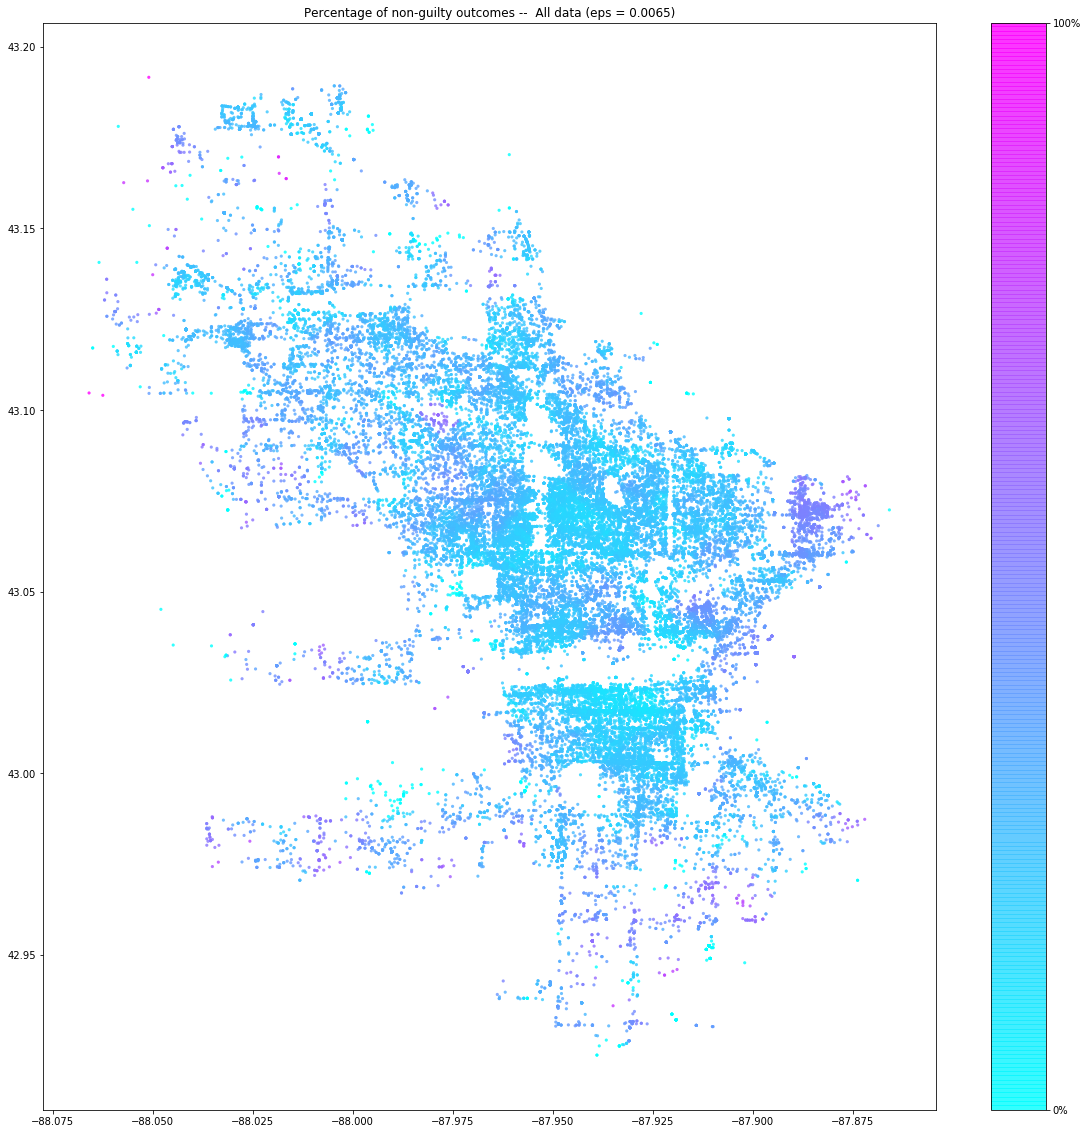

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))
cax = ax.scatter(datas['x_lng'], datas['y_lat'], c=p, cmap='cool', alpha=.8, linewidths=0, s=10)
ax.set_title('Percentage of non-guilty outcomes --  All data (eps = ' + str(eps) + ')')
#fig(figsize=(20, 20))
# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[0, 3.044])
cbar.ax.set_yticklabels(['0%', '100%'])  # vertically oriented colorbar
plt.savefig('heatmapex.png')
plt.show()

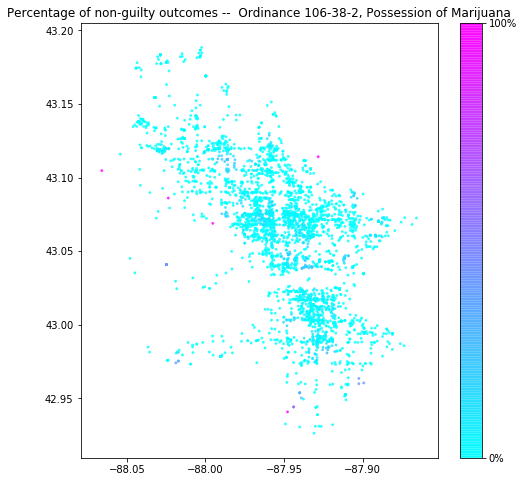

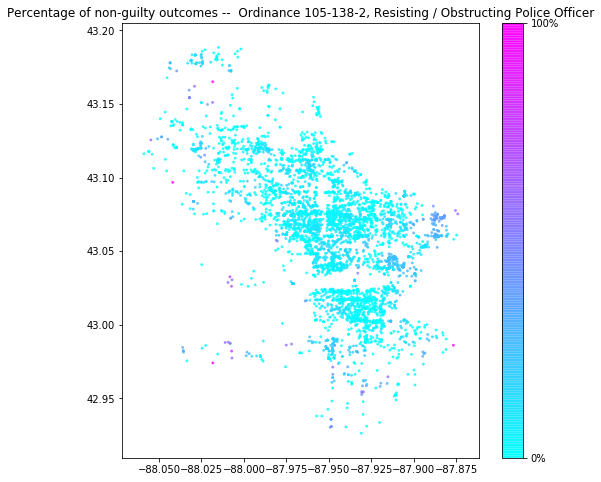

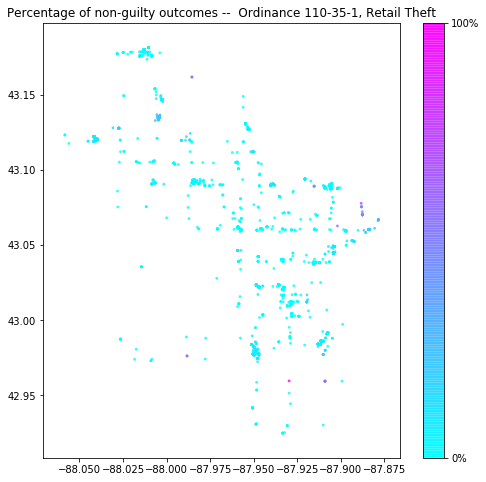

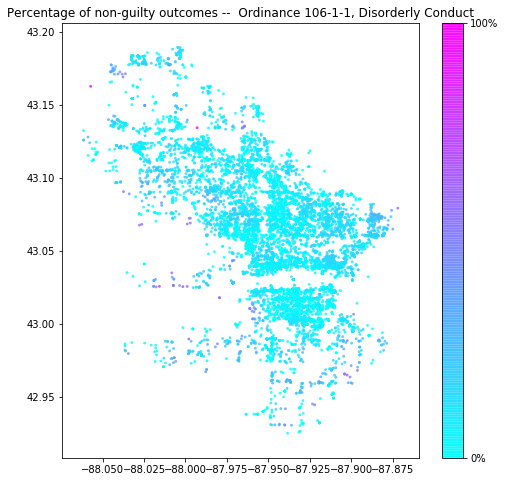

In [20]:
eps = .0065
charges = ['Ordinance 106-38-2, Possession of Marijuana', 'Ordinance 105-138-2, Resisting / Obstructing Police Officer', 'Ordinance 110-35-1, Retail Theft', 'Ordinance 106-1-1, Disorderly Conduct']
for c in range(0, len(charges)):
    datac = datas[datas['c_violation'] == charges[c]]
    datac.reset_index(drop=False, inplace=True)
    ll = np.array(datac[['x_lng', 'y_lat']].values.T.tolist())
    #print(datac.head())
    size = len(datac.index)
    idx = np.array([0.0]*size)
    for x in range (0, size) :
        ng = 0
        tot = 0
        for y in range (0, size) :
            if abs(ll[0, x] - ll[0, y]) + abs(ll[1, x] - ll[1, y]) < eps :
                tot = tot + 1
                ng = ng + 1 if datas.loc[datac.loc[y, 'index'], 'guilty'] == 0 else ng
        idx[x] = ng/tot
    p = np.log(1+idx)
    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.scatter(datac['x_lng'], datac['y_lat'], c=p, cmap='cool', alpha=.8, linewidths=0, s=8)
    ax.set_title('Percentage of non-guilty outcomes --  ' + charges[c])
    #fig(figsize=(20, 20))
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    cbar = fig.colorbar(cax, ticks=[0, .693])
    cbar.ax.set_yticklabels(['0%', '100%'])  # vertically oriented colorbar
    plt.show()

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch, Polygon
from mpl_toolkits.basemap import Basemap

%matplotlib inline

fig = plt.figure(figsize = (15, 10), dpi = 300)  

map = Basemap(projection = 'cyl',
              resolution = 'h',
              lat_0 = 43.0389025,
              lon_0 = -87.9064736,
              llcrnrlon = -88.080736,
              llcrnrlat = 42.917670,
              urcrnrlon = -87.839722,
              urcrnrlat = 43.19712)

map.readshapefile('mke_nei/mke_nei',
                  name = 'ald',
                  color = '#003366',
                  linewidth = 0.75)
def plot():
    plt.scatter(data['x_lng'], data['y_lat'], c=p, cmap='cool', alpha=.8, linewidths=0, s=8)
    plt.title('All data')
    plt.show()
    
if __name__ == '__main__':
    plot()
    